___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

### Some Reminders on Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is an especially important activity in the routine of a data analyst or scientist. It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis. It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business. By means of EDA, we can obtain meaningful insights that can impact analysis under the following questions (If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset).
1. What question are you trying to solve (or prove wrong)?
2. What kind of data do you have?
3. What’s missing from the data?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

**``Exploratory data analysis (EDA)``** is often an **iterative brainstorming process** where you pose a question, review the data, and develop further questions to investigate before beginning model development work. The image below shows how the brainstorming phase is connected with that of understanding the variables and how this in turn is connected again with the brainstorming phase.<br>

<img src=https://i.ibb.co/k0MC950/EDA-Process.png width="300" height="100">

[Image Credit: Andrew D.](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee)

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

**``NOTE:``**  However, you are free to create your own style. You do NOT have to stick to the steps above. We, the DA & DV instructors, recommend you study each part separately to create a source notebook for each part title for your further studies. 

# PART- 1 Data Cleaning

### Importing Libraries

In [894]:
# import lineer algebra and data analysis library
import numpy as np
import pandas as pd

# import visualisation library
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns

# import warning library to suppress warnings
import warnings

### Settings

In [895]:
# Suppressing a warning 
warnings.filterwarnings("ignore")

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid")

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum rows
pd.set_option('display.max_rows', 100)

In [896]:
params = {
'figure.figsize':(14,7),
'figure.titlesize':20,
'font.size': 15,
'axes.titlesize': 20,
'axes.labelsize': 15,
'xtick.labelsize': 15,
'ytick.labelsize': 15,
'legend.fontsize': 15,
'boxplot.showmeans': True,
'boxplot.meanprops.marker': 'o',
'boxplot.meanprops.markeredgecolor': 'k',
'boxplot.meanprops.markerfacecolor': 'w',
'boxplot.meanprops.markersize': 10.1,
}
# print(plt.style.library)
plt.rcParams.update(params)
# plt.rcParams.update(plt.rcParamsDefault)
# print(plt.rcParams['figure.figsize'])

## Reading scout_car.json file as a dataframe named df

In [897]:
df = pd.read_csv("filled_scout.csv")

### Creating a copy from df named df_copy

In [898]:
df_copy = df.copy()

## Checking the dataframe with head, tail and sample

In [899]:
# Checking the head of df

df.head()

make_model body_type     price        km  prev_owner  type body_color  \
0    Audi A1    Sedans 15,770.00 56,013.00        2.00  Used      Black   
1    Audi A1    Sedans 14,500.00 80,000.00        1.00  Used        Red   
2    Audi A1    Sedans 14,640.00 83,450.00        1.00  Used      Black   
3    Audi A1    Sedans 14,500.00 73,000.00        1.00  Used      Brown   
4    Audi A1    Sedans 16,790.00 16,200.00        1.00  Used      Black   

  paint_type  nr_of_doors  nr_of_seats gearing_type  displacement_cc  \
0   Metallic         5.00         5.00    Automatic         1,400.00   
1   Metallic         3.00         4.00    Automatic         1,800.00   
2   Metallic         4.00         4.00    Automatic         1,600.00   
3   Metallic         3.00         4.00    Automatic         1,400.00   
4   Metallic         5.00         5.00    Automatic         1,400.00   

   cylinders drive_chain     fuel  co_2_emission emission_class  \
0       3.00       front   Diesel          99.00         Euro 6   
1       4.00       front  Benzine         129.00         Euro 6   
2       4.00       front   Diesel          99.00         Euro 6   
3       3.00       front   Diesel          99.00         Euro 6   
4       3.00       front   Diesel         109.00         Euro 6   

                                 comfort_convenience  \
0  Air conditioning,Armrest,Automatic climate con...   
1  Air conditioning,Automatic climate control,Hil...   
2  Air conditioning,Cruise control,Electrical sid...   
3  Air suspension,Armrest,Auxiliary heating,Elect...   
4  Air conditioning,Armrest,Automatic climate con...   

                                 entertainment_media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   
2                              MP3,On-board computer   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...   

                                              extras  \
0     Alloy wheels,Catalytic Converter,Voice Control   
1  Alloy wheels,Sport seats,Sport suspension,Voic...   
2                         Alloy wheels,Voice Control   
3             Alloy wheels,Sport seats,Voice Control   
4  Alloy wheels,Sport package,Sport suspension,Vo...   

                                     safety_security  gears  hp_kw  \
0  ABS,Central door lock,Daytime running lights,D...   7.00  66.00   
1  ABS,Central door lock,Central door lock with r...   7.00 141.00   
2  ABS,Central door lock,Daytime running lights,D...   7.00  85.00   
3  ABS,Alarm system,Central door lock with remote...   6.00  66.00   
4  ABS,Central door lock,Driver-side airbag,Elect...   7.00  66.00   

  upholstery_type upholstery_color  weight_kg  consumption_comb  age  
0           Cloth            Black   1,220.00              3.80 3.00  
1           Cloth             Grey   1,255.00              5.60 2.00  
2           Cloth            Black   1,135.00              3.80 3.00  
3           Cloth            Black   1,195.00              3.80 3.00  
4           Cloth            Black   1,135.00              4.10 3.00

In [900]:
# Checking the tail of df

df.tail()

make_model body_type     price       km  prev_owner  \
15037  Renault Espace       Van 39,950.00    10.00        0.00   
15038  Renault Espace       Van 39,885.00 9,900.00        1.00   
15039  Renault Espace       Van 39,875.00    15.00        1.00   
15040  Renault Espace       Van 39,700.00    10.00        1.00   
15041  Renault Espace       Van 40,999.00 2,900.00        1.00   

                 type body_color paint_type  nr_of_doors  nr_of_seats  \
15037             New       Grey   Metallic         5.00         5.00   
15038            Used       Grey   Metallic         5.00         5.00   
15039  Pre-registered      White   Metallic         5.00         7.00   
15040  Pre-registered       Grey   Metallic         5.00         7.00   
15041   Demonstration       Grey   Metallic         5.00         5.00   

      gearing_type  displacement_cc  cylinders drive_chain     fuel  \
15037    Automatic         2,000.00       4.00       front   Diesel   
15038    Automatic         1,800.00       4.00       front  Benzine   
15039    Automatic         2,000.00       4.00       front   Diesel   
15040    Automatic         2,000.00       4.00       front   Diesel   
15041    Automatic         1,800.00       4.00         4WD  Benzine   

       co_2_emission emission_class  \
15037         139.00         Euro 6   
15038         168.00         Euro 6   
15039         139.00   Euro 6d-TEMP   
15040         139.00         Euro 6   
15041         153.00         Euro 6   

                                     comfort_convenience  \
15037  Air conditioning,Automatic climate control,Cru...   
15038  Air conditioning,Automatic climate control,Cru...   
15039  Air conditioning,Armrest,Automatic climate con...   
15040  Air conditioning,Automatic climate control,Cru...   
15041  Air conditioning,Automatic climate control,Cru...   

                                     entertainment_media  \
15037  Bluetooth,Digital radio,Hands-free equipment,O...   
15038  Bluetooth,Digital radio,Hands-free equipment,R...   
15039  Bluetooth,Hands-free equipment,On-board comput...   
15040                  Bluetooth,Digital radio,Radio,USB   
15041                                                USB   

                                        extras  \
15037                Alloy wheels,Touch screen   
15038  Alloy wheels,Touch screen,Voice Control   
15039                             Alloy wheels   
15040                Alloy wheels,Touch screen   
15041                Alloy wheels,Touch screen   

                                         safety_security  gears  hp_kw  \
15037  ABS,Central door lock,Central door lock with r...   6.00 147.00   
15038  ABS,Adaptive Cruise Control,Blind spot monitor...   7.00 165.00   
15039  ABS,Adaptive Cruise Control,Blind spot monitor...   6.00 146.00   
15040  ABS,Blind spot monitor,Driver-side airbag,Elec...   6.00 147.00   
15041  ABS,Blind spot monitor,Daytime running lights,...   6.00 165.00   

      upholstery_type upholstery_color  weight_kg  consumption_comb  age  
15037    Full leather            Brown   1,758.00              5.30 0.00  
15038           Cloth            Brown   1,708.00              7.40 0.00  
15039    Full leather            Black   1,734.00              5.30 0.00  
15040    Part leather            Black   1,758.00              5.30 0.00  
15041    Full leather            Brown   1,685.00              6.80 0.00

In [901]:
# Checking the df by taking samples

df.sample(10)

make_model      body_type     price         km  prev_owner  \
14708  Renault Espace            Van 31,900.00  33,949.00        1.00   
10934   Opel Insignia  Station wagon 19,990.00  85,000.00        1.00   
13685    Renault Clio        Compact 19,190.00      50.00        0.00   
6328       Opel Astra         Sedans 16,790.00  25,000.00        1.00   
3196          Audi A3         Sedans 22,500.00  19,000.00        1.00   
4055          Audi A3         Sedans 17,996.00  13,000.00        1.00   
3280          Audi A3         Sedans 18,200.00  54,000.00        1.00   
2959          Audi A3         Sedans 14,980.00 102,124.00        1.00   
4111          Audi A3         Sedans 17,980.00  19,000.00        1.00   
11994   Opel Insignia  Station wagon 35,590.00   7,500.00        1.00   

                 type body_color paint_type  nr_of_doors  nr_of_seats  \
14708            Used      White   Metallic         5.00         7.00   
10934            Used      Black   Metallic         5.00         5.00   
13685             New      Black   Metallic         4.00         5.00   
6328             Used       Grey   Metallic         4.00         5.00   
3196             Used      Black   Metallic         5.00         5.00   
4055             Used      Black   Metallic         4.00         5.00   
3280             Used      Black   Metallic         5.00         5.00   
2959             Used     Silver   Metallic         4.00         5.00   
4111   Employee's car      Black   Metallic         5.00         5.00   
11994            Used       Grey   Metallic         5.00         5.00   

         gearing_type  displacement_cc  cylinders drive_chain     fuel  \
14708       Automatic         1,600.00       4.00       front   Diesel   
10934       Automatic         2,000.00       4.00         4WD   Diesel   
13685       Automatic         1,200.00       4.00       front  Benzine   
6328        Automatic         1,400.00       4.00       front  Benzine   
3196   Semi-automatic         1,600.00       4.00       front   Diesel   
4055           Manual         1,000.00       3.00       front  Benzine   
3280   Semi-automatic         1,600.00       4.00       front   Diesel   
2959           Manual         2,000.00       4.00       front   Diesel   
4111           Manual         1,600.00       4.00       front   Diesel   
11994       Automatic         1,600.00       4.00       front  Benzine   

       co_2_emission emission_class  \
14708         120.00         Euro 6   
10934         169.00         Euro 6   
13685         120.00         Euro 6   
6328          127.00         Euro 6   
3196          103.00         Euro 6   
4055          103.00         Euro 6   
3280           99.00         Euro 6   
2959           99.00         Euro 6   
4111          106.00         Euro 6   
11994         154.00   Euro 6d-TEMP   

                                     comfort_convenience  \
14708  Air conditioning,Automatic climate control,Cru...   
10934  Air conditioning,Armrest,Automatic climate con...   
13685  Air conditioning,Automatic climate control,Cru...   
6328   Air conditioning,Cruise control,Electrical sid...   
3196   Air conditioning,Armrest,Automatic climate con...   
4055   Air conditioning,Electrical side mirrors,Hill ...   
3280   Air conditioning,Seat ventilation,Split rear s...   
2959   Air conditioning,Cruise control,Electrical sid...   
4111   Air conditioning,Armrest,Automatic climate con...   
11994  Air conditioning,Armrest,Automatic climate con...   

                                     entertainment_media  \
14708                                      Bluetooth,USB   
10934  Bluetooth,CD player,Hands-free equipment,MP3,O...   
13685  Bluetooth,Hands-free equipment,On-board comput...   
6328   Bluetooth,Digital radio,Hands-free equipment,O...   
3196                   Bluetooth,On-board computer,Radio   
4055   Bluetooth,CD player,Hands-free equipment,MP3,R...   
3280                                     Bluetooth,Radio   
2959             

## Checking the summary information of df

In [902]:
# Checking the summary information of df with df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15042 entries, 0 to 15041
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15042 non-null  object 
 1   body_type            15042 non-null  object 
 2   price                15042 non-null  float64
 3   km                   15042 non-null  float64
 4   prev_owner           15042 non-null  float64
 5   type                 15042 non-null  object 
 6   body_color           15042 non-null  object 
 7   paint_type           15042 non-null  object 
 8   nr_of_doors          15042 non-null  float64
 9   nr_of_seats          15042 non-null  float64
 10  gearing_type         15042 non-null  object 
 11  displacement_cc      15042 non-null  float64
 12  cylinders            15042 non-null  float64
 13  drive_chain          15042 non-null  object 
 14  fuel                 15042 non-null  object 
 15  co_2_emission        15042 non-null 

## Checking the null values of df

In [903]:
df.isnull().sum()

make_model             0
body_type              0
price                  0
km                     0
prev_owner             0
type                   0
body_color             0
paint_type             0
nr_of_doors            0
nr_of_seats            0
gearing_type           0
displacement_cc        0
cylinders              0
drive_chain            0
fuel                   0
co_2_emission          0
emission_class         0
comfort_convenience    0
entertainment_media    0
extras                 0
safety_security        0
gears                  0
hp_kw                  0
upholstery_type        0
upholstery_color       0
weight_kg              0
consumption_comb       0
age                    0
dtype: int64

# PART- 2 `( Handling With Missing Values )`

This topic has been studied in the 2nd notebook

# PART- 3 `( Handling With Outliers )`

## Handling with outliers for numeric columns

In [904]:
df_numeric= df.select_dtypes(exclude=["object"])

In [905]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15042 entries, 0 to 15041
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             15042 non-null  float64
 1   km                15042 non-null  float64
 2   prev_owner        15042 non-null  float64
 3   nr_of_doors       15042 non-null  float64
 4   nr_of_seats       15042 non-null  float64
 5   displacement_cc   15042 non-null  float64
 6   cylinders         15042 non-null  float64
 7   co_2_emission     15042 non-null  float64
 8   gears             15042 non-null  float64
 9   hp_kw             15042 non-null  float64
 10  weight_kg         15042 non-null  float64
 11  consumption_comb  15042 non-null  float64
 12  age               15042 non-null  float64
dtypes: float64(13)
memory usage: 1.5 MB


### Histplots for numeric columns

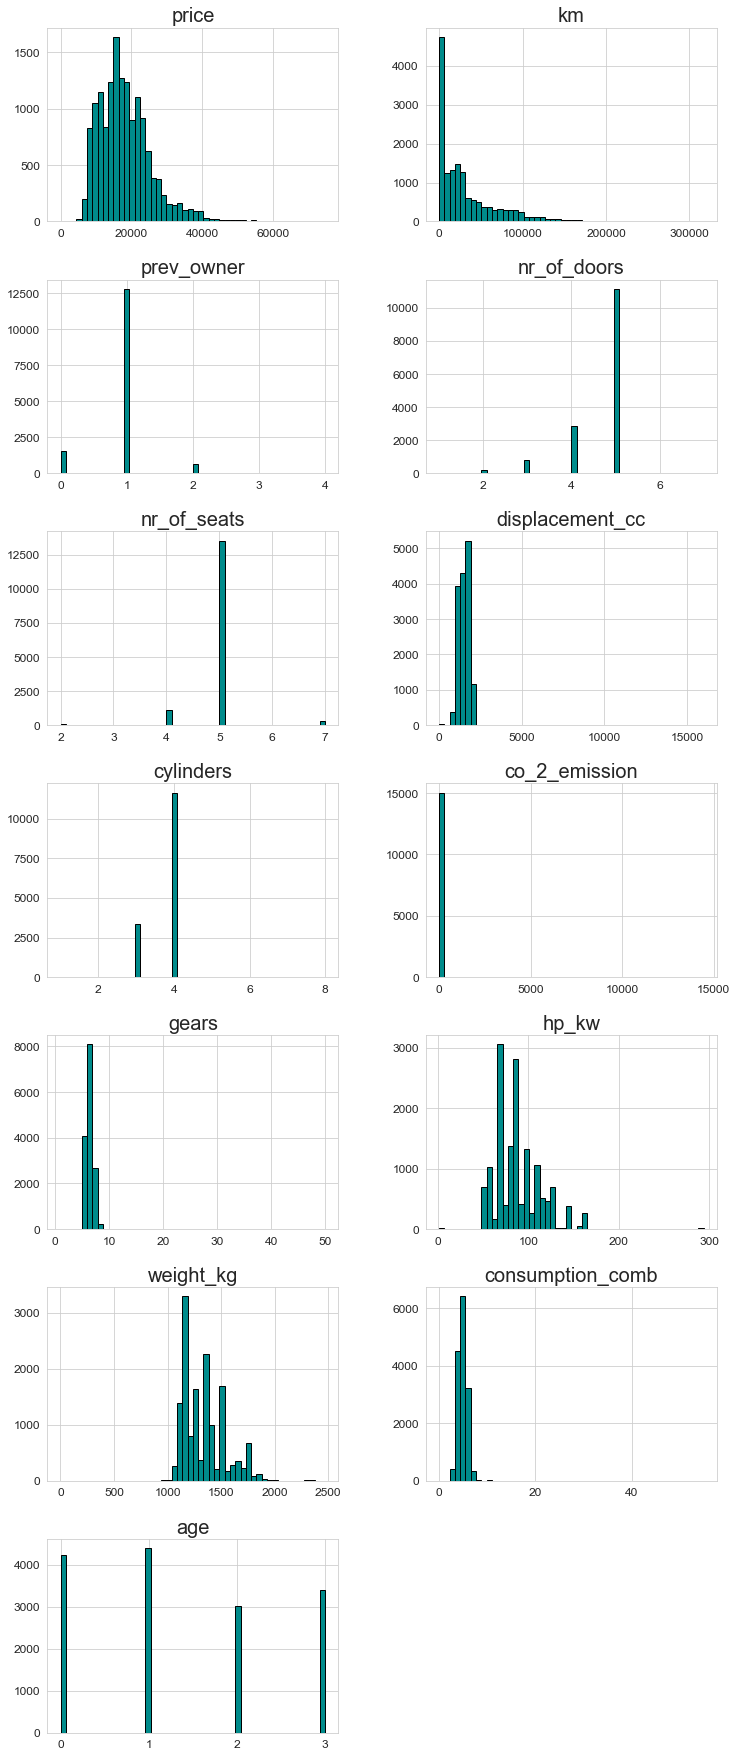

In [906]:
fig_ = df_numeric.hist(figsize=(12, 36), layout=(8,2),
                         bins=50, color="darkcyan", edgecolor="black", xlabelsize=12, ylabelsize=12)

### Box plots for numeric columns

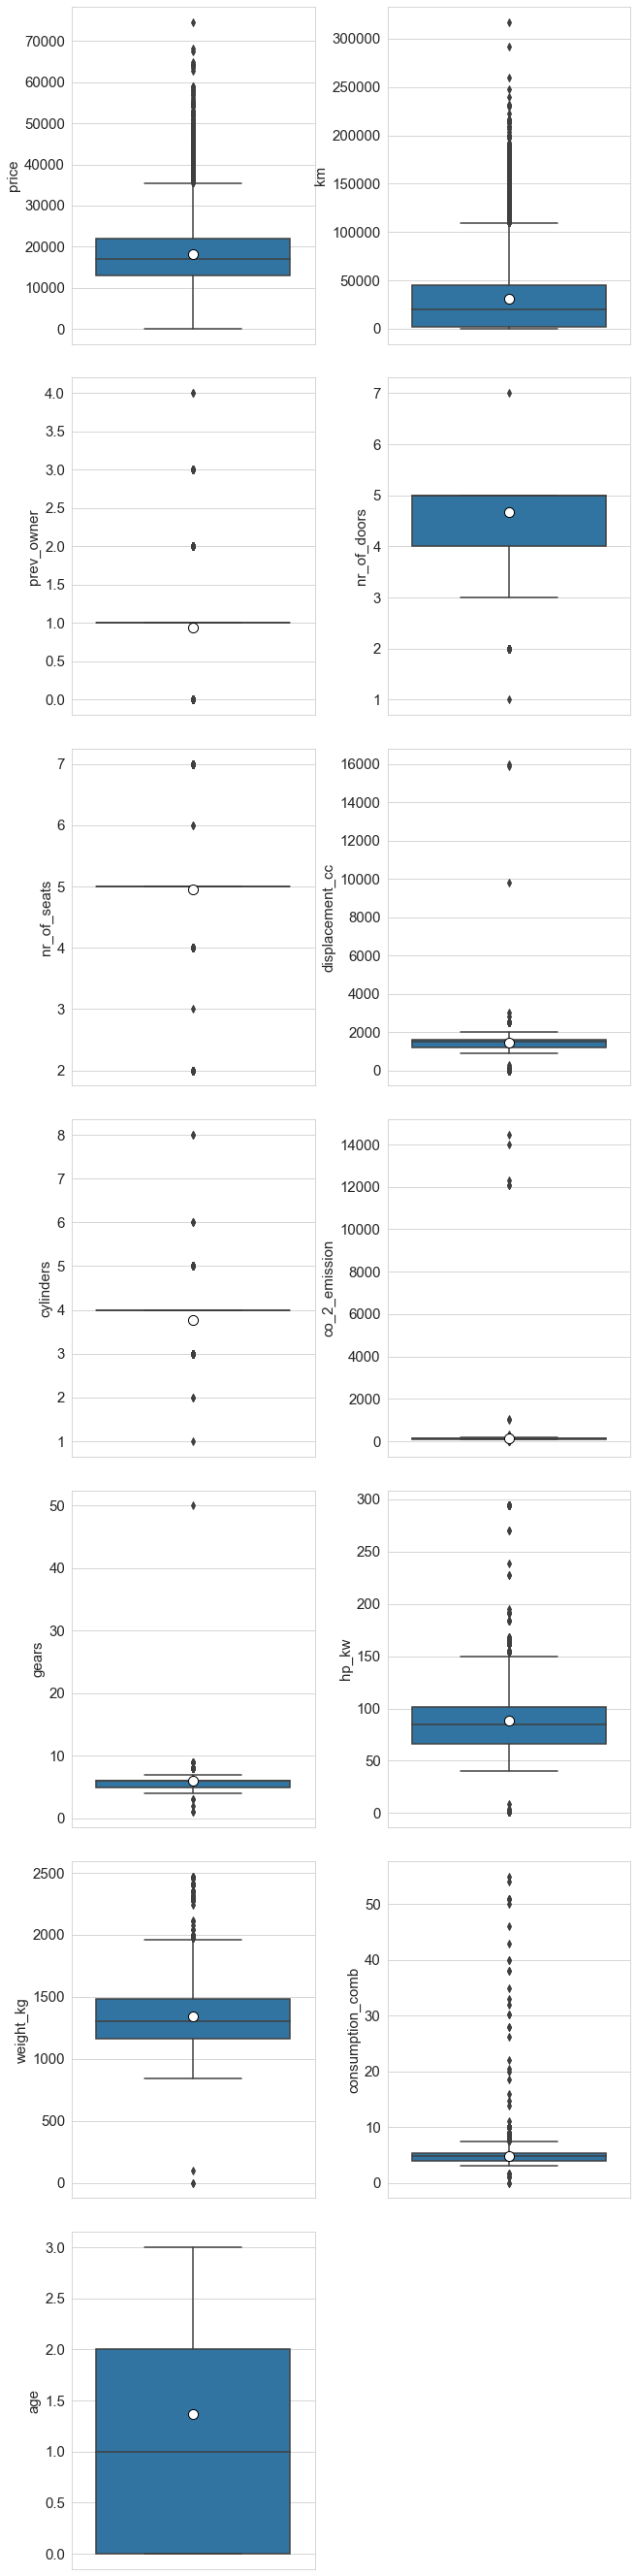

In [907]:
fig = plt.figure(figsize=(10,30))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=0.3,
                    hspace=0.1)
for i, col in enumerate(df_numeric.columns):
        plt.subplot(8,2,i+1)
        sns.boxplot(y=col, data=df_numeric)

### Scatter plots for numeric columns

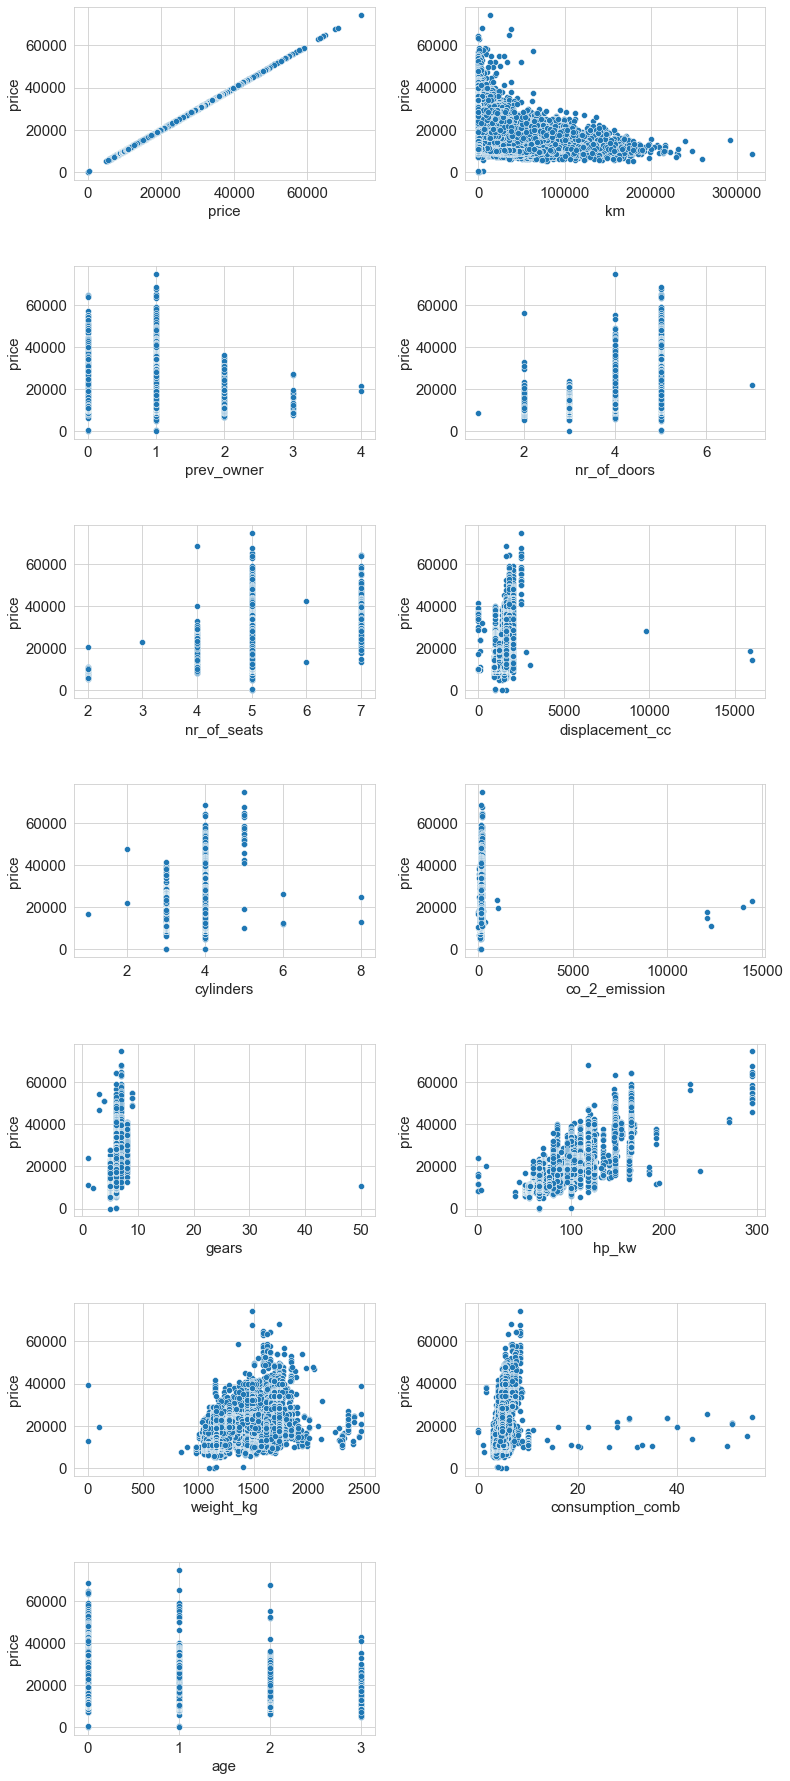

In [908]:
fig = plt.figure(figsize=(12,24))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.1,
                    wspace=0.3,
                    hspace=0.5)
for i, col in enumerate(df_numeric.columns):
        plt.subplot(7,2,i+1)
        sns.scatterplot(y= "price", x=col, data=df_numeric)

### Regplots for numeric columns

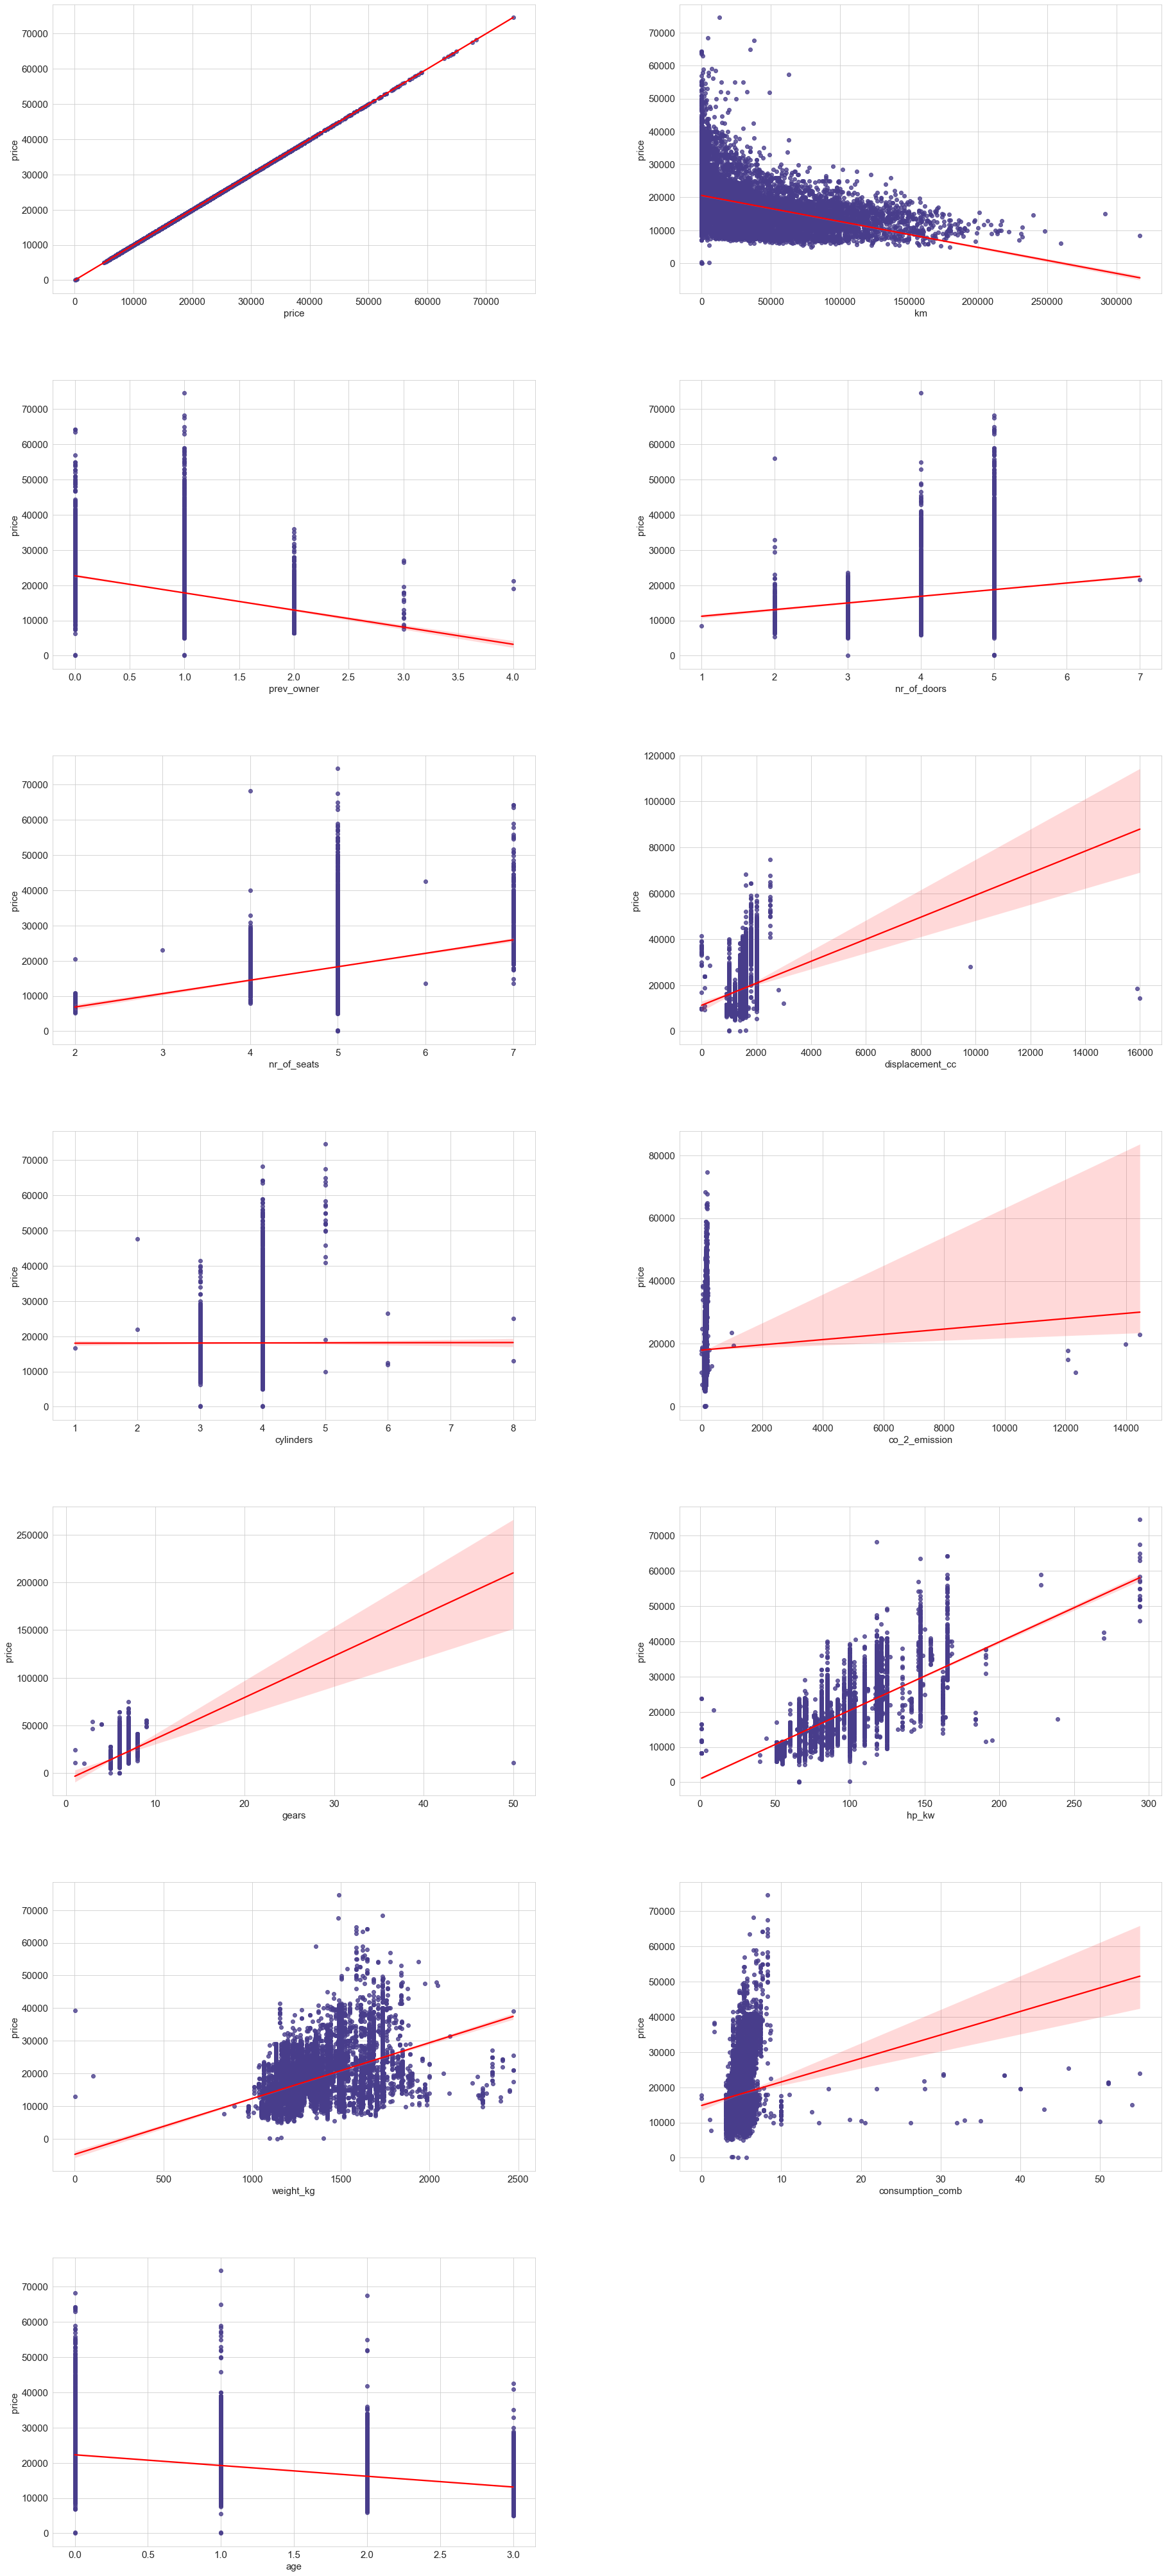

In [909]:
fig = plt.figure(figsize=(30,50))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.2,
                    wspace=0.3,
                    hspace=0.3)
for i, col in enumerate(df_numeric.columns):
        plt.subplot(7,2,i+1)
        sns.regplot(x=col, y= "price", data=df_numeric, scatter_kws={"color": "darkslateblue"}, line_kws={"color": "red"})

### Conclusion about plots of numeric columns

In [910]:
# # EXAMINING THE GRAPHS;
# nr_of_doors: 1-door can be an outlier.
# displacement_cc
# cylinders 1, 8
# co2 emission
# gears cannot be 50
# hp_kw
# weight_kg
# consumption_comb
#IT HAS BEEN ASSESSED THAT THE COLUMNS MAY CONTAIN OUTLIER VALUES AND IT HAS BEEN DECIDED TO DO OUTLIER WORK ON THESE COLUMNS.

### Defining a function to find iqr lower, upper  limits

In [911]:
def iqr_lower_upper (col) :
    q1 = df_numeric[col].quantile(0.25)
    q3 = df_numeric[col].quantile(0.75)
    iqr = q3 -q1
    lower = q1 -1.5*iqr
    upper = q3 + 1.5*iqr
    nr_extreme = df.loc[(df[col] < lower) | (df[col] > upper)].shape[0] 
    print(f"lower limit : {lower},\nupper limit: {upper},\nnumber of extreme values : {nr_extreme}")
    return lower, upper

### nr_of_doors column

In [912]:
iqr_lower_upper("nr_of_doors")

lower limit : 2.5,
upper limit: 6.5,
number of extreme values : 196


(2.5, 6.5)

In [913]:
df[df_numeric.nr_of_doors==1]

make_model body_type    price        km  prev_owner  type body_color  \
13057  Renault Clio   Compact 8,500.00 41,493.00        1.00  Used      White   

      paint_type  nr_of_doors  nr_of_seats gearing_type  displacement_cc  \
13057   Metallic         1.00         5.00       Manual         1,500.00   

       cylinders drive_chain    fuel  co_2_emission emission_class  \
13057       4.00       front  Diesel          85.00         Euro 6   

                                     comfort_convenience  \
13057  Air conditioning,Cruise control,Hill Holder,Mu...   

               entertainment_media        extras  \
13057  Bluetooth,On-board computer  Alloy wheels   

                                         safety_security  gears  hp_kw  \
13057  ABS,Central door lock,Daytime running lights,D...   5.00  55.00   

      upholstery_type upholstery_color  weight_kg  consumption_comb  age  
13057           Cloth            Black   1,165.00              3.30 3.00

In [914]:
df[df_numeric.nr_of_doors==2]

make_model body_type     price        km  prev_owner            type  \
26       Audi A1   Compact 11,444.00 84,029.00        1.00            Used   
44       Audi A1    Sedans 11,490.00 44,120.00        1.00            Used   
48       Audi A1   Compact 11,490.00 58,000.00        2.00            Used   
55       Audi A1   Compact 10,999.00 69,500.00        1.00            Used   
56       Audi A1   Compact 10,900.00 43,500.00        1.00            Used   
...          ...       ...       ...       ...         ...             ...   
9816  Opel Corsa   Compact 10,499.00    325.00        0.00             New   
9826  Opel Corsa   Compact  9,990.00    100.00        0.00             New   
9892  Opel Corsa   Compact 11,290.00     12.00        1.00  Pre-registered   
9925  Opel Corsa   Compact 11,190.00     10.00        1.00  Pre-registered   
9956  Opel Corsa   Compact 10,990.00     12.00        1.00  Pre-registered   

     body_color paint_type  nr_of_doors  nr_of_seats gearing_type  \
26         Blue   Metallic         2.00         4.00       Manual   
44        Black   Metallic         2.00         5.00       Manual   
48        Black   Metallic         2.00         4.00       Manual   
55        Black   Metallic         2.00         4.00       Manual   
56        White   Metallic         2.00         4.00       Manual   
...         ...        ...          ...          ...          ...   
9816        Red   Metallic         2.00         4.00       Manual   
9826       Blue   Metallic         2.00         5.00       Manual   
9892        Red   Metallic         2.00         5.00       Manual   
9925       Blue   Metallic         2.00         5.00       Manual   
9956       Blue   Metallic         2.00         5.00       Manual   

      displacement_cc  cylinders drive_chain     fuel  co_2_emission  \
26           1,000.00       3.00       front  Benzine          97.00   
44           1,400.00       3.00       front   Diesel          94.00   
48           1,000.00       3.00       front  Benzine         102.00   
55           1,000.00       3.00       front  Benzine         102.00   
56           1,000.00       3.00       front  Benzine          97.00   
...               ...        ...         ...      ...            ...   
9816         1,200.00       4.00       front  Benzine         126.00   
9826         1,200.00       4.00       front  Benzine         126.00   
9892         1,200.00       4.00       front  Benzine         126.00   
9925         1,200.00       4.00       front  Benzine         126.00   
9956         1,200.00       4.00       front  Benzine         126.00   

     emission_class                                comfort_convenience  \
26           Euro 6  Air conditioning,Automatic climate control,Ele...   
44           Euro 6  Air conditioning,Cruise control,Electrical sid...   
48           Euro 6  Air conditioning,Electrical side mirrors,Leath...   
55           Euro 5  Air conditioning,Armrest,Automatic climate con...   
56           Euro 6  Air conditioning,Electrical side mirrors,Power...   
...             ...                                                ...   
9816   Euro 6d-TEMP  Air conditioning,Electrical side mirrors,Power...   
9826   Euro 6d-TEMP  Air conditioning,Electrical side mirrors,Hill ...   
9892   Euro 6d-TEMP  Air conditioning,Electrical side mirrors,Power...   
9925   Euro 6d-TEMP  Air conditioning,Electrical side mirrors,Hill ...   
9956   Euro 6d-TEMP  Air conditioning,Electrical side mirrors,Power...   

                                    entertainment_media  \
26    Bluetooth,CD player,Hands-free equipment,MP3,O...   
44    Bluetooth,Hands-free equipment,MP3,On-board co...   
48                                  Bluetooth,CD player   
55                                            CD player   
56                    CD player,On-board computer,Radio   
...                                                 ...   
9816                                              Radio   
9826  Bluetoot

In [915]:
df[df_numeric.nr_of_doors==7]

make_model body_type     price        km  prev_owner  type  \
14372  Renault Espace       Van 21,600.00 78,000.00        1.00  Used   

      body_color paint_type  nr_of_doors  nr_of_seats gearing_type  \
14372      Brown   Metallic         7.00         5.00    Automatic   

       displacement_cc  cylinders drive_chain    fuel  co_2_emission  \
14372         1,600.00       4.00       front  Diesel         120.00   

      emission_class                                comfort_convenience  \
14372         Euro 6  Air conditioning,Armrest,Automatic climate con...   

                                     entertainment_media  \
14372  Bluetooth,Digital radio,MP3,On-board computer,...   

                          extras  \
14372  Alloy wheels,Touch screen   

                                         safety_security  gears  hp_kw  \
14372  ABS,Blind spot monitor,Central door lock,Dayti...   6.00 118.00   

      upholstery_type upholstery_color  weight_kg  consumption_comb  age  
14372    Full leather            Brown   1,734.00              4.60 3.00

In [916]:
q1 = df_numeric.nr_of_doors.quantile(0.25)
q3 = df_numeric.nr_of_doors.quantile(0.75)
iqr = q3 -q1
lower = q1 -1.5*iqr
upper = q3 + 1.5*iqr
lower, upper

(2.5, 6.5)

In [917]:
nr_doors_1 = df.loc[(df.make_model=="Renault Clio")&(df.body_type=="Compact"), "nr_of_doors"].mode()[0]

In [918]:
nr_doors_7 = df.loc[(df.make_model=="Renault Espace")&(df.body_type=="Van"), "nr_of_doors"].mode()[0]

In [919]:
df.nr_of_doors.replace(to_replace=[1,7], value=[nr_doors_1, nr_doors_7], inplace=True)

In [920]:
df.nr_of_doors.value_counts()

5.00    11153
4.00     2872
3.00      823
2.00      194
Name: nr_of_doors, dtype: int64

### nr_of_seats column

In [921]:
df[df.nr_of_seats==3]

make_model body_type     price       km  prev_owner  type body_color  \
1542    Audi A1   Compact 23,090.00 9,821.00        1.00  Used      Black   

     paint_type  nr_of_doors  nr_of_seats gearing_type  displacement_cc  \
1542   Metallic         2.00         3.00    Automatic         1,800.00   

      cylinders drive_chain     fuel  co_2_emission emission_class  \
1542       4.00       front  Benzine         134.00         Euro 6   

                                    comfort_convenience  \
1542  Air conditioning,Armrest,Automatic climate con...   

                                    entertainment_media  \
1542  Bluetooth,CD player,Digital radio,Hands-free e...   

                                                 extras  \
1542  Alloy wheels,Catalytic Converter,Sport package...   

                                        safety_security  gears  hp_kw  \
1542  ABS,Central door lock,Daytime running lights,D...   7.00 141.00   

     upholstery_type upholstery_color  weight_kg  consumption_comb  age  
1542    Part leather            Black   1,180.00              5.80 1.00

In [922]:
df[df.nr_of_seats==6]

make_model      body_type     price         km  prev_owner  type  \
524           Audi A1        Compact 13,500.00 100,000.00        1.00  Used   
15013  Renault Espace  Station wagon 42,490.00      10.00        0.00   New   

      body_color paint_type  nr_of_doors  nr_of_seats gearing_type  \
524        White   Metallic         5.00         6.00       Manual   
15013      Black   Metallic         5.00         6.00    Automatic   

       displacement_cc  cylinders drive_chain     fuel  co_2_emission  \
524           1,000.00       4.00       front  Benzine         102.00   
15013         2,000.00       4.00       front   Diesel         168.00   

      emission_class                                comfort_convenience  \
524           Euro 6                                   Air conditioning   
15013   Euro 6d-TEMP  Air conditioning,Armrest,Automatic climate con...   

                                     entertainment_media  \
524                                    On-board computer   
15013  Bluetooth,Hands-free equipment,On-board comput...   

                          extras  \
524                 Alloy wheels   
15013  Alloy wheels,Touch screen   

                                         safety_security  gears  hp_kw  \
524                                                  ABS   5.00  70.00   
15013  ABS,Blind spot monitor,Central door lock,Dayti...   6.00 147.00   

      upholstery_type upholstery_color  weight_kg  consumption_comb  age  
524             Cloth            Black   1,500.00              4.30 2.00  
15013           Cloth            Other   1,840.00              5.70 0.00

In [923]:
df[df.make_model=="Renault Espace"].head(50)

make_model      body_type     price         km  prev_owner  \
14131  Renault Espace            Van 17,500.00 141,000.00        1.00   
14132  Renault Espace  Station wagon 17,950.00  99,950.00        1.00   
14133  Renault Espace    Transporter 17,950.00  99,950.00        1.00   
14134  Renault Espace            Van 17,990.00 109,745.00        1.00   
14135  Renault Espace            Van 22,600.00 100,000.00        1.00   
14136  Renault Espace    Transporter 22,500.00  84,000.00        1.00   
14137  Renault Espace            Van 22,690.00  68,021.00        1.00   
14138  Renault Espace            Van 22,500.00  32,559.00        1.00   
14139  Renault Espace       Off-Road 22,500.00  70,000.00        1.00   
14140  Renault Espace            Van 22,990.00  76,950.00        1.00   
14141  Renault Espace            Van 23,690.00  53,447.00        1.00   
14142  Renault Espace    Transporter 24,900.00  19,377.00        1.00   
14143  Renault Espace            Van 24,999.00  10,613.00        1.00   
14144  Renault Espace            Van 24,999.00  10,890.00        1.00   
14145  Renault Espace            Van 24,590.00  16,163.00        1.00   
14146  Renault Espace            Van 24,999.00  18,000.00        1.00   
14147  Renault Espace            Van 25,490.00  49,606.00        2.00   
14148  Renault Espace    Transporter 24,900.00  21,790.00        1.00   
14149  Renault Espace            Van 26,900.00   2,748.00        1.00   
14150  Renault Espace            Van 26,895.00  50,544.00        1.00   
14151  Renault Espace    Transporter 26,900.00 122,518.00        1.00   
14152  Renault Espace            Van 26,900.00      20.00        1.00   
14153  Renault Espace  Station wagon 26,890.00   7,300.00        2.00   
14154  Renault Espace         Sedans 25,995.00  14,478.00        1.00   
14155  Renault Espace            Van 25,990.00  34,987.00        1.00   
14156  Renault Espace         Sedans 25,995.00  16,247.00        1.00   
14157  Renault Espace            Van 27,790.00  22,220.00        1.00   
14158  Renault Espace            Van 27,600.00  43,000.00        1.00   
14159  Renault Espace            Van 27,590.00  26,800.00        1.00   
14160  Renault Espace            Van 27,500.00  25,836.00        1.00   
14161  Renault Espace            Van 25,990.00  15,888.00        1.00   
14162  Renault Espace          Other 25,990.00  33,500.00        1.00   
14163  Renault Espace            Van 25,990.00  45,000.00        1.00   
14164  Renault Espace            Van 25,990.00  16,613.00        1.00   
14165  Renault Espace  Station wagon 25,990.00  64,000.00        1.00   
14166  Renault Espace  Station wagon 25,980.00  53,000.00        1.00   
14167  Renault Espace            Van 25,950.00  55,800.00        2.00   
14168  Renault Espace            Van 25,950.00 136,863.00        1.00   
14169  Renault Espace         Sedans 25,900.00  41,378.00        1.00   
14170  Renault Espace            Van 25,885.00  53,745.00        2.00   
14171  Renault Espace            Van 25,750.00  28,918.00        1.00   
14172  Renault Espace            Van 25,650.00  31,221.00        2.00   
14173  Renault Espace  Station wagon 25,500.00  47,000.00        1.00   
14174  Renault Espace            Van 25,500.00  33,837.00        1.00   
14175  Renault Espace  Station wagon 27,500.00  31,200.00        1.00   
14176  Renault Espace            Van 25,500.00  46,000.00        1.00   
14177  Renault Espace            Van 27,500.00  24,200.00        1.00   
14178  Renault Espace  Station wagon 27,500.00  44,000.00        1.00   
14179  Renault Espace  Station wagon 27,490.00  35,290.00        2.00   
14180  Renault Espace            Van 27,450.00  65,373.00        1.00   

                 type body_color paint_type  nr_of_doors  nr_of_seats  \
14131            Used      White   Metallic         5.00         5.00   
14132            Used      Brown   Metallic         5.00         5.00   
14133            Used      Brown   Metallic         5.00         5.0

In [924]:
##NOT: BUGÜNKÜ TOPLANTIDA SORULACAK 3 ve 6 seats?

### displacement_cc column

In [925]:
iqr_lower_upper("displacement_cc")

lower limit : 600.0,
upper limit: 2200.0,
number of extreme values : 72


(600.0, 2200.0)

In [926]:
df[(df.displacement_cc < iqr_lower_upper("displacement_cc")[0]) | (df.displacement_cc > iqr_lower_upper("displacement_cc")[1])].sort_values(by = ["displacement_cc"])

lower limit : 600.0,
upper limit: 2200.0,
number of extreme values : 72
lower limit : 600.0,
upper limit: 2200.0,
number of extreme values : 72


make_model      body_type     price         km  prev_owner  \
11904   Opel Insignia         Sedans 33,990.00      10.00        1.00   
12205   Opel Insignia  Station wagon 33,990.00   3,582.00        1.00   
12176   Opel Insignia        Compact 38,990.00   1,852.00        1.00   
12197   Opel Insignia  Station wagon 35,990.00   2,348.00        1.00   
10069   Opel Insignia  Station wagon 16,950.00  84,700.00        1.00   
12193   Opel Insignia  Station wagon 36,780.00      70.00        1.00   
12190   Opel Insignia        Compact 36,490.00   3,291.00        1.00   
11887   Opel Insignia  Station wagon 37,490.00   2,900.00        1.00   
12207   Opel Insignia  Station wagon 33,790.00   6,446.00        1.00   
11893   Opel Insignia  Station wagon 34,490.00   2,900.00        1.00   
11919   Opel Insignia  Station wagon 36,990.00   2,900.00        1.00   
11921   Opel Insignia  Station wagon 36,990.00      70.00        1.00   
11973   Opel Insignia  Station wagon 33,590.00   1,574.00        1.00   
12022   Opel Insignia  Station wagon 28,990.00   2,254.00        1.00   
12084   Opel Insignia  Station wagon 29,990.00   2,900.00        1.00   
12157   Opel Insignia         Sedans 41,490.00      10.00        0.00   
12175   Opel Insignia  Station wagon 39,190.00      10.00        0.00   
13574    Renault Clio         Sedans  9,999.00  17,364.00        1.00   
12222   Opel Insignia  Station wagon 32,990.00       6.00        1.00   
12203   Opel Insignia         Sedans 35,990.00     136.00        1.00   
12241   Opel Insignia         Sedans 34,925.00   4,631.00        1.00   
13573    Renault Clio         Sedans  9,999.00  21,543.00        1.00   
13572    Renault Clio         Sedans  9,999.00  14,066.00        1.00   
13571    Renault Clio         Sedans  9,999.00  14,532.00        1.00   
13570    Renault Clio         Sedans  9,999.00  30,000.00        1.00   
13568    Renault Clio         Sedans  9,999.00  15,678.00        1.00   
13567    Renault Clio         Sedans  9,999.00  14,039.00        1.00   
13566    Renault Clio         Sedans  9,999.00  15,674.00        1.00   
13565    Renault Clio         Sedans  9,999.00  11,004.00        1.00   
13561    Renault Clio         Sedans  9,999.00   8,031.00        1.00   
13560    Renault Clio         Sedans  9,999.00  11,314.00        1.00   
12230   Opel Insignia  Station wagon 28,500.00   2,900.00        1.00   
13530    Renault Clio         Sedans  9,999.00  18,008.00        1.00   
13172    Renault Clio         Sedans  9,490.00  26,000.00        1.00   
12255   Opel Insignia  Station wagon 33,990.00       8.00        1.00   
12254   Opel Insignia  Station wagon 33,990.00   1,798.00        1.00   
13455    Renault Clio         Sedans  9,680.00  44,235.00        1.00   
12188   Opel Insignia  Station wagon 36,500.00   2,900.00        1.00   
13180    Renault Clio         Sedans  9,400.00  17,000.00        1.00   
9706       Opel Corsa        Compact 10,940.00      12.00        1.00   
7707       Opel Astra  Station wagon 18,830.00      10.00        1.00   
7397       Opel Astra         Sedans 23,940.00      12.00        1.00   
7396       Opel Astra         Sedans 23,940.00      12.00        1.00   
7395       Opel Astra         Sedans 23,940.00      12.00        1.00   
7394       Opel Astra         Sedans 23,940.00      12.00        1.00   
14715  Renault Espace            Van 31,900.00       1.00        1.00   
1838          Audi A1        Compact 28,490.00      10.00        0.00   
3411          Audi A3         Sedans 64,900.00  35,000.00        1.00   
3414          Audi A3         Sedans 62,900.00     700.00        1.00   
3416          Audi A3         Sedans 56,900.00   5,200.00        1.00   
3417          Audi A3         Sedans 58,500.00  10,000.00        1.00   
3419          Audi A3  Station wagon 63,900.00      10.00        1.00   
3420          Audi A3         Sedans 57,400.00  63,000.00        1.00   
3422          Audi A3         Sedans 55,000.00  24,000.00        1.00

In [927]:
df[(df.make_model == "Opel Insignia") & (df.body_type=="Station wagon")][["displacement_cc","hp_kw", "cylinders"]].sort_values(by="displacement_cc", ascending=False).head(50)

displacement_cc  hp_kw  cylinders
10432        16,000.00  88.00       4.00
10276         3,000.00 100.00       6.00
10023         2,800.00 239.00       4.00
10696         2,000.00 125.00       4.00
10687         2,000.00 125.00       4.00
10688         2,000.00 125.00       4.00
10689         2,000.00 125.00       4.00
10690         2,000.00 125.00       4.00
11642         2,000.00 125.00       4.00
11628         2,000.00 125.00       4.00
10694         2,000.00 125.00       4.00
11622         2,000.00 125.00       4.00
12447         2,000.00 154.00       4.00
11645         2,000.00 125.00       4.00
11615         2,000.00 125.00       4.00
11612         2,000.00 125.00       4.00
11608         2,000.00 125.00       4.00
11603         2,000.00 125.00       4.00
11594         2,000.00 125.00       4.00
11585         2,000.00 125.00       4.00
10707         2,000.00 125.00       4.00
11616         2,000.00 125.00       4.00
11646         2,000.00 125.00       4.00
11579         2,000.00 125.00       4.00
10666         2,000.00  88.00       4.00
10648         2,000.00 125.00       4.00
11722         2,000.00 125.00       4.00
11707         2,000.00 125.00       4.00
10658         2,000.00 125.00       4.00
10659         2,000.00 125.00       4.00
10660         2,000.00 125.00       4.00
10663         2,000.00 125.00       4.00
11697         2,000.00 125.00       4.00
10671         2,000.00 125.00       4.00
10684         2,000.00 125.00       4.00
11689         2,000.00 125.00       4.00
10675         2,000.00 125.00       4.00
11672         2,000.00 125.00       4.00
11665         2,000.00 125.00       4.00
11661         2,000.00 125.00       4.00
11660         2,000.00 125.00       4.00
11657         2,000.00 125.00       4.00
11654         2,000.00 125.00       4.00
10708         2,000.00 125.00       4.00
10711         2,000.00 125.00       4.00
10710         2,000.00 125.00       4.00
10773         2,000.00 125.00       4.00
11489         2,000.00 125.00       4.00
11468         2,000.00 125.00       4.00
10761         2,000.00 125.00       4.00

In [928]:
df.groupby(["make_model","body_type"]).displacement_cc.describe()

count     mean    std      min      25%  \
make_model     body_type                                                  
Audi A1        Compact         967.00 1,155.74 361.88   300.00 1,000.00   
               Coupe             2.00 1,300.00 424.26 1,000.00 1,150.00   
               Other            13.00 1,092.31 225.32 1,000.00 1,000.00   
               Sedans        1,486.00 1,198.65 248.66 1,000.00 1,000.00   
               Station wagon    21.00 1,285.71 215.14 1,000.00 1,000.00   
               Van               1.00 2,000.00    NaN 2,000.00 2,000.00   
Audi A2        Off-Road          1.00 1,600.00    NaN 1,600.00 1,600.00   
Audi A3        Compact         148.00 1,531.08 234.98 1,000.00 1,500.00   
               Convertible       8.00 1,812.50 264.24 1,400.00 1,575.00   
               Coupe             4.00 1,450.00 300.00 1,000.00 1,450.00   
               Other            16.00 1,487.50 272.95 1,000.00 1,400.00   
               Sedans        2,486.00 1,527.39 287.81 1,000.00 1,500.00   
               Station wagon   282.00 1,425.18 350.04 1,000.00 1,000.00   
Opel Astra     Compact         151.00 1,409.27 253.34 1,000.00 1,000.00   
               Coupe             2.00 1,400.00   0.00 1,400.00 1,400.00   
               Off-Road          1.00 1,400.00    NaN 1,400.00 1,400.00   
               Other            67.00 1,446.27 201.00 1,000.00 1,400.00   
               Sedans          992.00 1,339.21 249.41   100.00 1,000.00   
               Station wagon 1,167.00 1,507.88 454.71   100.00 1,400.00   
Opel Corsa     Compact       1,194.00 1,336.18 100.70   100.00 1,200.00   
               Coupe            13.00 1,230.77 110.94 1,000.00 1,200.00   
               Off-Road          3.00 1,400.00   0.00 1,400.00 1,400.00   
               Other            87.00 1,386.21  59.40 1,000.00 1,400.00   
               Sedans          849.00 1,297.64 101.49 1,000.00 1,200.00   
               Transporter       7.00 1,214.29  37.80 1,200.00 1,200.00   
               Van               1.00 1,200.00    NaN 1,200.00 1,200.00   
Opel Insignia  Compact          26.00 1,469.23 452.34     0.00 1,500.00   
               Coupe             1.00 1,600.00    NaN 1,600.00 1,600.00   
               Off-Road          7.00 1,871.43 221.47 1,500.00 1,800.00   
               Other            48.00 1,625.00 117.60 1,500.00 1,600.00   
               Sedans          821.00 1,645.07 218.06     0.00 1,500.00   
               Station wagon 1,575.00 1,704.70 459.33     0.00 1,500.00   
               Van               1.00 1,500.00    NaN 1,500.00 1,500.00   
Renault Clio   Compact         413.00 1,144.55 236.38   900.00   900.00   
               Coupe             1.00 1,600.00    NaN 1,600.00 1,600.00   
               Off-Road          2.00 1,350.00 212.13 1,200.00 1,275.00   
               Other            51.00 1,145.10 220.29   900.00   900.00   
               Sedans          844.00 1,258.29 304.17     0.00 1,100.00   
               Station wagon   307.00 1,310.42 210.09   900.00 1,100.00   
               Transporter      29.00 1,431.03 179.49   900.00 1,500.00   
               Van               2.00 1,500.00   0.00 1,500.00 1,500.00   
Renault Duster Off-Road         34.00 1,694.12 172.22 1,600.00 1,600.00   
Renault Espace Compact           6.00 1,633.33  81.65 1,600.00 1,600.00   
               Coupe             2.00 1,600.00   0.00 1,600.00 1,600.00   
               Off-Road          8.00 1,600.00   0.00 1,600.00 1,600.00   
               Other             7.00 1,685.71 157.36 1,600.00 1,600.00   
               Sedans           21.00 1,676.19 148.00 1,600.00 1,600.00   
               Station wagon    67.00 1,686.57 135.84 1,600.00 1,600.00   
               Transporter      52.00 1,607.69  55.47 1,600.00 1,600.00   
               Van             748.00 1,691.71 150.98   200.00 1,600.00   

                                  50%      75%       max  
make_model     body_type                                  
Audi A1      

In [929]:
df[(df.make_model == "Opel Insignia") & (df.body_type=="Station wagon")].displacement_cc.describe()

count    1,575.00
mean     1,704.70
std        459.33
min          0.00
25%      1,500.00
50%      1,600.00
75%      2,000.00
max     16,000.00
Name: displacement_cc, dtype: float64

In [930]:
df[(df.displacement_cc < iqr_lower_upper("displacement_cc")[0])].sort_values(by = ["displacement_cc"], ascending = True).displacement_cc

lower limit : 600.0,
upper limit: 2200.0,
number of extreme values : 72


12203     0.00
12205     0.00
12207     0.00
12222     0.00
12230     0.00
12241     0.00
12254     0.00
12255     0.00
13172     0.00
13574     0.00
13455     0.00
13560     0.00
13561     0.00
13565     0.00
13566     0.00
13567     0.00
13568     0.00
13570     0.00
13571     0.00
13530     0.00
13572     0.00
12197     0.00
12190     0.00
10069     0.00
11887     0.00
11893     0.00
12193     0.00
11919     0.00
11921     0.00
11904     0.00
12022     0.00
12084     0.00
12157     0.00
12175     0.00
12176     0.00
12188     0.00
11973     0.00
13573     0.00
13180   100.00
9706    100.00
7707    100.00
7397    100.00
7396    100.00
7395    100.00
7394    100.00
14715   200.00
1838    300.00
Name: displacement_cc, dtype: float64

In [931]:
df[(df.displacement_cc > iqr_lower_upper("displacement_cc")[1])].sort_values(by = ["displacement_cc"], ascending = True).displacement_cc

lower limit : 600.0,
upper limit: 2200.0,
number of extreme values : 72


3427     2,500.00
3472     2,500.00
3434     2,500.00
3433     2,500.00
3432     2,500.00
3430     2,500.00
3429     2,500.00
3428     2,500.00
3426     2,500.00
3473     2,500.00
3425     2,500.00
3423     2,500.00
3422     2,500.00
3420     2,500.00
3419     2,500.00
3417     2,500.00
3416     2,500.00
3414     2,500.00
3411     2,500.00
3424     2,500.00
10023    2,800.00
10276    3,000.00
1852     9,800.00
6756    15,900.00
10432   16,000.00
Name: displacement_cc, dtype: float64

In [932]:
df[(df.displacement_cc < iqr_lower_upper("displacement_cc")[0]) | (df.displacement_cc > iqr_lower_upper("displacement_cc")[1])]

lower limit : 600.0,
upper limit: 2200.0,
number of extreme values : 72
lower limit : 600.0,
upper limit: 2200.0,
number of extreme values : 72


make_model      body_type     price         km  prev_owner  \
1838          Audi A1        Compact 28,490.00      10.00        0.00   
1852          Audi A1        Compact 27,980.00      10.00        0.00   
3411          Audi A3         Sedans 64,900.00  35,000.00        1.00   
3414          Audi A3         Sedans 62,900.00     700.00        1.00   
3416          Audi A3         Sedans 56,900.00   5,200.00        1.00   
3417          Audi A3         Sedans 58,500.00  10,000.00        1.00   
3419          Audi A3  Station wagon 63,900.00      10.00        1.00   
3420          Audi A3         Sedans 57,400.00  63,000.00        1.00   
3422          Audi A3         Sedans 55,000.00  24,000.00        1.00   
3423          Audi A3         Sedans 55,000.00  30,000.00        1.00   
3424          Audi A3         Sedans 53,000.00   4,000.00        1.00   
3425          Audi A3         Sedans 51,900.00  19,000.00        1.00   
3426          Audi A3         Sedans 51,900.00  49,000.00        1.00   
3427          Audi A3         Sedans 52,000.00  13,963.00        1.00   
3428          Audi A3         Sedans 50,000.00  25,000.00        1.00   
3429          Audi A3         Sedans 51,999.00  33,000.00        1.00   
3430          Audi A3         Sedans 49,900.00  17,234.00        1.00   
3432          Audi A3         Sedans 42,500.00  37,333.00        1.00   
3433          Audi A3         Sedans 41,000.00  30,000.00        1.00   
3434          Audi A3         Sedans 45,890.00  18,700.00        1.00   
3472          Audi A3         Sedans 74,600.00  13,000.00        1.00   
3473          Audi A3        Compact 67,600.00  37,747.00        1.00   
6756       Opel Astra  Station wagon 18,490.00  22,327.00        1.00   
7394       Opel Astra         Sedans 23,940.00      12.00        1.00   
7395       Opel Astra         Sedans 23,940.00      12.00        1.00   
7396       Opel Astra         Sedans 23,940.00      12.00        1.00   
7397       Opel Astra         Sedans 23,940.00      12.00        1.00   
7707       Opel Astra  Station wagon 18,830.00      10.00        1.00   
9706       Opel Corsa        Compact 10,940.00      12.00        1.00   
10023   Opel Insignia  Station wagon 17,990.00 145,000.00        1.00   
10069   Opel Insignia  Station wagon 16,950.00  84,700.00        1.00   
10276   Opel Insignia  Station wagon 12,000.00 185,000.00        1.00   
10432   Opel Insignia  Station wagon 14,300.00  76,500.00        1.00   
11887   Opel Insignia  Station wagon 37,490.00   2,900.00        1.00   
11893   Opel Insignia  Station wagon 34,490.00   2,900.00        1.00   
11904   Opel Insignia         Sedans 33,990.00      10.00        1.00   
11919   Opel Insignia  Station wagon 36,990.00   2,900.00        1.00   
11921   Opel Insignia  Station wagon 36,990.00      70.00        1.00   
11973   Opel Insignia  Station wagon 33,590.00   1,574.00        1.00   
12022   Opel Insignia  Station wagon 28,990.00   2,254.00        1.00   
12084   Opel Insignia  Station wagon 29,990.00   2,900.00        1.00   
12157   Opel Insignia         Sedans 41,490.00      10.00        0.00   
12175   Opel Insignia  Station wagon 39,190.00      10.00        0.00   
12176   Opel Insignia        Compact 38,990.00   1,852.00        1.00   
12188   Opel Insignia  Station wagon 36,500.00   2,900.00        1.00   
12190   Opel Insignia        Compact 36,490.00   3,291.00        1.00   
12193   Opel Insignia  Station wagon 36,780.00      70.00        1.00   
12197   Opel Insignia  Station wagon 35,990.00   2,348.00        1.00   
12203   Opel Insignia         Sedans 35,990.00     136.00        1.00   
12205   Opel Insignia  Station wagon 33,990.00   3,582.00        1.00   
12207   Opel Insignia  Station wagon 33,790.00   6,446.00        1.00   
12222   Opel Insignia  Station wagon 32,990.00       6.00        1.00   
12230   Opel Insignia  Station wagon 28,500.00   2,900.00        1.00   
12241   Opel Insignia         Sedans 34,925.00   4,631.00        1.00

In [933]:
df[df.displacement_cc<iqr_lower_upper("displacement_cc")[0]]

lower limit : 600.0,
upper limit: 2200.0,
number of extreme values : 72


make_model      body_type     price        km  prev_owner  \
1838          Audi A1        Compact 28,490.00     10.00        0.00   
7394       Opel Astra         Sedans 23,940.00     12.00        1.00   
7395       Opel Astra         Sedans 23,940.00     12.00        1.00   
7396       Opel Astra         Sedans 23,940.00     12.00        1.00   
7397       Opel Astra         Sedans 23,940.00     12.00        1.00   
7707       Opel Astra  Station wagon 18,830.00     10.00        1.00   
9706       Opel Corsa        Compact 10,940.00     12.00        1.00   
10069   Opel Insignia  Station wagon 16,950.00 84,700.00        1.00   
11887   Opel Insignia  Station wagon 37,490.00  2,900.00        1.00   
11893   Opel Insignia  Station wagon 34,490.00  2,900.00        1.00   
11904   Opel Insignia         Sedans 33,990.00     10.00        1.00   
11919   Opel Insignia  Station wagon 36,990.00  2,900.00        1.00   
11921   Opel Insignia  Station wagon 36,990.00     70.00        1.00   
11973   Opel Insignia  Station wagon 33,590.00  1,574.00        1.00   
12022   Opel Insignia  Station wagon 28,990.00  2,254.00        1.00   
12084   Opel Insignia  Station wagon 29,990.00  2,900.00        1.00   
12157   Opel Insignia         Sedans 41,490.00     10.00        0.00   
12175   Opel Insignia  Station wagon 39,190.00     10.00        0.00   
12176   Opel Insignia        Compact 38,990.00  1,852.00        1.00   
12188   Opel Insignia  Station wagon 36,500.00  2,900.00        1.00   
12190   Opel Insignia        Compact 36,490.00  3,291.00        1.00   
12193   Opel Insignia  Station wagon 36,780.00     70.00        1.00   
12197   Opel Insignia  Station wagon 35,990.00  2,348.00        1.00   
12203   Opel Insignia         Sedans 35,990.00    136.00        1.00   
12205   Opel Insignia  Station wagon 33,990.00  3,582.00        1.00   
12207   Opel Insignia  Station wagon 33,790.00  6,446.00        1.00   
12222   Opel Insignia  Station wagon 32,990.00      6.00        1.00   
12230   Opel Insignia  Station wagon 28,500.00  2,900.00        1.00   
12241   Opel Insignia         Sedans 34,925.00  4,631.00        1.00   
12254   Opel Insignia  Station wagon 33,990.00  1,798.00        1.00   
12255   Opel Insignia  Station wagon 33,990.00      8.00        1.00   
13172    Renault Clio         Sedans  9,490.00 26,000.00        1.00   
13180    Renault Clio         Sedans  9,400.00 17,000.00        1.00   
13455    Renault Clio         Sedans  9,680.00 44,235.00        1.00   
13530    Renault Clio         Sedans  9,999.00 18,008.00        1.00   
13560    Renault Clio         Sedans  9,999.00 11,314.00        1.00   
13561    Renault Clio         Sedans  9,999.00  8,031.00        1.00   
13565    Renault Clio         Sedans  9,999.00 11,004.00        1.00   
13566    Renault Clio         Sedans  9,999.00 15,674.00        1.00   
13567    Renault Clio         Sedans  9,999.00 14,039.00        1.00   
13568    Renault Clio         Sedans  9,999.00 15,678.00        1.00   
13570    Renault Clio         Sedans  9,999.00 30,000.00        1.00   
13571    Renault Clio         Sedans  9,999.00 14,532.00        1.00   
13572    Renault Clio         Sedans  9,999.00 14,066.00        1.00   
13573    Renault Clio         Sedans  9,999.00 21,543.00        1.00   
13574    Renault Clio         Sedans  9,999.00 17,364.00        1.00   
14715  Renault Espace            Van 31,900.00      1.00        1.00   

                 type body_color paint_type  nr_of_doors  nr_of_seats  \
1838              New      Black   Metallic         5.00         5.00   
7394   Pre-registered      Black   Metallic         5.00         5.00   
7395   Pre-registered     Silver   Metallic         5.00         5.00   
7396   Pre-registered       Grey   Metallic         5.00         5.00   
7397   Pre-registered       Blue   Metallic         5.00         5.00   
7707    Demonstration      White   Metallic         5.00         5.00   
9706   Pre-registered      White   Metallic

In [934]:
df[(df.displacement_cc > 600) & (df.displacement_cc < 1000)].displacement_cc.value_counts()

900.00    376
Name: displacement_cc, dtype: int64

In [935]:
df[(df.displacement_cc < 900)|(df.displacement_cc > 2500)]

make_model      body_type     price         km  prev_owner  \
1838          Audi A1        Compact 28,490.00      10.00        0.00   
1852          Audi A1        Compact 27,980.00      10.00        0.00   
6756       Opel Astra  Station wagon 18,490.00  22,327.00        1.00   
7394       Opel Astra         Sedans 23,940.00      12.00        1.00   
7395       Opel Astra         Sedans 23,940.00      12.00        1.00   
7396       Opel Astra         Sedans 23,940.00      12.00        1.00   
7397       Opel Astra         Sedans 23,940.00      12.00        1.00   
7707       Opel Astra  Station wagon 18,830.00      10.00        1.00   
9706       Opel Corsa        Compact 10,940.00      12.00        1.00   
10023   Opel Insignia  Station wagon 17,990.00 145,000.00        1.00   
10069   Opel Insignia  Station wagon 16,950.00  84,700.00        1.00   
10276   Opel Insignia  Station wagon 12,000.00 185,000.00        1.00   
10432   Opel Insignia  Station wagon 14,300.00  76,500.00        1.00   
11887   Opel Insignia  Station wagon 37,490.00   2,900.00        1.00   
11893   Opel Insignia  Station wagon 34,490.00   2,900.00        1.00   
11904   Opel Insignia         Sedans 33,990.00      10.00        1.00   
11919   Opel Insignia  Station wagon 36,990.00   2,900.00        1.00   
11921   Opel Insignia  Station wagon 36,990.00      70.00        1.00   
11973   Opel Insignia  Station wagon 33,590.00   1,574.00        1.00   
12022   Opel Insignia  Station wagon 28,990.00   2,254.00        1.00   
12084   Opel Insignia  Station wagon 29,990.00   2,900.00        1.00   
12157   Opel Insignia         Sedans 41,490.00      10.00        0.00   
12175   Opel Insignia  Station wagon 39,190.00      10.00        0.00   
12176   Opel Insignia        Compact 38,990.00   1,852.00        1.00   
12188   Opel Insignia  Station wagon 36,500.00   2,900.00        1.00   
12190   Opel Insignia        Compact 36,490.00   3,291.00        1.00   
12193   Opel Insignia  Station wagon 36,780.00      70.00        1.00   
12197   Opel Insignia  Station wagon 35,990.00   2,348.00        1.00   
12203   Opel Insignia         Sedans 35,990.00     136.00        1.00   
12205   Opel Insignia  Station wagon 33,990.00   3,582.00        1.00   
12207   Opel Insignia  Station wagon 33,790.00   6,446.00        1.00   
12222   Opel Insignia  Station wagon 32,990.00       6.00        1.00   
12230   Opel Insignia  Station wagon 28,500.00   2,900.00        1.00   
12241   Opel Insignia         Sedans 34,925.00   4,631.00        1.00   
12254   Opel Insignia  Station wagon 33,990.00   1,798.00        1.00   
12255   Opel Insignia  Station wagon 33,990.00       8.00        1.00   
13172    Renault Clio         Sedans  9,490.00  26,000.00        1.00   
13180    Renault Clio         Sedans  9,400.00  17,000.00        1.00   
13455    Renault Clio         Sedans  9,680.00  44,235.00        1.00   
13530    Renault Clio         Sedans  9,999.00  18,008.00        1.00   
13560    Renault Clio         Sedans  9,999.00  11,314.00        1.00   
13561    Renault Clio         Sedans  9,999.00   8,031.00        1.00   
13565    Renault Clio         Sedans  9,999.00  11,004.00        1.00   
13566    Renault Clio         Sedans  9,999.00  15,674.00        1.00   
13567    Renault Clio         Sedans  9,999.00  14,039.00        1.00   
13568    Renault Clio         Sedans  9,999.00  15,678.00        1.00   
13570    Renault Clio         Sedans  9,999.00  30,000.00        1.00   
13571    Renault Clio         Sedans  9,999.00  14,532.00        1.00   
13572    Renault Clio         Sedans  9,999.00  14,066.00        1.00   
13573    Renault Clio         Sedans  9,999.00  21,543.00        1.00   
13574    Renault Clio         Sedans  9,999.00  17,364.00        1.00   
14715  Renault Espace            Van 31,900.00       1.00        1.00   

                 type body_color paint_type  nr_of_doors  nr_of_seats  \
1838              New      Black   Metallic         5.00         5.0

In [936]:
df[(df.displacement_cc < 900)|(df.displacement_cc > 2500)].count()

make_model             52
body_type              52
price                  52
km                     52
prev_owner             52
type                   52
body_color             52
paint_type             52
nr_of_doors            52
nr_of_seats            52
gearing_type           52
displacement_cc        52
cylinders              52
drive_chain            52
fuel                   52
co_2_emission          52
emission_class         52
comfort_convenience    52
entertainment_media    52
extras                 52
safety_security        52
gears                  52
hp_kw                  52
upholstery_type        52
upholstery_color       52
weight_kg              52
consumption_comb       52
age                    52
dtype: int64

In [937]:
# fill extreme values with np.nan

df.loc[(df.displacement_cc < 900)|(df.displacement_cc > 2500), "displacement_cc"] = np.nan

In [938]:
df.displacement_cc.value_counts(dropna=False)

1,600.00    5004
1,400.00    2912
1,000.00    2525
1,500.00    1370
2,000.00    1163
1,200.00    1139
900.00       376
1,100.00     261
1,800.00     203
NaN           52
2,500.00      20
1,300.00      12
1,700.00       3
1,900.00       2
Name: displacement_cc, dtype: int64

In [939]:
# fill with mode
df["displacement_cc"] = df.groupby(["make_model","body_type"]).displacement_cc.apply(lambda x : x.fillna(x.mode()[0]))

### cylinders column

In [940]:
iqr_lower_upper("cylinders")

lower limit : 4.0,
upper limit: 4.0,
number of extreme values : 3392


(4.0, 4.0)

In [941]:
df.cylinders.value_counts()

4.00    11650
3.00     3362
5.00       22
6.00        3
8.00        2
2.00        2
1.00        1
Name: cylinders, dtype: int64

In [942]:
df[(df.cylinders < 3)|(df.cylinders > 6)].count()

make_model             5
body_type              5
price                  5
km                     5
prev_owner             5
type                   5
body_color             5
paint_type             5
nr_of_doors            5
nr_of_seats            5
gearing_type           5
displacement_cc        5
cylinders              5
drive_chain            5
fuel                   5
co_2_emission          5
emission_class         5
comfort_convenience    5
entertainment_media    5
extras                 5
safety_security        5
gears                  5
hp_kw                  5
upholstery_type        5
upholstery_color       5
weight_kg              5
consumption_comb       5
age                    5
dtype: int64

In [943]:
# replace extreme values with np.nan

df.loc[(df.cylinders < 3)|(df.cylinders > 6), "cylinders"] = np.nan

In [944]:
df.cylinders.value_counts(dropna=False)

4.00    11650
3.00     3362
5.00       22
NaN         5
6.00        3
Name: cylinders, dtype: int64

In [945]:
df.groupby(["make_model","body_type", "displacement_cc"]).cylinders.describe().head(50)

count  mean  std  min  25%  50%  \
make_model body_type     displacement_cc                                      
Audi A1    Compact       900.00              5.00  4.00 0.00 4.00 4.00 4.00   
                         1,000.00          657.00  3.01 0.10 3.00 3.00 3.00   
                         1,400.00          208.00  3.22 0.41 3.00 3.00 3.00   
                         1,500.00           14.00  4.00 0.00 4.00 4.00 4.00   
                         1,600.00           72.00  3.99 0.12 3.00 4.00 4.00   
                         1,800.00            2.00  4.00 0.00 4.00 4.00 4.00   
                         2,000.00            8.00  4.00 0.00 4.00 4.00 4.00   
           Coupe         1,000.00            1.00  3.00  NaN 3.00 3.00 3.00   
                         1,600.00            1.00  4.00  NaN 4.00 4.00 4.00   
           Other         1,000.00           11.00  3.09 0.30 3.00 3.00 3.00   
                         1,600.00            2.00  4.00 0.00 4.00 4.00 4.00   
           Sedans        1,000.00          873.00  3.01 0.10 3.00 3.00 3.00   
                         1,200.00            1.00  4.00  NaN 4.00 4.00 4.00   
                         1,400.00          384.00  3.18 0.38 3.00 3.00 3.00   
                         1,500.00            2.00  4.00 0.00 4.00 4.00 4.00   
                         1,600.00          207.00  4.00 0.07 3.00 4.00 4.00   
                         1,800.00           14.00  4.00 0.00 4.00 4.00 4.00   
                         2,000.00            5.00  4.00 0.00 4.00 4.00 4.00   
           Station wagon 1,000.00            7.00  3.00 0.00 3.00 3.00 3.00   
                         1,400.00           12.00  3.33 0.49 3.00 3.00 3.00   
                         1,600.00            2.00  4.00 0.00 4.00 4.00 4.00   
           Van           2,000.00            1.00  4.00  NaN 4.00 4.00 4.00   
Audi A2    Off-Road      1,600.00            1.00  4.00  NaN 4.00 4.00 4.00   
Audi A3    Compact       1,000.00           16.00  3.00 0.00 3.00 3.00 3.00   
                         1,200.00            1.00  4.00  NaN 4.00 4.00 4.00   
                         1,400.00           19.00  4.00 0.00 4.00 4.00 4.00   
                         1,500.00            5.00  3.60 0.55 3.00 3.00 4.00   
                         1,600.00           98.00  4.00 0.00 4.00 4.00 4.00   
                         2,000.00            8.00  4.00 0.00 4.00 4.00 4.00   
                         2,500.00            1.00  5.00  NaN 5.00 5.00 5.00   
           Convertible   1,400.00            1.00  4.00  NaN 4.00 4.00 4.00   
                         1,500.00            1.00  4.00  NaN 4.00 4.00 4.00   
                         1,600.00            1.00  4.00  NaN 4.00 4.00 4.00   
                         2,000.00            5.00  4.00 0.00 4.00 4.00 4.00   
           Coupe         1,000.00            1.00  3.00  NaN 3.00 3.00 3.00   
                         1,600.00            3.00  4.00 0.00 4.00 4.00 4.00   
           Other         1,000.00            3.00  4.00 0.00 4.00 4.00 4.00   
                         1,400.00            2.00  4.00 0.00 4.00 4.00 4.00   
                         1,600.00           10.00  3.90 0.32 3.00 4.00 4.00   
                         2,000.00            1.00  4.00  NaN 4.00 4.00 4.00   
           Sedans        1,000.00          424.00  3.01 0.08 3.00 3.00 3.00   
                         1,200.00           32.00  4.00 0.00 4.00 4.00 4.00   
                         1,400.00          101.00  4.00 0.00 4.00 4.00 4.00   
                         1,500.00          128.00  4.00 0.00 4.00 4.00 4.00   
                         1,600.00        1,523.00  4.00 0.03 3.00 4.00 4.00   
                         1,800.00            2.00  4.00 0.00 4.00 4.00 4.00   
                         1,900.00            1.00  4.00  NaN 4.00 4.00 4.00   
                         2,000.00          257.00  4.00 0.00 4.00 4.00 4.00   
                         2,500.00           18.00  5.00 0.00 5.00 5.00 5.00   
           Stat

In [946]:
df["cylinders"] = df.groupby(["make_model","body_type", "displacement_cc"]).cylinders.apply(lambda x : x.fillna(x.mode()[0]))

In [947]:
df["cylinders"].value_counts(dropna=False)

4.00    11654
3.00     3363
5.00       22
6.00        3
Name: cylinders, dtype: int64

In [948]:
df["cylinders"] = df.groupby(["make_model","body_type", "displacement_cc"]).cylinders.apply(lambda x : x.fillna(x.mode()[0]))

### co2 emission column

In [949]:
df.co_2_emission.value_counts()

120.00    834
99.00     703
102.00    602
97.00     547
108.00    471
         ... 
14.00       1
990.00      1
80.00       1
160.00      1
193.00      1
Name: co_2_emission, Length: 125, dtype: int64

In [950]:
iqr_lower_upper("co_2_emission")

lower limit : 66.5,
upper limit: 166.5,
number of extreme values : 267


(66.5, 166.5)

In [951]:
df[(df.co_2_emission < iqr_lower_upper("co_2_emission")[0])|(df.co_2_emission > iqr_lower_upper("co_2_emission")[1])].sort_values(by="co_2_emission").head(50)

lower limit : 66.5,
upper limit: 166.5,
number of extreme values : 267
lower limit : 66.5,
upper limit: 166.5,
number of extreme values : 267


make_model      body_type     price        km  prev_owner  \
7794       Opel Astra         Sedans 17,850.00  4,500.00        1.00   
10075   Opel Insignia  Station wagon 16,900.00 59,800.00        1.00   
14105  Renault Duster       Off-Road 10,850.00     10.00        0.00   
11005   Opel Insignia  Station wagon 18,900.00 34,386.00        1.00   
6067       Opel Astra         Sedans  6,950.00 88,000.00        1.00   
12406   Opel Insignia          Other 24,700.00  9,800.00        1.00   
7689       Opel Astra  Station wagon 18,380.00  1,020.00        1.00   
3436          Audi A3         Sedans 38,450.00 13,800.00        1.00   
3441          Audi A3         Sedans 38,000.00 12,000.00        1.00   
3439          Audi A3         Sedans 35,899.00 20,880.00        1.00   
11966   Opel Insignia         Sedans 33,950.00     10.00        0.00   
9310       Opel Corsa        Compact  9,900.00 19,800.00        2.00   
8411       Opel Corsa        Compact 13,890.00  5,977.00        1.00   
5707       Opel Astra         Sedans 12,340.00 54,650.00        1.00   
14819  Renault Espace            Van 38,890.00    350.00        1.00   
14820  Renault Espace            Van 38,650.00  1,200.00        1.00   
14822  Renault Espace  Station wagon 38,290.00     10.00        1.00   
14826  Renault Espace            Van 38,080.00  1,900.00        1.00   
14823  Renault Espace            Van 38,580.00 17,900.00        1.00   
15038  Renault Espace            Van 39,885.00  9,900.00        1.00   
14816  Renault Espace            Van 38,900.00  3,000.00        1.00   
14836  Renault Espace            Van 37,870.00    100.00        1.00   
14839  Renault Espace            Van 37,950.00  4,584.00        1.00   
14842  Renault Espace            Van 37,475.00     15.00        1.00   
14848  Renault Espace            Van 36,781.00 14,900.00        1.00   
14850  Renault Espace            Van 36,590.00 11,034.00        1.00   
14854  Renault Espace            Van 36,475.00     15.00        1.00   
14858  Renault Espace            Van 36,475.00     15.00        1.00   
14866  Renault Espace            Van 35,475.00     15.00        1.00   
14829  Renault Espace            Van 37,990.00    190.00        1.00   
14830  Renault Espace            Van 37,990.00    190.00        1.00   
14793  Renault Espace  Station wagon 36,950.00     20.00        1.00   
14801  Renault Espace            Van 38,880.00  5,259.00        1.00   
15031  Renault Espace            Van 39,990.00     10.00        1.00   
14449  Renault Espace          Other 42,681.00 14,900.00        1.00   
14581  Renault Espace            Van 31,890.00     10.00        0.00   
14591  Renault Espace            Van 33,800.00     10.00        0.00   
14601  Renault Espace            Van 33,495.00    150.00        1.00   
14606  Renault Espace            Van 33,070.00     10.00        1.00   
14611  Renault Espace            Van 33,070.00     10.00        1.00   
14619  Renault Espace            Van 32,930.00  1,510.00        1.00   
14620  Renault Espace            Van 32,930.00  1,510.00        1.00   
14625  Renault Espace            Van 32,750.00     10.00        1.00   
14626  Renault Espace            Van 32,750.00     10.00        1.00   
14640  Renault Espace            Van 32,500.00  1,510.00        1.00   
14673  Renault Espace            Van 29,975.00     15.00        1.00   
14674  Renault Espace            Van 29,975.00     15.00        1.00   
14693  Renault Espace            Van 31,960.00  1,510.00        1.00   
14731  Renault Espace            Van 30,975.00     15.00        1.00   
14732  Renault Espace            Van 30,975.00     15.00        1.00   

                 type body_color paint_type  nr_of_doors  nr_of_seats  \
7794   Employee's car        Red   Metallic         5.00         5.00   
10075            Used      Black   Metallic         5.00         5.00   
14105             New      White  Uni/basic         5.00         5.00   
11005            Used       Grey   Metallic   

In [952]:
df.groupby(["make_model","body_type","fuel"]).co_2_emission.describe().T

make_model Audi A1                                                      \
body_type  Compact          Coupe          Other         Sedans          
fuel       Benzine Diesel Benzine Diesel Benzine Diesel Benzine Diesel   
count       759.00 208.00    1.00   1.00   11.00   2.00  978.00 508.00   
mean        106.91 101.27   97.00  98.00  109.18  99.00  105.11  99.59   
std          10.56   4.80     NaN    NaN    8.86   0.00    7.01   4.14   
min          97.00  90.00   97.00  98.00   97.00  99.00   97.00  89.00   
25%         102.00  97.00   97.00  98.00  108.00  99.00   99.00  97.00   
50%         106.00 102.00   97.00  98.00  108.00  99.00  104.00  99.00   
75%         111.00 106.00   97.00  98.00  108.00  99.00  108.00 102.00   
max         331.00 109.00   97.00  98.00  134.00  99.00  138.00 110.00   

make_model                               Audi A2 Audi A3                  \
body_type  Station wagon            Van Off-Road Compact                   
fuel             Benzine Diesel Benzine   Diesel Benzine Diesel Electric   
count              12.00   9.00    1.00     1.00   41.00 106.00     1.00   
mean              106.08 100.56  108.00   117.00  115.56 103.42   117.00   
std                 6.44   4.90     NaN      NaN   12.80   4.80      NaN   
min                97.00  91.00  108.00   117.00  104.00  89.00   117.00   
25%               102.00  98.00  108.00   117.00  113.00  99.00   117.00   
50%               105.00 102.00  108.00   117.00  114.00 105.00   117.00   
75%               111.25 102.00  108.00   117.00  117.00 106.00   117.00   
max               118.00 109.00  108.00   117.00  189.00 119.00   117.00   

make_model                                                                    \
body_type  Convertible          Coupe          Other         Sedans            
fuel           Benzine Diesel Benzine Diesel Benzine Diesel Benzine   Diesel   
count             3.00   5.00    1.00   3.00    6.00  10.00  680.00 1,772.00   
mean            125.67 119.60  106.00  99.00  114.17 104.50  116.26   106.58   
std              24.01  13.01     NaN   0.00    4.02   7.41   13.48    31.51   
min             108.00  99.00  106.00  99.00  107.00  99.00   96.00    85.00   
25%             112.00 117.00  106.00  99.00  112.75  99.00  110.00   102.00   
50%             116.00 124.00  106.00  99.00  116.00 102.50  116.00   105.00   
75%             134.50 124.00  106.00  99.00  117.00 106.00  117.00   107.00   
max             153.00 134.00  106.00  99.00  117.00 122.00  194.00 1,060.00   

make_model                                               Opel Astra         \
body_type                   Station wagon                   Compact          
fuel       Electric LPG/CNG       Benzine Diesel LPG/CNG    Benzine Diesel   
count          3.00   31.00        135.00 145.00    2.00      73.00  78.00   
mean          36.00   96.10        113.92 106.84  108.00     121.01 108.76   
std            0.00    7.30          8.61   6.28   19.80      12.03  12.51   
min           36.00   91.00        103.00  88.00   94.00      96.00  88.00   
25%           36.00   91.00        110.00 102.00  101.00     115.00  97.00   
50%           36.00   94.00        114.00 106.00  108.00     124.50 113.50   
75%           36.00   97.00        117.00 109.00  115.00     129.00 119.00   
max           36.00  117.00        189.00 127.00  122.00     151.00 125.00   

make_model                                                           \
body_type    Coupe Off-Road   Other           Sedans                  
fuel       Benzine  Benzine Benzine Diesel   Benzine Diesel LPG/CNG   
count         2.00     1.00   33.00  34.00    714.00 276.00    2.00   
mean        144.00   128.00  121.42 103.07    137.91 103.55  115.00   
std          14.14      NaN    8.68   8.88    448.04  13.67    2.83   
min         134.00   128.00   99.00  95.00      0.00   5.00  113.00   
25%         139.00   128.00  117.00  97.00    107.00  93.00  114.00   
50%         144.00   128.00  117.00  98.

In [953]:
# replace extreme values with np.nan

df.loc[(df.co_2_emission < 36)|(df.co_2_emission > 330), "co_2_emission"] = np.nan

In [954]:
df.co_2_emission.isnull().sum()

15

In [955]:
df["co_2_emission"] = df.groupby(["make_model","body_type","fuel"]).co_2_emission.apply(lambda x : x.fillna(x.median()))

In [956]:
df.co_2_emission.value_counts(dropna=False)

120.00    834
99.00     704
102.00    602
97.00     547
108.00    471
         ... 
184.00      1
239.00      1
190.00      1
253.00      1
193.00      1
Name: co_2_emission, Length: 114, dtype: int64

In [957]:
df.co_2_emission.isnull().sum()

0

### gears column

In [958]:
iqr_lower_upper("gears")

lower limit : 3.5,
upper limit: 7.5,
number of extreme values : 229


(3.5, 7.5)

In [959]:
df.gears.value_counts()

6.00     8083
5.00     4057
7.00     2671
8.00      217
9.00        6
1.00        2
3.00        2
4.00        2
2.00        1
50.00       1
Name: gears, dtype: int64

In [960]:
df[df.gears==9]

make_model body_type     price    km  prev_owner type body_color  \
14938  Renault Espace       Van 54,982.00 11.00        0.00  New      White   
14940  Renault Espace       Van 54,982.00 11.00        0.00  New      White   
14950  Renault Espace       Van 52,711.00 11.00        0.00  New       Grey   
14953  Renault Espace       Van 52,711.00 11.00        0.00  New       Grey   
14995  Renault Espace       Van 49,100.00 11.00        0.00  New      White   
15002  Renault Espace       Van 48,765.00 11.00        0.00  New      White   

      paint_type  nr_of_doors  nr_of_seats gearing_type  displacement_cc  \
14938   Metallic         5.00         5.00    Automatic         1,800.00   
14940   Metallic         5.00         5.00    Automatic         1,800.00   
14950   Metallic         5.00         5.00    Automatic         1,800.00   
14953   Metallic         5.00         5.00    Automatic         1,800.00   
14995   Metallic         5.00         5.00    Automatic         2,000.00   
15002   Metallic         5.00         5.00    Automatic         1,800.00   

       cylinders drive_chain     fuel  co_2_emission emission_class  \
14938       4.00       front  Benzine         168.00         Euro 6   
14940       4.00       front  Benzine         168.00         Euro 6   
14950       4.00       front  Benzine         168.00         Euro 6   
14953       4.00       front  Benzine         168.00         Euro 6   
14995       4.00       front   Diesel         139.00         Euro 6   
15002       4.00       front  Benzine         168.00         Euro 6   

                                     comfort_convenience  entertainment_media  \
14938  Air conditioning,Armrest,Automatic climate con...  Digital radio,Radio   
14940  Air conditioning,Armrest,Automatic climate con...  Digital radio,Radio   
14950  Air conditioning,Armrest,Automatic climate con...  Digital radio,Radio   
14953  Air conditioning,Armrest,Automatic climate con...  Digital radio,Radio   
14995  Air conditioning,Armrest,Automatic climate con...  Digital radio,Radio   
15002  Air conditioning,Armrest,Automatic climate con...  Digital radio,Radio   

                           extras  \
14938  Alloy wheels,Voice Control   
14940  Alloy wheels,Voice Control   
14950  Alloy wheels,Voice Control   
14953  Alloy wheels,Voice Control   
14995  Alloy wheels,Voice Control   
15002  Alloy wheels,Voice Control   

                                         safety_security  gears  hp_kw  \
14938  ABS,Daytime running lights,Driver-side airbag,...   9.00 165.00   
14940  ABS,Daytime running lights,Driver-side airbag,...   9.00 165.00   
14950  ABS,Daytime running lights,Driver-side airbag,...   9.00 165.00   
14953  ABS,Daytime running lights,Driver-side airbag,...   9.00 165.00   
14995  ABS,Daytime running lights,Driver-side airbag,...   9.00 146.00   
15002  ABS,Daytime running lights,Driver-side airbag,...   9.00 165.00   

      upholstery_type upholstery_color  weight_kg  consumption_comb  age  
14938    Part leather            Black   1,647.00              7.60 0.00  
14940    Part leather            Black   1,647.00              7.60 0.00  
14950    Part leather            Black   1,608.00              7.40 0.00  
14953    Part leather            Black   1,608.00              7.40 0.00  
14995    Part leather            Black   1,740.00              5.30 0.00  
15002    Part leather            Black   1,608.00              7.40 0.00

In [961]:
df[df.gears < 5]

make_model body_type     price        km  prev_owner  \
8488       Opel Corsa   Compact 11,000.00 24,000.00        1.00   
9324       Opel Corsa    Sedans  9,880.00 19,247.00        1.00   
13620    Renault Clio   Compact 23,990.00     10.00        1.00   
14943  Renault Espace       Van 54,204.00     11.00        0.00   
14948  Renault Espace       Van 50,950.00     11.00        0.00   
14949  Renault Espace       Van 50,950.00     11.00        0.00   
14971  Renault Espace       Van 46,660.00     11.00        0.00   

                type body_color paint_type  nr_of_doors  nr_of_seats  \
8488            Used       Blue   Metallic         5.00         5.00   
9324            Used       Grey   Metallic         5.00         5.00   
13620  Demonstration      White   Metallic         4.00         5.00   
14943            New      White   Metallic         5.00         5.00   
14948            New       Grey   Metallic         5.00         5.00   
14949            New       Grey   Metallic         5.00         5.00   
14971            New      White   Metallic         5.00         5.00   

         gearing_type  displacement_cc  cylinders drive_chain     fuel  \
8488   Semi-automatic         1,400.00       4.00       front  Benzine   
9324           Manual         1,200.00       4.00       front  Benzine   
13620       Automatic         1,600.00       4.00       front  Benzine   
14943       Automatic         2,000.00       4.00       front   Diesel   
14948       Automatic         1,800.00       4.00       front  Benzine   
14949       Automatic         1,800.00       4.00       front  Benzine   
14971       Automatic         2,000.00       4.00       front   Diesel   

       co_2_emission emission_class  \
8488          112.00        Euro 6d   
9324          124.00         Euro 6   
13620         126.00         Euro 6   
14943         139.00         Euro 6   
14948         168.00         Euro 6   
14949         168.00         Euro 6   
14971         139.00         Euro 6   

                                     comfort_convenience  \
8488   Air conditioning,Light sensor,Multi-function s...   
9324   Air conditioning,Light sensor,Navigation syste...   
13620  Air conditioning,Automatic climate control,Cru...   
14943  Air conditioning,Armrest,Automatic climate con...   
14948  Air conditioning,Armrest,Automatic climate con...   
14949  Air conditioning,Armrest,Automatic climate con...   
14971  Air conditioning,Armrest,Automatic climate con...   

                                    entertainment_media  \
8488              Bluetooth,On-board computer,Radio,USB   
9324                        Bluetooth,On-board computer   
13620  Bluetooth,Hands-free equipment,On-board computer   
14943                               Digital radio,Radio   
14948                               Digital radio,Radio   
14949                               Digital radio,Radio   
14971                               Digital radio,Radio   

                                                  extras  \
8488                           Alloy wheels,Touch screen   
9324                                        Alloy wheels   
13620  Alloy wheels,Sport package,Sport seats,Sport s...   
14943                         Alloy wheels,Voice Control   
14948                         Alloy wheels,Voice Control   
14949                         Alloy wheels,Voice Control   
14971                         Alloy wheels,Voice Control   

                                         safety_security  gears  hp_kw  \
8488   ABS,Central door lock,Central door lock with r...   1.00  66.00   
9324   ABS,Central door lock,Driver-side airbag,Fog l...   2.00  51.00   
13620  ABS,Central door lock,Daytime running lights,D...   1.00 147.00   
14943  ABS,Daytime running lights,Driver-side airbag,...   3.00 146.00   
14948  ABS,Daytime running lights,Driver-side airbag,...   4.00 165.00   
14949  ABS,Daytime running lights,Driver-side airbag,...   4.00 165.00   
14971  ABS,Daytime running lights,Driv

In [962]:
df[(df.make_model == "Renault Espace") & (df.body_type == "Van")][["age", "gears"]].value_counts()

age   gears
3.00  6.00     188
1.00  6.00     180
0.00  6.00     158
2.00  6.00     112
0.00  7.00      52
1.00  7.00      26
2.00  7.00      11
3.00  7.00      11
0.00  9.00       6
      3.00       2
      4.00       2
dtype: int64

In [963]:
df.loc[(df.gears > 9)|(df.gears < 5), "gears"] = np.nan

In [964]:
df.gears.value_counts(dropna=False)

6.00    8083
5.00    4057
7.00    2671
8.00     217
NaN        8
9.00       6
Name: gears, dtype: int64

In [965]:
df.groupby(["make_model","body_type", "gearing_type"]).gears.describe()

count  mean  std  min  25%  50%  \
make_model     body_type   gearing_type                                      
Audi A1        Compact     Automatic      434.00  6.97 0.21 5.00 7.00 7.00   
                           Manual         530.00  5.12 0.33 5.00 5.00 5.00   
                           Semi-automatic   3.00  7.00 0.00 7.00 7.00 7.00   
               Coupe       Manual           2.00  5.00 0.00 5.00 5.00 5.00   
               Other       Automatic        3.00  7.00 0.00 7.00 7.00 7.00   
...                                          ...   ...  ...  ...  ...  ...   
Renault Espace Transporter Manual           7.00  6.00 0.00 6.00 6.00 6.00   
                           Semi-automatic  22.00  6.00 0.00 6.00 6.00 6.00   
               Van         Automatic      666.00  6.17 0.45 6.00 6.00 6.00   
                           Manual          62.00  6.02 0.13 6.00 6.00 6.00   
                           Semi-automatic  16.00  6.06 0.25 6.00 6.00 6.00   

                                           75%  max  
make_model     body_type   gearing_type              
Audi A1        Compact     Automatic      7.00 8.00  
                           Manual         5.00 6.00  
                           Semi-automatic 7.00 7.00  
               Coupe       Manual         5.00 5.00  
               Other       Automatic      7.00 7.00  
...                                        ...  ...  
Renault Espace Transporter Manual         6.00 6.00  
                           Semi-automatic 6.00 6.00  
               Van         Automatic      6.00 9.00  
                           Manual         6.00 7.00  
                           Semi-automatic 6.00 7.00  

[103 rows x 8 columns]

In [966]:
df["gears"] = df.groupby(["make_model","body_type", "gearing_type"]).gears.apply(lambda x : x.fillna(x.median()))

In [967]:
df.gears.value_counts(dropna=False)

6.00    8088
5.00    4060
7.00    2671
8.00     217
9.00       6
Name: gears, dtype: int64

In [968]:
df.shape

(15042, 28)

### hp_kw column

In [969]:
iqr_lower_upper("hp_kw")

lower limit : 13.5,
upper limit: 153.5,
number of extreme values : 377


(13.5, 153.5)

In [970]:
df[df.hp_kw <40]

make_model      body_type     price        km  prev_owner  type  \
3731          Audi A3         Sedans 20,440.00 24,000.00        1.00  Used   
5714       Opel Astra  Station wagon 11,600.00 73,860.00        1.00  Used   
5738       Opel Astra  Station wagon 11,600.00 76,010.00        1.00  Used   
6552       Opel Astra  Station wagon 11,900.00 70,090.00        1.00  Used   
6604       Opel Astra         Sedans 11,700.00 79,993.00        1.00  Used   
6606       Opel Astra         Sedans 11,700.00 62,384.00        1.00  Used   
6608       Opel Astra         Sedans 11,700.00 77,272.00        1.00  Used   
6609       Opel Astra         Sedans 11,700.00 69,035.00        1.00  Used   
8811       Opel Corsa         Sedans  8,300.00 58,912.00        1.00  Used   
8813       Opel Corsa         Sedans  8,300.00 53,522.00        1.00  Used   
8814       Opel Corsa         Sedans  8,300.00 60,386.00        1.00  Used   
8815       Opel Corsa         Sedans  8,300.00 59,217.00        1.00  Used   
8816       Opel Corsa         Sedans  8,300.00 51,318.00        1.00  Used   
8818       Opel Corsa         Sedans  8,300.00 53,390.00        1.00  Used   
8825       Opel Corsa         Sedans  8,300.00 47,140.00        1.00  Used   
9980    Opel Insignia  Station wagon 15,300.00 77,125.00        1.00  Used   
10088   Opel Insignia  Station wagon 16,400.00 78,762.00        1.00  Used   
10089   Opel Insignia  Station wagon 16,400.00 68,525.00        1.00  Used   
10119   Opel Insignia  Station wagon 15,300.00 62,800.00        1.00  Used   
13153    Renault Clio        Compact  8,990.00  9,751.00        1.00  Used   
14329  Renault Espace         Sedans 23,800.00 56,340.00        1.00  Used   
14330  Renault Espace         Sedans 23,800.00 69,600.00        1.00  Used   

      body_color paint_type  nr_of_doors  nr_of_seats gearing_type  \
3731       Black   Metallic         5.00         5.00    Automatic   
5714       Black   Metallic         5.00         5.00    Automatic   
5738      Silver   Metallic         5.00         5.00    Automatic   
6552       Black   Metallic         5.00         5.00       Manual   
6604      Silver   Metallic         5.00         5.00       Manual   
6606       Black   Metallic         5.00         5.00       Manual   
6608       Black   Metallic         5.00         5.00       Manual   
6609       Black   Metallic         5.00         5.00       Manual   
8811       Black   Metallic         5.00         5.00       Manual   
8813      Silver   Metallic         5.00         5.00       Manual   
8814      Silver   Metallic         5.00         5.00       Manual   
8815      Silver   Metallic         5.00         5.00       Manual   
8816      Silver   Metallic         5.00         5.00       Manual   
8818      Silver   Metallic         5.00         5.00       Manual   
8825       Black   Metallic         5.00         5.00       Manual   
9980       Black   Metallic         5.00         5.00    Automatic   
10088     Silver   Metallic         5.00         5.00    Automatic   
10089     Silver   Metallic         5.00         5.00    Automatic   
10119     Silver   Metallic         5.00         5.00    Automatic   
13153       Grey   Metallic         5.00         5.00       Manual   
14329       Grey   Metallic         5.00         5.00    Automatic   
14330      Black   Metallic         5.00         5.00    Automatic   

       displacement_cc  cylinders drive_chain     fuel  co_2_emission  \
3731          2,000.00       4.00       front   Diesel         106.00   
5714          1,000.00       3.00       front  Benzine         117.00   
5738          1,000.00       3.00       front  Benzine         117.00   
6552          1,600.00       4.00       front   Diesel          95.00   
6604          1,400.00       4.00       front  Benzine         117.00   
6606          1,400.00       4.00       front  Benzine         117.00   
6608          1,400.00       4.00       front  Benzine         117.00   
6609          1,400.0

In [971]:
df.hp_kw.value_counts().sort_index()

1.00        20
4.00         1
9.00         1
40.00        2
44.00        1
51.00      679
52.00       22
53.00        2
54.00      248
55.00      489
56.00      278
57.00       10
60.00      160
63.00        2
65.00        4
66.00     2093
67.00       36
70.00      865
71.00       57
74.00       56
75.00        1
76.00        4
77.00      343
78.00       20
80.00        3
81.00     1328
82.00       20
84.00        1
85.00     2437
86.00        2
87.00      202
88.00      164
89.00        2
90.00        4
92.00      397
93.00        3
96.00       70
98.00        3
100.00    1249
101.00      33
103.00     223
104.00       8
110.00    1054
112.00       7
115.00       1
117.00       6
118.00     504
119.00      30
120.00       8
121.00     389
122.00      30
123.00       1
125.00     691
127.00       2
132.00       1
133.00       1
135.00      22
137.00       1
140.00       2
141.00      16
143.00       2
146.00      18
147.00     353
149.00       3
150.00       2
154.00      39
155.00    

In [972]:
df[df.hp_kw == 294]  # 2500 cc sorun yok

make_model      body_type     price        km  prev_owner  type  \
3411    Audi A3         Sedans 64,900.00 35,000.00        1.00  Used   
3414    Audi A3         Sedans 62,900.00    700.00        1.00  Used   
3416    Audi A3         Sedans 56,900.00  5,200.00        1.00  Used   
3417    Audi A3         Sedans 58,500.00 10,000.00        1.00  Used   
3419    Audi A3  Station wagon 63,900.00     10.00        1.00  Used   
3420    Audi A3         Sedans 57,400.00 63,000.00        1.00  Used   
3422    Audi A3         Sedans 55,000.00 24,000.00        1.00  Used   
3423    Audi A3         Sedans 55,000.00 30,000.00        1.00  Used   
3424    Audi A3         Sedans 53,000.00  4,000.00        1.00  Used   
3425    Audi A3         Sedans 51,900.00 19,000.00        1.00  Used   
3426    Audi A3         Sedans 51,900.00 49,000.00        1.00  Used   
3427    Audi A3         Sedans 52,000.00 13,963.00        1.00  Used   
3428    Audi A3         Sedans 50,000.00 25,000.00        1.00  Used   
3429    Audi A3         Sedans 51,999.00 33,000.00        1.00  Used   
3430    Audi A3         Sedans 49,900.00 17,234.00        1.00  Used   
3434    Audi A3         Sedans 45,890.00 18,700.00        1.00  Used   
3472    Audi A3         Sedans 74,600.00 13,000.00        1.00  Used   
3473    Audi A3        Compact 67,600.00 37,747.00        1.00  Used   

     body_color paint_type  nr_of_doors  nr_of_seats    gearing_type  \
3411       Grey   Metallic         5.00         5.00  Semi-automatic   
3414       Grey   Metallic         5.00         5.00  Semi-automatic   
3416       Grey   Metallic         5.00         5.00  Semi-automatic   
3417      White   Metallic         5.00         5.00  Semi-automatic   
3419      Black   Metallic         5.00         5.00  Semi-automatic   
3420       Blue   Metallic         5.00         5.00  Semi-automatic   
3422      Black   Metallic         5.00         5.00  Semi-automatic   
3423       Grey   Metallic         4.00         5.00  Semi-automatic   
3424      Black   Metallic         4.00         5.00  Semi-automatic   
3425      Black   Metallic         5.00         5.00  Semi-automatic   
3426     Silver   Metallic         5.00         5.00  Semi-automatic   
3427       Grey   Metallic         5.00         5.00  Semi-automatic   
3428       Grey   Metallic         5.00         5.00  Semi-automatic   
3429      White   Metallic         5.00         5.00  Semi-automatic   
3430      Black   Metallic         5.00         5.00  Semi-automatic   
3434      White   Metallic         5.00         5.00  Semi-automatic   
3472      Black   Metallic         4.00         5.00  Semi-automatic   
3473      White   Metallic         5.00         5.00  Semi-automatic   

      displacement_cc  cylinders drive_chain     fuel  co_2_emission  \
3411         2,500.00       5.00       front  Benzine         189.00   
3414         2,500.00       5.00       front  Benzine         194.00   
3416         2,500.00       5.00         4WD  Benzine         189.00   
3417         2,500.00       5.00       front  Benzine         189.00   
3419         2,500.00       5.00       front  Benzine         189.00   
3420         2,500.00       5.00         4WD  Benzine         189.00   
3422         2,500.00       5.00       front  Benzine         189.00   
3423         2,500.00       5.00       front  Benzine         188.00   
3424         2,500.00       5.00       front  Benzine         188.00   
3425         2,500.00       5.00       front  Benzine         189.00   
3426         2,500.00       5.00         4WD  Benzine         189.00   
3427         2,500.00       5.00       front  Benzine         189.00   
3428         2,500.00       5.00       front  Benzine         189.00   
3429         2,500.00       5.00         4WD  Benzine         189.00   
3430         2,500.00       5.00       front  Benzine         189.00   
3434         2,500.00       5.00       front  Benzine         189.00   
3472         2,500.00       5.00         4W

In [973]:
df[df.hp_kw <50].count()

make_model             25
body_type              25
price                  25
km                     25
prev_owner             25
type                   25
body_color             25
paint_type             25
nr_of_doors            25
nr_of_seats            25
gearing_type           25
displacement_cc        25
cylinders              25
drive_chain            25
fuel                   25
co_2_emission          25
emission_class         25
comfort_convenience    25
entertainment_media    25
extras                 25
safety_security        25
gears                  25
hp_kw                  25
upholstery_type        25
upholstery_color       25
weight_kg              25
consumption_comb       25
age                    25
dtype: int64

In [974]:
# replace extreme values with np.nan

df.loc[df.hp_kw <50, "hp_kw"] = np.nan

In [975]:
df["hp_kw"] = df.groupby(["make_model", "displacement_cc", "cylinders", "fuel"]).hp_kw.apply(lambda x : x.fillna(x.median()))

In [976]:
df["hp_kw"].isnull().sum()

0

In [977]:
df["hp_kw"].value_counts(dropna=False)

85.00     2437
66.00     2096
81.00     1329
100.00    1253
110.00    1059
70.00      865
125.00     691
51.00      686
118.00     506
55.00      489
92.00      397
121.00     389
147.00     353
77.00      345
56.00      278
54.00      248
103.00     223
87.00      203
165.00     186
88.00      164
60.00      160
162.00      82
96.00       70
71.00       57
74.00       56
154.00      39
67.00       36
101.00      33
122.00      30
119.00      30
135.00      22
52.00       22
82.00       20
78.00       20
146.00      18
294.00      18
141.00      16
57.00       10
104.00       8
120.00       8
112.00       7
191.00       7
117.00       6
184.00       5
155.00       4
90.00        4
76.00        4
65.00        4
168.00       3
98.00        3
93.00        3
149.00       3
80.00        3
270.00       2
53.00        2
86.00        2
140.00       2
164.00       2
150.00       2
228.00       2
167.00       2
127.00       2
89.00        2
63.00        2
143.00       2
239.00       1
137.00    

### weight_kg column

In [978]:
iqr_lower_upper("weight_kg")

lower limit : 685.0,
upper limit: 1965.0,
number of extreme values : 77


(685.0, 1965.0)

In [979]:
df[df.weight_kg < iqr_lower_upper("weight_kg")[0]].shape

lower limit : 685.0,
upper limit: 1965.0,
number of extreme values : 77


(3, 28)

In [980]:
# replace extreme values with np.nan

df.loc[df.weight_kg < iqr_lower_upper("weight_kg")[0], "weight_kg"] = np.nan

lower limit : 685.0,
upper limit: 1965.0,
number of extreme values : 77


In [981]:
df.weight_kg.isnull().sum()

3

In [982]:
df.groupby(["make_model", "body_type"]).weight_kg.apply(lambda x : x.mode()[0])

make_model      body_type    
Audi A1         Compact         1,180.00
                Coupe           1,010.00
                Other           1,165.00
                Sedans          1,135.00
                Station wagon   1,195.00
                Van             1,163.00
Audi A2         Off-Road        1,163.00
Audi A3         Compact         1,285.00
                Convertible     1,355.00
                Coupe           1,250.00
                Other           1,205.00
                Sedans          1,360.00
                Station wagon   1,365.00
Opel Astra      Compact         1,360.00
                Coupe           1,350.00
                Off-Road        1,340.00
                Other           1,278.00
                Sedans          1,273.00
                Station wagon   1,425.00
Opel Corsa      Compact         1,163.00
                Coupe           1,120.00
                Off-Road        1,163.00
                Other           1,163.00
                Sedans     

In [983]:
df.groupby(["make_model", "body_type"]).weight_kg.describe().T

make_model  Audi A1                                                    \
body_type   Compact    Coupe    Other   Sedans Station wagon      Van   
count        966.00     2.00    13.00 1,486.00         21.00     1.00   
mean       1,178.00 1,010.00 1,179.62 1,210.19      1,217.38 1,163.00   
std           61.97     0.00    29.26   149.78         92.91      NaN   
min        1,010.00 1,010.00 1,165.00 1,035.00      1,125.00 1,163.00   
25%        1,180.00 1,010.00 1,165.00 1,135.00      1,195.00 1,163.00   
50%        1,180.00 1,010.00 1,165.00 1,135.00      1,195.00 1,163.00   
75%        1,180.00 1,010.00 1,165.00 1,215.00      1,205.00 1,163.00   
max        1,792.00 1,010.00 1,250.00 1,720.00      1,580.00 1,163.00   

make_model  Audi A2  Audi A3                                         \
body_type  Off-Road  Compact Convertible    Coupe    Other   Sedans   
count          1.00   148.00        8.00     4.00    16.00 2,486.00   
mean       1,163.00 1,315.02    1,498.75 1,257.50 1,226.25 1,384.23   
std             NaN   164.89      132.90    15.00    58.52   139.81   
min        1,163.00 1,155.00    1,355.00 1,250.00 1,205.00 1,041.00   
25%        1,163.00 1,255.00    1,358.75 1,250.00 1,205.00 1,335.00   
50%        1,163.00 1,285.00    1,512.50 1,250.00 1,205.00 1,360.00   
75%        1,163.00 1,285.00    1,590.00 1,257.50 1,205.00 1,360.00   
max        1,163.00 1,890.00    1,685.00 1,280.00 1,395.00 1,905.00   

make_model               Opel Astra                                      \
body_type  Station wagon    Compact    Coupe Off-Road    Other   Sedans   
count             282.00     151.00     2.00     1.00    67.00   992.00   
mean            1,346.31   1,321.38 1,350.00 1,340.00 1,316.21 1,300.62   
std                51.14      66.63     0.00      NaN    50.04    66.99   
min             1,180.00   1,163.00 1,350.00 1,340.00 1,263.00 1,188.00   
25%             1,355.00   1,278.00 1,350.00 1,340.00 1,278.00 1,273.00   
50%             1,365.00   1,360.00 1,350.00 1,340.00 1,278.00 1,273.00   
75%             1,365.00   1,360.00 1,350.00 1,340.00 1,360.00 1,308.00   
max             1,585.00   1,503.00 1,350.00 1,340.00 1,503.00 1,900.00   

make_model               Opel Corsa                                      \
body_type  Station wagon    Compact    Coupe Off-Road    Other   Sedans   
count           1,167.00   1,193.00    13.00     3.00    87.00   849.00   
mean            1,415.05   1,167.44 1,183.85 1,187.67 1,168.68 1,169.40   
std                92.31      48.41   144.71    42.72    17.93    67.81   
min             1,178.00     840.00 1,066.00 1,163.00 1,141.00 1,086.00   
25%             1,403.00   1,163.00 1,120.00 1,163.00 1,163.00 1,163.00   
50%             1,425.00   1,163.00 1,120.00 1,163.00 1,163.00 1,163.00   
75%             1,425.00   1,163.00 1,199.00 1,200.00 1,163.00 1,163.00   
max             1,985.00   1,665.00 1,635.00 1,237.00 1,237.00 1,960.00   

make_model                      Opel Insignia                             \
body_type  Transporter      Van       Compact    Coupe Off-Road    Other   
count             7.00     1.00         26.00     1.00     7.00    48.00   
mean          1,178.43 1,124.00      1,476.19 1,163.00 1,505.00 1,520.38   
std              19.24      NaN         60.95      NaN    47.62    34.74   
min           1,163.00 1,124.00      1,372.00 1,163.00 1,487.00 1,472.00   
25%           1,163.00 1,124.00      1,440.25 1,163.00 1,487.00 1,503.00   
50%           1,163.00 1,124.00      1,503.00 1,163.00 1,487.00 1,503.00   
75%           1,199.00 1,124.00      1,503.00 1,163.00 1,487.00 1,522.75   
max           1,199.00 1,124.00      1,613.00 1,163.00 1,613.00 1,623.00   

make_model                                 Renault Clio                    \
body_type    Sedans Station wagon      Van      Compact    Coupe Off-Road   
count        821.00      1,574.00     1.00       413.00     1.00     2.00   
mean       1,525.37      1,554.54 1,163.00     1,150.47 1,163.00

In [984]:
df["weight_kg"] = df.groupby(["make_model", "body_type"]).weight_kg.apply(lambda x : x.fillna(x.median()))

In [985]:
df.weight_kg.isnull().sum()

0

### consumption_comb column

In [986]:
iqr_lower_upper("consumption_comb")

lower limit : 1.8999999999999995,
upper limit: 7.500000000000001,
number of extreme values : 131


(1.8999999999999995, 7.500000000000001)

In [987]:
df[df.consumption_comb < iqr_lower_upper("consumption_comb")[0]]

lower limit : 1.8999999999999995,
upper limit: 7.500000000000001,
number of extreme values : 131


make_model      body_type     price        km  prev_owner  \
3436          Audi A3         Sedans 38,450.00 13,800.00        1.00   
3439          Audi A3         Sedans 35,899.00 20,880.00        1.00   
3441          Audi A3         Sedans 38,000.00 12,000.00        1.00   
7794       Opel Astra         Sedans 17,850.00  4,500.00        1.00   
10075   Opel Insignia  Station wagon 16,900.00 59,800.00        1.00   
12964    Renault Clio       Off-Road  7,700.00 95,000.00        1.00   
14105  Renault Duster       Off-Road 10,850.00     10.00        0.00   

                 type body_color paint_type  nr_of_doors  nr_of_seats  \
3436             Used      Black   Metallic         5.00         5.00   
3439             Used      White   Metallic         5.00         5.00   
3441             Used       Grey   Metallic         5.00         5.00   
7794   Employee's car        Red   Metallic         5.00         5.00   
10075            Used      Black   Metallic         5.00         5.00   
12964            Used      White   Metallic         5.00         5.00   
14105             New      White  Uni/basic         5.00         5.00   

         gearing_type  displacement_cc  cylinders drive_chain      fuel  \
3436   Semi-automatic         1,400.00       4.00       front  Electric   
3439   Semi-automatic         1,400.00       4.00       front  Electric   
3441   Semi-automatic         1,400.00       4.00       front  Electric   
7794           Manual         1,400.00       4.00       front   Benzine   
10075       Automatic         2,000.00       4.00       front    Diesel   
12964          Manual         1,500.00       4.00       front    Diesel   
14105          Manual         1,600.00       4.00         4WD   Benzine   

       co_2_emission emission_class  \
3436           36.00         Euro 6   
3439           36.00         Euro 6   
3441           36.00         Euro 6   
7794          124.00   Euro 6d-TEMP   
10075         137.00         Euro 6   
12964          85.00         Euro 6   
14105         186.00         Euro 4   

                                     comfort_convenience  \
3436   Air conditioning,Armrest,Automatic climate con...   
3439   Air conditioning,Power windows,Seat ventilatio...   
3441   Air conditioning,Armrest,Automatic climate con...   
7794   Air conditioning,Armrest,Automatic climate con...   
10075  Air conditioning,Armrest,Automatic climate con...   
12964  Air conditioning,Cruise control,Electrical sid...   
14105                     Air conditioning,Power windows   

                                     entertainment_media  \
3436   Bluetooth,CD player,Digital radio,Hands-free e...   
3439                                     Bluetooth,Radio   
3441   Bluetooth,CD player,Digital radio,Hands-free e...   
7794   Bluetooth,Hands-free equipment,MP3,On-board co...   
10075                            On-board computer,Radio   
12964  Bluetooth,CD player,Digital radio,Hands-free e...   
14105                            On-board computer,Radio   

                                                  extras  \
3436   Alloy wheels,Sport package,Sport seats,Voice C...   
3439                                        Alloy wheels   
3441   Alloy wheels,Shift paddles,Sport package,Sport...   
7794                          Touch screen,Voice Control   
10075                          Alloy wheels,Touch screen   
12964  Catalytic Converter,Sport package,Sport seats,...   
14105                                          Roof rack   

                                         safety_security  gears  hp_kw  \
3436   ABS,Adaptive Cruise Control,Alarm system,Centr...   6.00 110.00   
3439   ABS,Adaptive Cruise Control,Alarm system,Centr...   6.00 110.00   
3441   ABS,Adaptive Cruise Control,Adaptive headlight...   6.00 110.00   
7794   ABS,Central door lock,Driver-side airbag,Elect...   6.00  92.00   
10075  ABS,Adaptive headlights,Daytime running lights...   6.00 125.00   
12964  ABS,Adaptive Cruise Control,Alarm system,

In [988]:
df[df.consumption_comb > 11].count()

make_model             28
body_type              28
price                  28
km                     28
prev_owner             28
type                   28
body_color             28
paint_type             28
nr_of_doors            28
nr_of_seats            28
gearing_type           28
displacement_cc        28
cylinders              28
drive_chain            28
fuel                   28
co_2_emission          28
emission_class         28
comfort_convenience    28
entertainment_media    28
extras                 28
safety_security        28
gears                  28
hp_kw                  28
upholstery_type        28
upholstery_color       28
weight_kg              28
consumption_comb       28
age                    28
dtype: int64

In [989]:
df[(df.consumption_comb <1)|(df.consumption_comb > 11)].count()

make_model             30
body_type              30
price                  30
km                     30
prev_owner             30
type                   30
body_color             30
paint_type             30
nr_of_doors            30
nr_of_seats            30
gearing_type           30
displacement_cc        30
cylinders              30
drive_chain            30
fuel                   30
co_2_emission          30
emission_class         30
comfort_convenience    30
entertainment_media    30
extras                 30
safety_security        30
gears                  30
hp_kw                  30
upholstery_type        30
upholstery_color       30
weight_kg              30
consumption_comb       30
age                    30
dtype: int64

In [990]:
# replace extreme values with np.nan

df.loc[(df.consumption_comb <1)|(df.consumption_comb > 11), "consumption_comb"] = np.nan

In [991]:
df.consumption_comb.isnull().sum()

30

In [992]:
df.groupby(["make_model", "body_type","fuel","displacement_cc"])['consumption_comb'].describe().T

make_model       Audi A1                                               \
body_type        Compact                                                
fuel             Benzine                                                
displacement_cc 900.00   1,000.00 1,400.00 1,500.00 1,800.00 2,000.00   
count               5.00   657.00    72.00    14.00     2.00     8.00   
mean                4.24     4.55     5.01     5.06     5.80     6.00   
std                 0.09     0.27     0.15     0.05     0.00     0.00   
min                 4.20     4.00     4.70     5.00     5.80     6.00   
25%                 4.20     4.40     4.90     5.00     5.80     6.00   
50%                 4.20     4.50     5.00     5.10     5.80     6.00   
75%                 4.20     4.80     5.12     5.10     5.80     6.00   
max                 4.40     5.60     5.20     5.10     5.80     6.00   

make_model                                                             \
body_type                            Coupe             Other            
fuel              Diesel           Benzine   Diesel  Benzine   Diesel   
displacement_cc 1,400.00 1,600.00 1,000.00 1,600.00 1,000.00 1,600.00   
count             136.00    72.00     1.00     1.00    11.00     2.00   
mean                3.87     3.77     4.20     3.90     4.80     3.80   
std                 0.21     0.22      NaN      NaN     0.37     0.00   
min                 3.00     3.00     4.20     3.90     4.20     3.80   
25%                 3.70     3.70     4.20     3.90     4.72     3.80   
50%                 3.90     3.70     4.20     3.90     4.77     3.80   
75%                 4.10     4.00     4.20     3.90     4.80     3.80   
max                 4.10     4.00     4.20     3.90     5.80     3.80   

make_model                                                             \
body_type         Sedans                                                
fuel             Benzine                                                
displacement_cc 1,000.00 1,200.00 1,400.00 1,500.00 1,800.00 2,000.00   
count             865.00     1.00    85.00     2.00    14.00     5.00   
mean                4.52     4.20     4.97     5.00     5.61     6.00   
std                 0.27      NaN     0.18     0.00     0.05     0.00   
min                 3.90     4.20     4.70     5.00     5.60     6.00   
25%                 4.20     4.20     4.90     5.00     5.60     6.00   
50%                 4.40     4.20     4.90     5.00     5.60     6.00   
75%                 4.80     4.20     5.05     5.00     5.60     6.00   
max                 5.20     4.20     5.90     5.00     5.80     6.00   

make_model                                                                  \
body_type                                  Station wagon                     
fuel              Diesel                         Benzine            Diesel   
displacement_cc 1,000.00 1,400.00 1,600.00      1,000.00 1,400.00 1,400.00   
count               2.00   299.00   207.00          7.00     5.00     7.00   
mean                3.90     3.80     3.79          4.43     5.08     3.83   
std                 0.00     0.17     0.17          0.24     0.43     0.22   
min                 3.90     3.40     3.00          4.20     4.70     3.40   
25%                 3.90     3.70     3.70          4.30     4.90     3.80   
50%                 3.90     3.80     3.80          4.40     4.90     3.90   
75%                 3.90     3.90     4.00          4.45     5.10     3.90   
max                 3.90     4.30     4.30          4.90     5.80     4.10   

make_model                         Audi A2  Audi A3                    \
body_type                     Van Off-Road  Compact                     
fuel                      Benzine   Diesel  Benzine                     
displacement_cc 1,600.00 2,000.00 1,600.00 1,000.00 1,200.00 1,400.00   
count               2.00     1.00     1.00    16.00     1.00    18.00   
mean                3.70     3.90     4.90     4.58     3.90     4.

In [993]:
# fill null values with median of each group

df["consumption_comb"] = df.groupby(["make_model", "body_type","fuel","displacement_cc"])['consumption_comb'].apply(lambda x : x.fillna(x.median()).fillna(df.consumption_comb.median()))

In [994]:
df.consumption_comb.value_counts(dropna=False)

3.90    844
4.00    701
5.40    696
4.70    671
4.40    670
       ... 
4.63      1
5.13      1
5.67      1
5.73      1
4.69      1
Name: consumption_comb, Length: 313, dtype: int64

In [995]:
### Scatter plor after handling with outliers in numerical features

In [996]:
# df_numeriği güncelleme

df_numeric= df.select_dtypes(exclude=["object"])

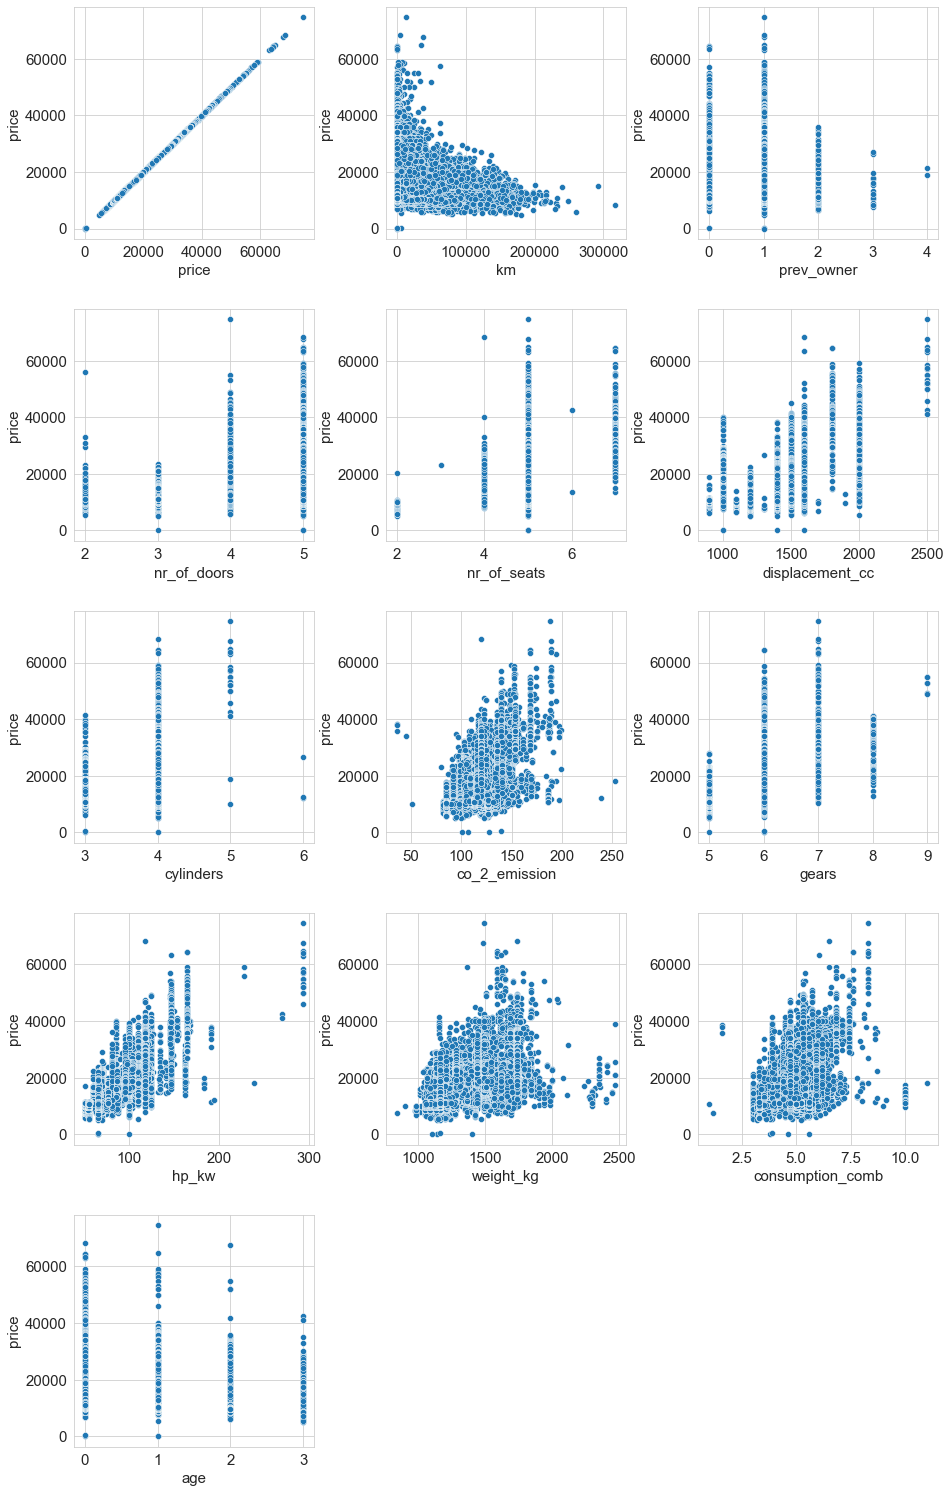

In [997]:
fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.1,
                    wspace=0.3,
                    hspace=0.3)
for i, col in enumerate(df_numeric.columns):
        plt.subplot(5,3,i+1)
        sns.scatterplot(y= "price", x=col, data=df_numeric)

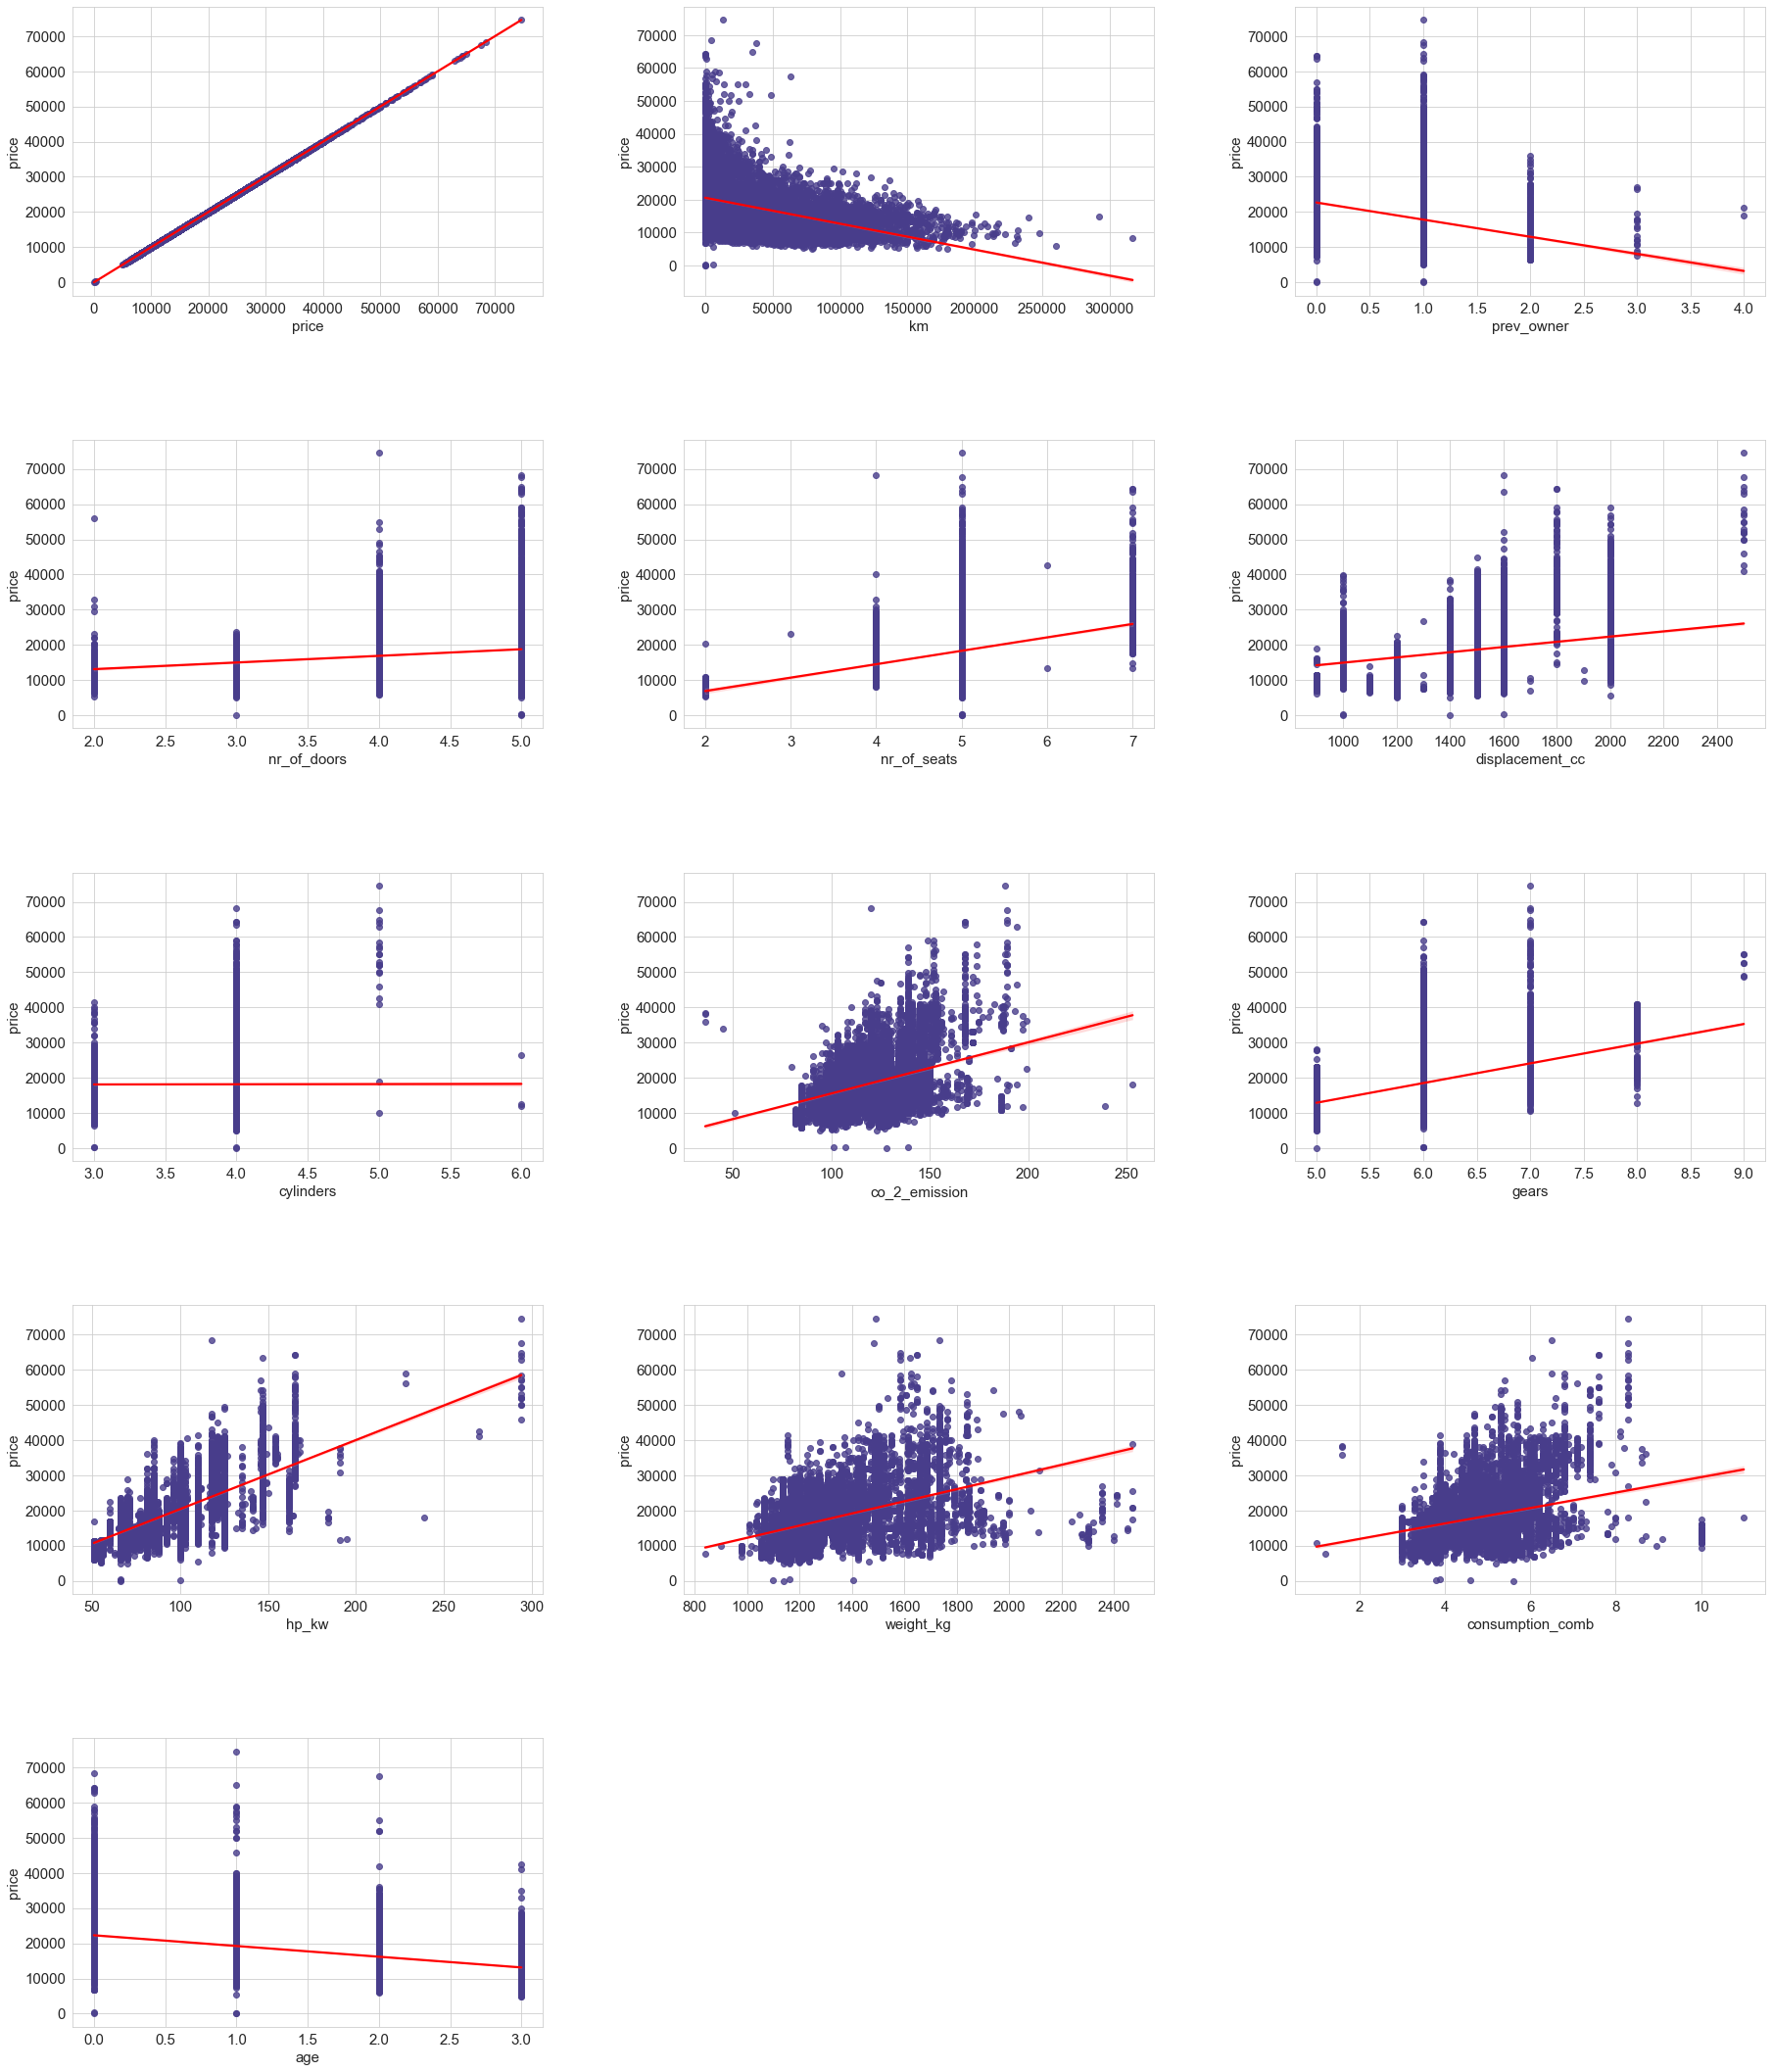

In [998]:
fig = plt.figure(figsize=(30,50))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.3,
                    hspace=0.5)
for i, col in enumerate(df_numeric.columns):
        plt.subplot(15,3,i+1)
        sns.regplot(x=col, y= "price", data=df_numeric, scatter_kws={"color": "darkslateblue"}, line_kws={"color": "red"})

### Correlation between numerical features

In [999]:
df_numeric.corr()

price    km  prev_owner  nr_of_doors  nr_of_seats  \
price              1.00 -0.39       -0.25         0.16         0.24   
km                -0.39  1.00        0.26        -0.00        -0.01   
prev_owner        -0.25  0.26        1.00        -0.13        -0.03   
nr_of_doors        0.16 -0.00       -0.13         1.00         0.10   
nr_of_seats        0.24 -0.01       -0.03         0.10         1.00   
displacement_cc    0.29  0.31        0.09         0.09         0.19   
cylinders          0.00  0.24        0.12         0.04         0.23   
co_2_emission      0.36 -0.24       -0.11        -0.03         0.27   
gears              0.54 -0.03       -0.05         0.11         0.09   
hp_kw              0.70  0.02       -0.07         0.13         0.28   
weight_kg          0.46  0.16        0.01         0.17         0.33   
consumption_comb   0.28 -0.34       -0.13        -0.07         0.21   
age               -0.46  0.76        0.43        -0.08        -0.09   

                  displacement_cc  cylinders  co_2_emission  gears  hp_kw  \
price                        0.29       0.00           0.36   0.54   0.70   
km                           0.31       0.24          -0.24  -0.03   0.02   
prev_owner                   0.09       0.12          -0.11  -0.05  -0.07   
nr_of_doors                  0.09       0.04          -0.03   0.11   0.13   
nr_of_seats                  0.19       0.23           0.27   0.09   0.28   
displacement_cc              1.00       0.72           0.29   0.35   0.61   
cylinders                    0.72       1.00           0.33   0.12   0.32   
co_2_emission                0.29       0.33           1.00   0.11   0.52   
gears                        0.35       0.12           0.11   1.00   0.46   
hp_kw                        0.61       0.32           0.52   0.46   1.00   
weight_kg                    0.56       0.32           0.30   0.33   0.65   
consumption_comb             0.03       0.17           0.87   0.02   0.37   
age                          0.22       0.20          -0.31  -0.06  -0.07   

                  weight_kg  consumption_comb   age  
price                  0.46              0.28 -0.46  
km                     0.16             -0.34  0.76  
prev_owner             0.01             -0.13  0.43  
nr_of_doors            0.17             -0.07 -0.08  
nr_of_seats            0.33              0.21 -0.09  
displacement_cc        0.56              0.03  0.22  
cylinders              0.32              0.17  0.20  
co_2_emission          0.30              0.87 -0.31  
gears                  0.33              0.02 -0.06  
hp_kw                  0.65              0.37 -0.07  
weight_kg              1.00              0.08  0.08  
consumption_comb       0.08              1.00 -0.37  
age                    0.08             -0.37  1.00

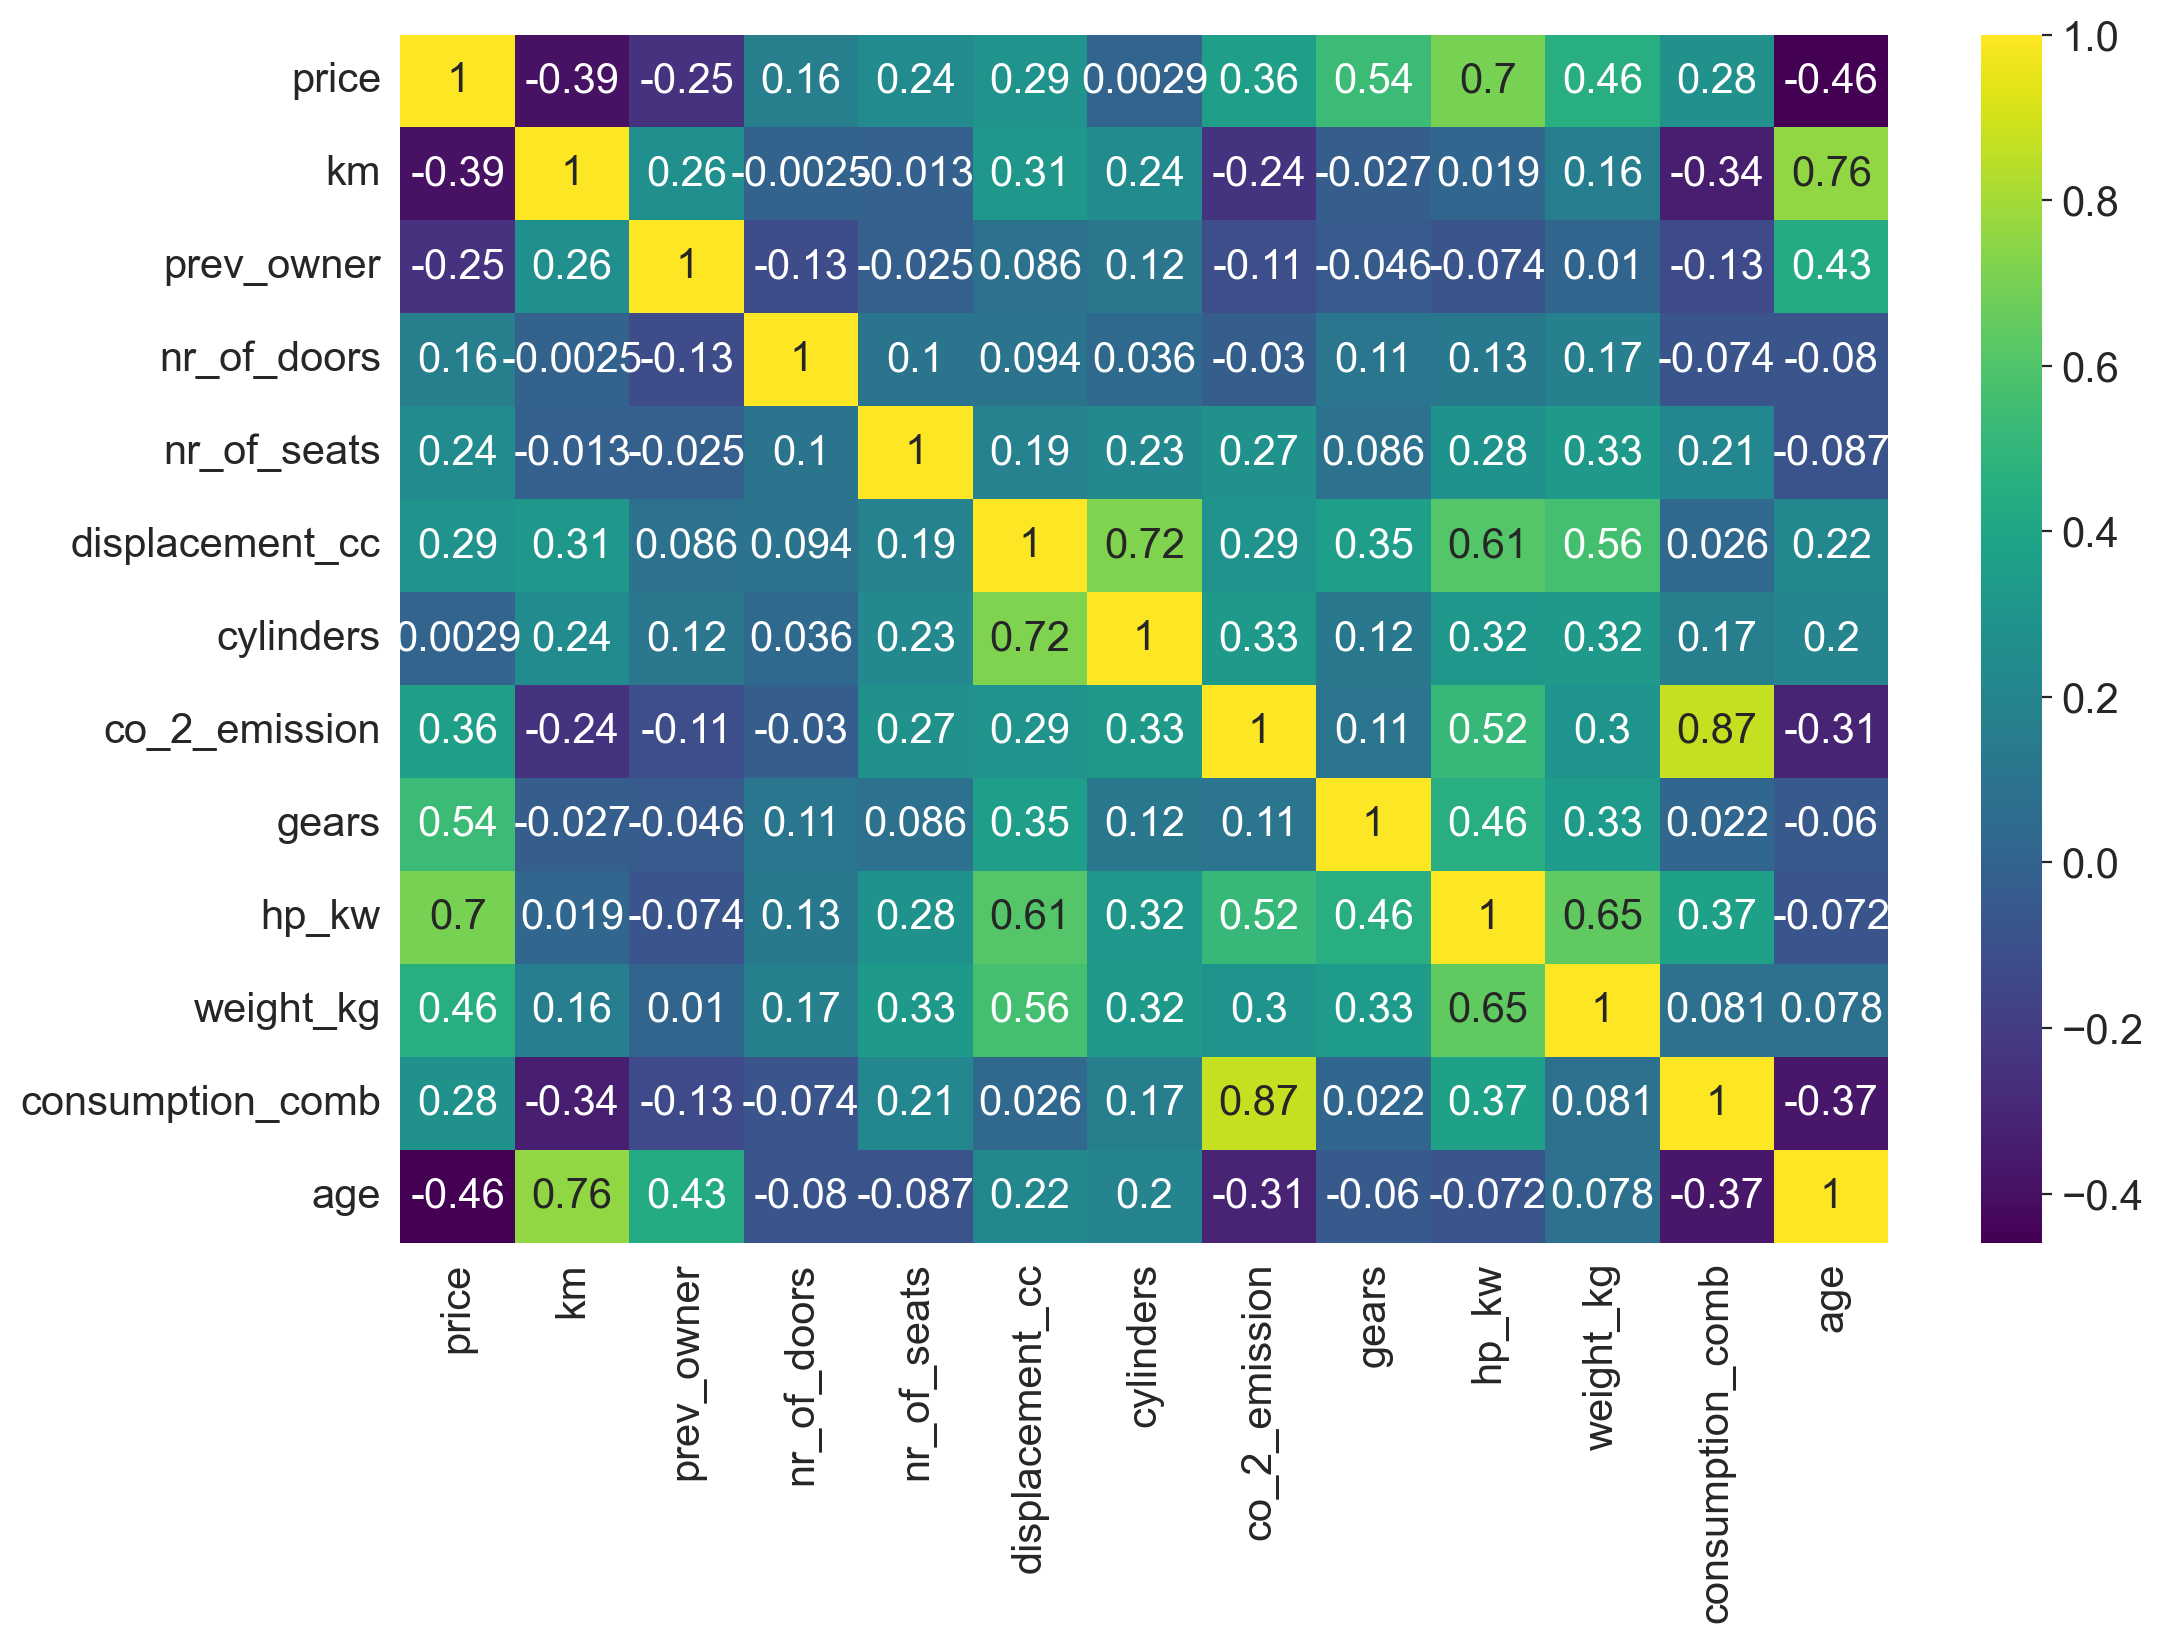

In [1000]:
plt.figure(figsize=(12,8), dpi=200)
sns.heatmap(df_numeric.corr(), cmap="viridis", annot=True);

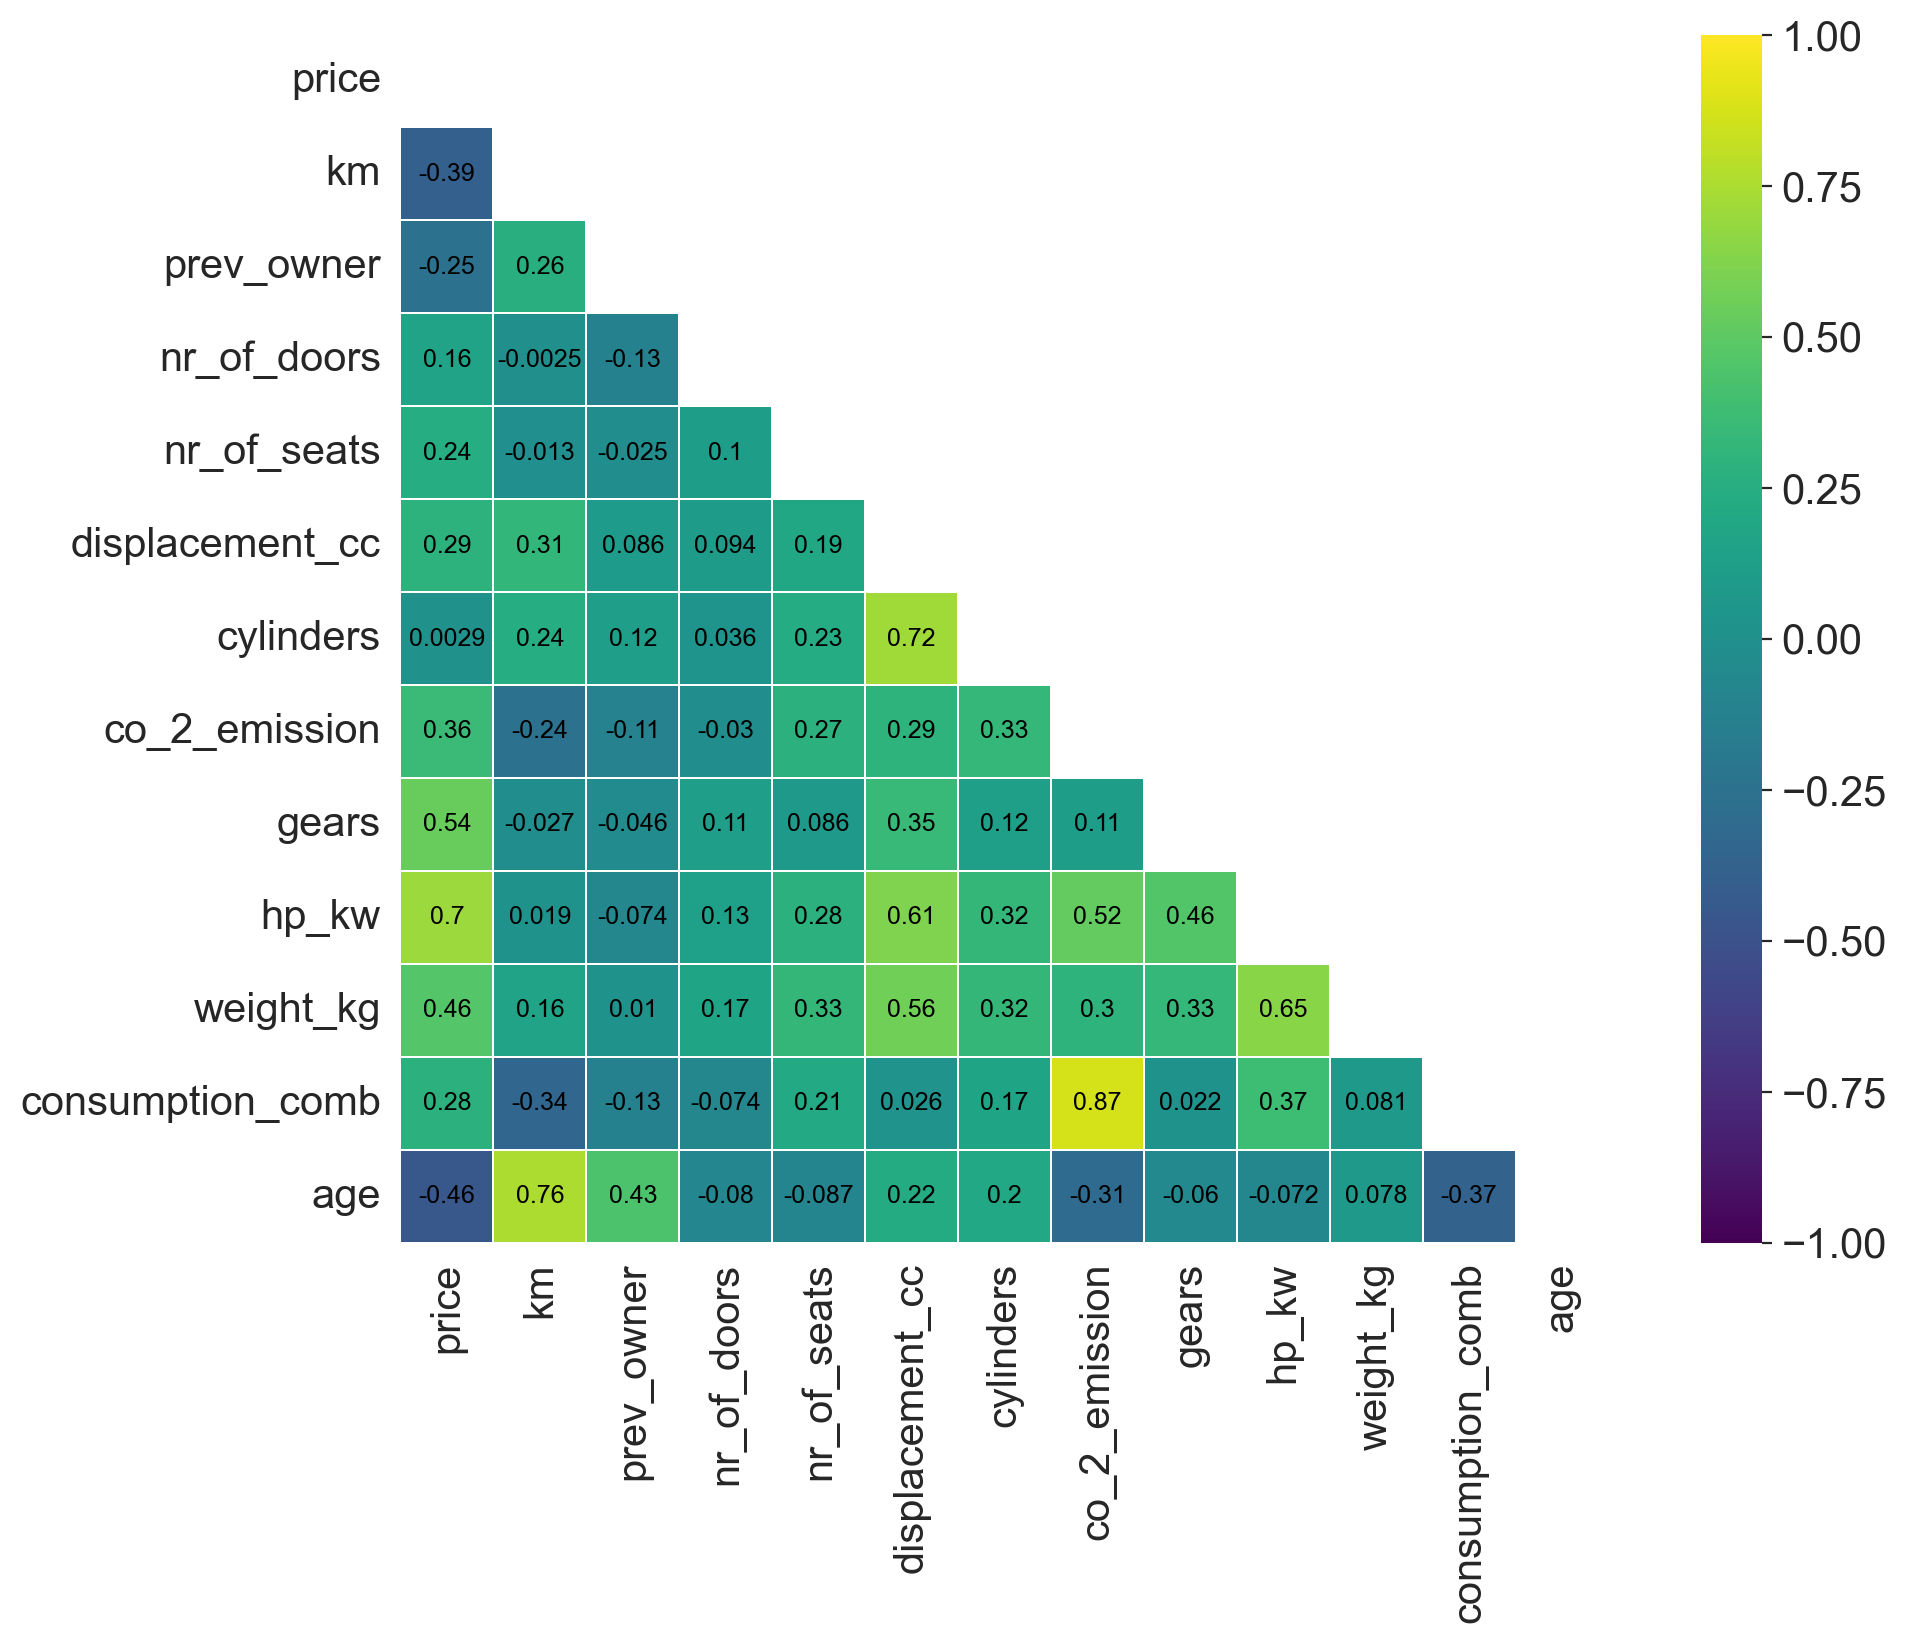

In [1001]:
# Heatmap for all the remaining numerical data including the target 'price'

plt.figure(figsize=(12,8), dpi=200)

# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

# Define correlation matrix 
# (method = pearson: standard correlation coefficient)
corr_matrix = df.corr(method = 'pearson')

# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Choose the color map
cmap = "viridis"

# plot the heatmap
sns.heatmap(corr_matrix,  mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"}, square=True, cmap=cmap, annot=True);

In [1002]:
# we will drop cylinders, nr_of_doors columns, because the correlation<0.25
df.drop(columns = ["cylinders", "nr_of_doors"], inplace = True)

In [1003]:
df.shape

(15042, 26)

## Handling with outliers for categoric columns

In [1004]:
df_categoric= df.select_dtypes(include=["object"])

In [1005]:
df_categoric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15042 entries, 0 to 15041
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   make_model           15042 non-null  object
 1   body_type            15042 non-null  object
 2   type                 15042 non-null  object
 3   body_color           15042 non-null  object
 4   paint_type           15042 non-null  object
 5   gearing_type         15042 non-null  object
 6   drive_chain          15042 non-null  object
 7   fuel                 15042 non-null  object
 8   emission_class       15042 non-null  object
 9   comfort_convenience  15042 non-null  object
 10  entertainment_media  15042 non-null  object
 11  extras               15042 non-null  object
 12  safety_security      15042 non-null  object
 13  upholstery_type      15042 non-null  object
 14  upholstery_color     15042 non-null  object
dtypes: object(15)
memory usage: 1.7+ MB


In [1006]:
df_categoric.nunique()

make_model                9
body_type                 9
type                      5
body_color               14
paint_type                3
gearing_type              3
drive_chain               3
fuel                      4
emission_class            6
comfort_convenience    6198
entertainment_media     346
extras                  659
safety_security        4443
upholstery_type           6
upholstery_color         16
dtype: int64

In [1007]:
# taking columns having less then 17 nunique and appending price column for further analysis

categorical_features = [i for i in df_categoric.columns if df_categoric[i].nunique() < 17]
categorical_features.append("price")
df_categoric = df[categorical_features]
df_categoric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15042 entries, 0 to 15041
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   make_model        15042 non-null  object 
 1   body_type         15042 non-null  object 
 2   type              15042 non-null  object 
 3   body_color        15042 non-null  object 
 4   paint_type        15042 non-null  object 
 5   gearing_type      15042 non-null  object 
 6   drive_chain       15042 non-null  object 
 7   fuel              15042 non-null  object 
 8   emission_class    15042 non-null  object 
 9   upholstery_type   15042 non-null  object 
 10  upholstery_color  15042 non-null  object 
 11  price             15042 non-null  float64
dtypes: float64(1), object(11)
memory usage: 1.4+ MB


### Countplot for categorical columns

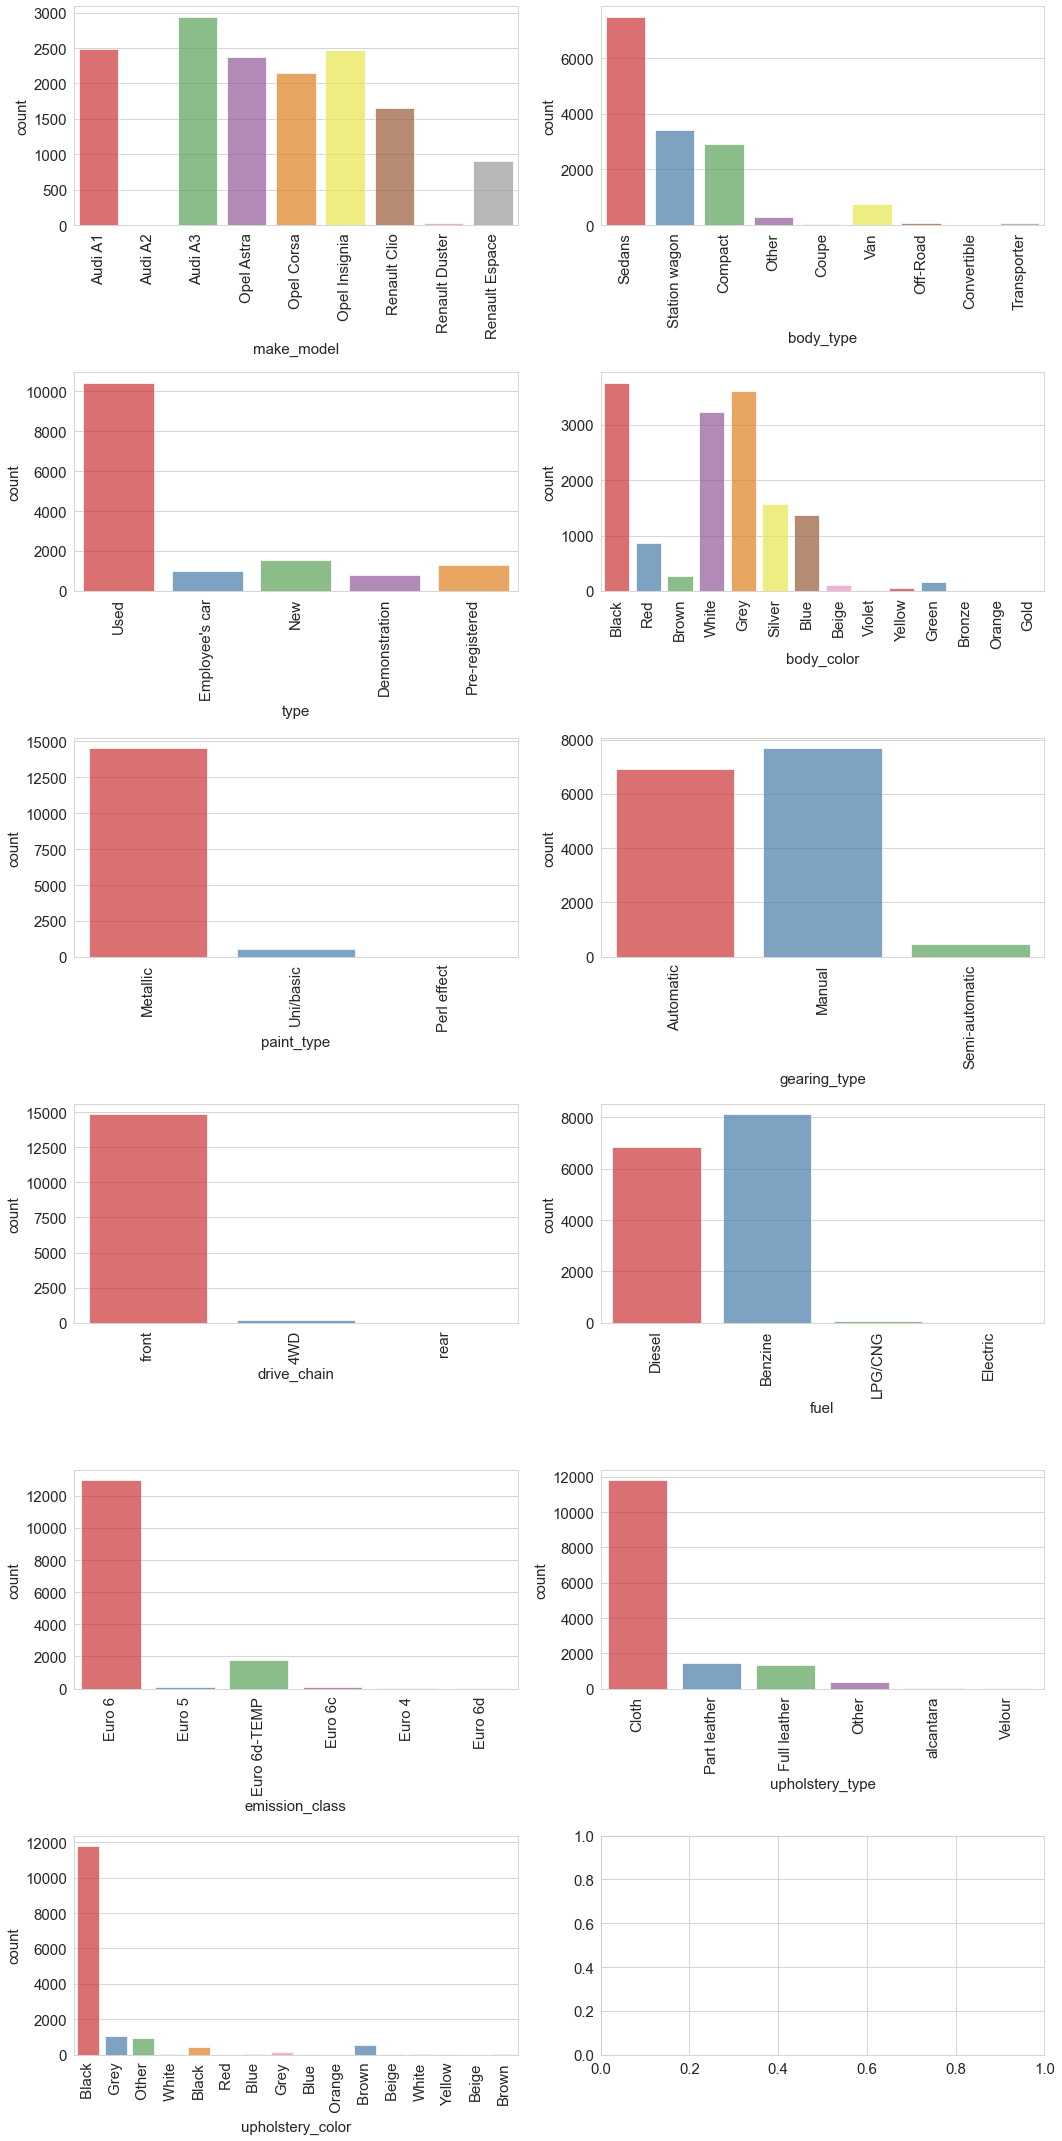

In [1008]:
fig, axes = plt.subplots(round(len(df_categoric.columns) / 2), 2, figsize=(15, 30))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(df_categoric.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(x=df_categoric.columns[i], alpha=0.7, data=df_categoric, ax=ax, palette = "Set1")

fig.tight_layout()

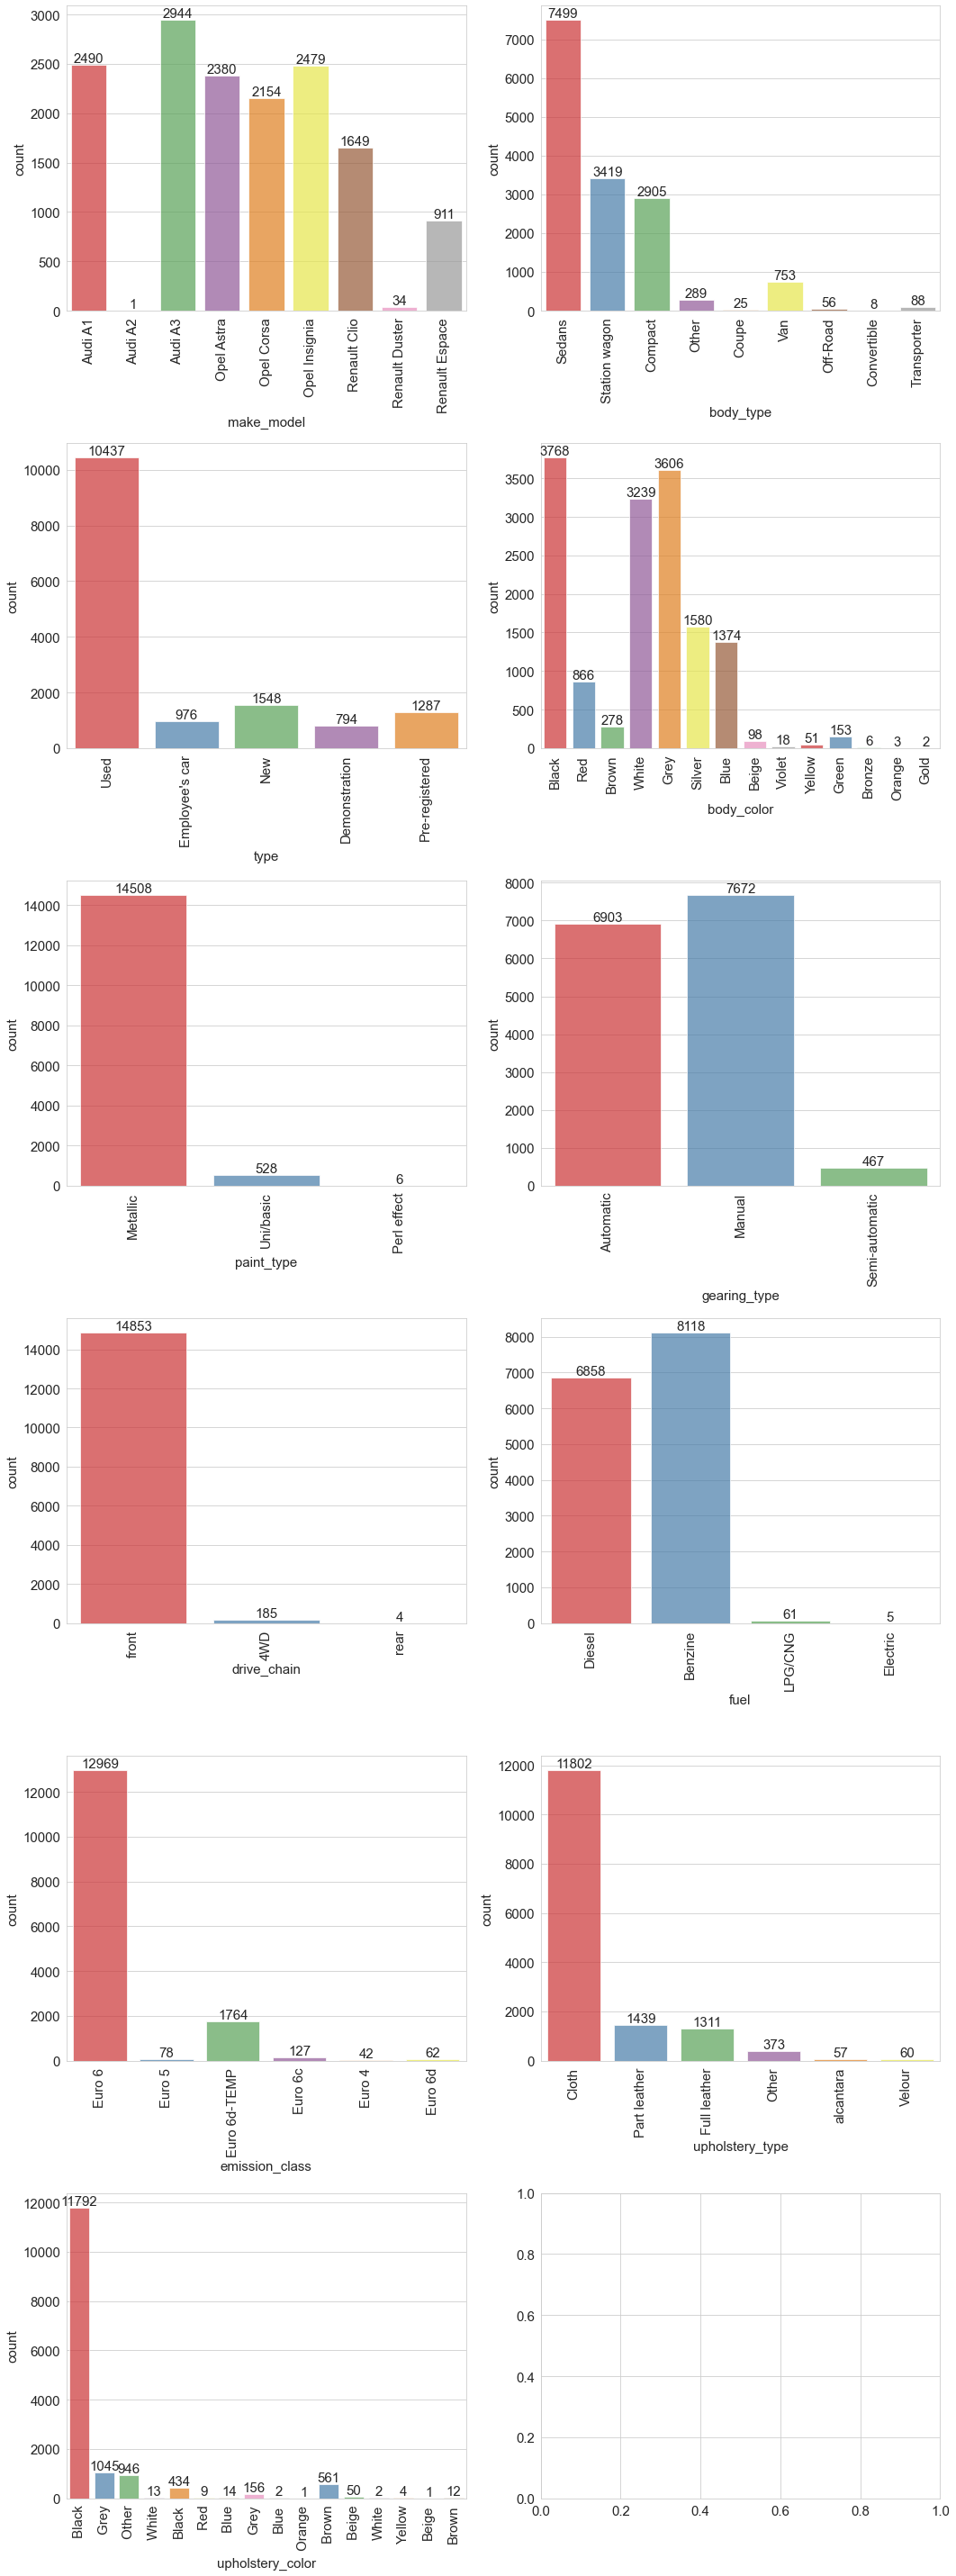

In [1009]:
fig, axes = plt.subplots(round(len(df_categoric.columns) / 2), 2, figsize=(15, 40))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(df_categoric.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        g = sns.countplot(x=df_categoric.columns[i], alpha=0.7, data=df_categoric, ax=ax, palette = "Set1")
        g.bar_label(g.containers[0])
fig.tight_layout()

### Boxplots for categorical columns

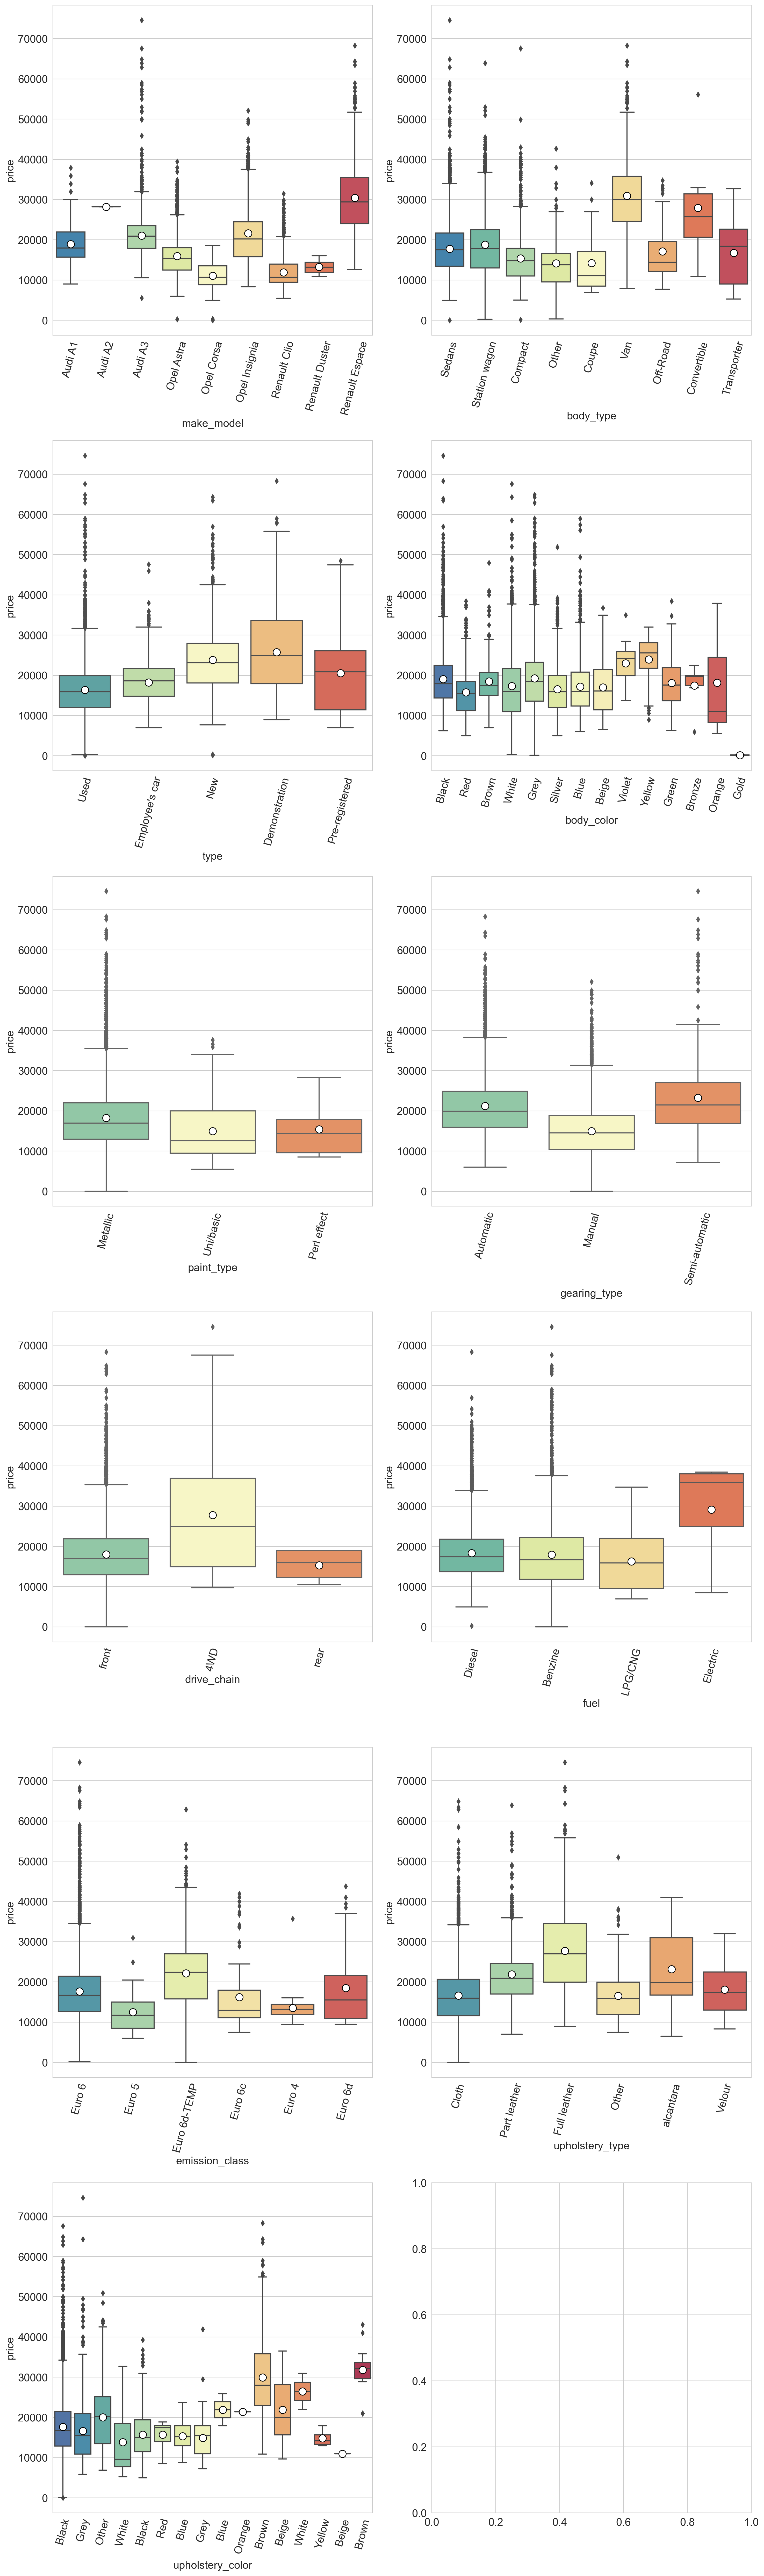

In [1010]:
fig, axes = plt.subplots(
    round(len(df_categoric.columns)/2), 2, figsize=(15, 50), dpi=200)

for i, ax in enumerate(fig.axes):
    # plot the variation of price in each feature
    if i < len(df_categoric.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=75)
        sns.boxplot(x=df_categoric.columns[i], y="price", data=df_categoric, ax=ax, palette="Spectral_r")

fig.tight_layout()

In [1011]:
df['emission_class'].value_counts(dropna=False).sort_index().astype('category').cat.codes

Euro 4          0
Euro 5          2
Euro 6          5
Euro 6c         3
Euro 6d         1
Euro 6d-TEMP    4
dtype: int8

In [1012]:
# because of counts of columns and charts we decided to drop these columns:

cols_to_drop = [ "body_color", "emission_class", "upholstery_color"]

df_categoric.drop(cols_to_drop, axis=1, inplace=True)

In [1013]:
# drop cols_to_drop from df

df.drop(columns=cols_to_drop, axis=1, inplace=True)

In [1014]:
df.shape

(15042, 23)

In [1015]:
df.columns

Index(['make_model', 'body_type', 'price', 'km', 'prev_owner', 'type',
       'paint_type', 'nr_of_seats', 'gearing_type', 'displacement_cc',
       'drive_chain', 'fuel', 'co_2_emission', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'gears', 'hp_kw',
       'upholstery_type', 'weight_kg', 'consumption_comb', 'age'],
      dtype='object')

In [1016]:
iqr_lower_upper("price")

lower limit : -675.0,
upper limit: 35525.0,
number of extreme values : 465


(-675.0, 35525.0)

In [1017]:
df.price.describe()

count   15,042.00
mean    18,113.02
std      7,421.46
min         13.00
25%     12,900.00
50%     16,950.00
75%     21,950.00
max     74,600.00
Name: price, dtype: float64

In [1018]:
df.price.sort_values().head(50)

8166       13.00
8397      120.00
5768      255.00
8398      331.00
8396    4,950.00
8394    4,990.00
8395    5,250.00
8393    5,300.00
13045   5,445.00
8392    5,450.00
8391    5,490.00
8389    5,499.00
3077    5,555.00
8390    5,600.00
13038   5,700.00
13037   5,800.00
13035   5,850.00
13034   5,890.00
8387    5,890.00
13036   5,900.00
13033   5,900.00
13032   5,900.00
13031   5,938.00
8388    5,950.00
8174    5,970.00
8173    5,970.00
8172    5,970.00
8169    5,990.00
13030   6,000.00
13029   6,000.00
5435    6,000.00
8171    6,100.00
13027   6,200.00
13028   6,200.00
8170    6,200.00
8168    6,200.00
8385    6,250.00
13026   6,250.00
8376    6,290.00
13024   6,290.00
8375    6,299.00
8374    6,300.00
8372    6,380.00
8371    6,390.00
13025   6,400.00
8370    6,400.00
8368    6,450.00
8373    6,450.00
8369    6,479.00
8366    6,480.00
Name: price, dtype: float64

In [1019]:
df.price.value_counts().sort_index().head(50)

13.00       1
120.00      1
255.00      1
331.00      1
4,950.00    1
4,990.00    1
5,250.00    1
5,300.00    1
5,445.00    1
5,450.00    1
5,490.00    1
5,499.00    1
5,555.00    1
5,600.00    1
5,700.00    1
5,800.00    1
5,850.00    1
5,890.00    2
5,900.00    3
5,938.00    1
5,950.00    1
5,970.00    3
5,990.00    1
6,000.00    3
6,100.00    1
6,200.00    4
6,250.00    2
6,290.00    2
6,299.00    1
6,300.00    1
6,380.00    1
6,390.00    1
6,400.00    2
6,450.00    2
6,479.00    1
6,480.00    4
6,489.00    1
6,490.00    4
6,499.00    2
6,500.00    6
6,580.00    1
6,590.00    1
6,600.00    2
6,660.00    1
6,690.00    2
6,700.00    1
6,780.00    3
6,790.00    2
6,800.00    1
6,850.00    3
Name: price, dtype: int64

In [1020]:
df[df.price < 4000]

make_model      body_type  price       km  prev_owner  type paint_type  \
5768  Opel Astra  Station wagon 255.00 5,563.00        1.00  Used   Metallic   
8166  Opel Corsa         Sedans  13.00   123.00        1.00  Used   Metallic   
8397  Opel Corsa        Compact 120.00    12.00        0.00   New   Metallic   
8398  Opel Corsa          Other 331.00    10.00        0.00   New   Metallic   

      nr_of_seats gearing_type  displacement_cc drive_chain     fuel  \
5768         5.00       Manual         1,600.00       front   Diesel   
8166         5.00       Manual         1,400.00       front  Benzine   
8397         5.00       Manual         1,000.00       front  Benzine   
8398         5.00       Manual         1,000.00       front  Benzine   

      co_2_emission                                comfort_convenience  \
5768         101.00  Air conditioning,Cruise control,Electrical sid...   
8166         128.00  Air conditioning,Cruise control,Electrical sid...   
8397         107.00  Air conditioning,Automatic climate control,Cru...   
8398         139.00  Air conditioning,Armrest,Automatic climate con...   

                                    entertainment_media  \
5768  Bluetooth,Hands-free equipment,On-board comput...   
8166  Bluetooth,CD player,Hands-free equipment,MP3,O...   
8397              Digital radio,On-board computer,Radio   
8398       Hands-free equipment,On-board computer,Radio   

                             extras  \
5768                      Roof rack   
8166                   Alloy wheels   
8397  Alloy wheels,Sport suspension   
8398     Alloy wheels,Sport package   

                                        safety_security  gears  hp_kw  \
5768  ABS,Central door lock with remote control,Dayt...   6.00 100.00   
8166  ABS,Adaptive headlights,Central door lock with...   5.00  66.00   
8397  Central door lock,Daytime running lights,Drive...   6.00  66.00   
8398  ABS,Central door lock,Driver-side airbag,Elect...   6.00  66.00   

     upholstery_type  weight_kg  consumption_comb  age  
5768           Cloth   1,403.00              3.80 1.00  
8166           Cloth   1,141.00              5.60 1.00  
8397           Cloth   1,099.00              4.60 0.00  
8398           Cloth   1,163.00              3.90 0.00

In [1021]:
# drop outliers in price
df.drop(index=df[df.price < 4000].index, inplace=True)

In [1022]:
df.shape

(15038, 23)

In [1023]:
df_categoric=df.select_dtypes(include="O")
df_categoric.shape

(15038, 12)

In [1024]:
### price outlier ları düşüldükten sonra categorical feature'lar için boxplot
df_categoric=df.select_dtypes(include="O")
categorical_features = [i for i in df_categoric.columns if df_categoric[i].nunique() < 15]
categorical_features.append("price")
df_categoric = df[categorical_features]
df_categoric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15038 entries, 0 to 15041
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make_model       15038 non-null  object 
 1   body_type        15038 non-null  object 
 2   type             15038 non-null  object 
 3   paint_type       15038 non-null  object 
 4   gearing_type     15038 non-null  object 
 5   drive_chain      15038 non-null  object 
 6   fuel             15038 non-null  object 
 7   upholstery_type  15038 non-null  object 
 8   price            15038 non-null  float64
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


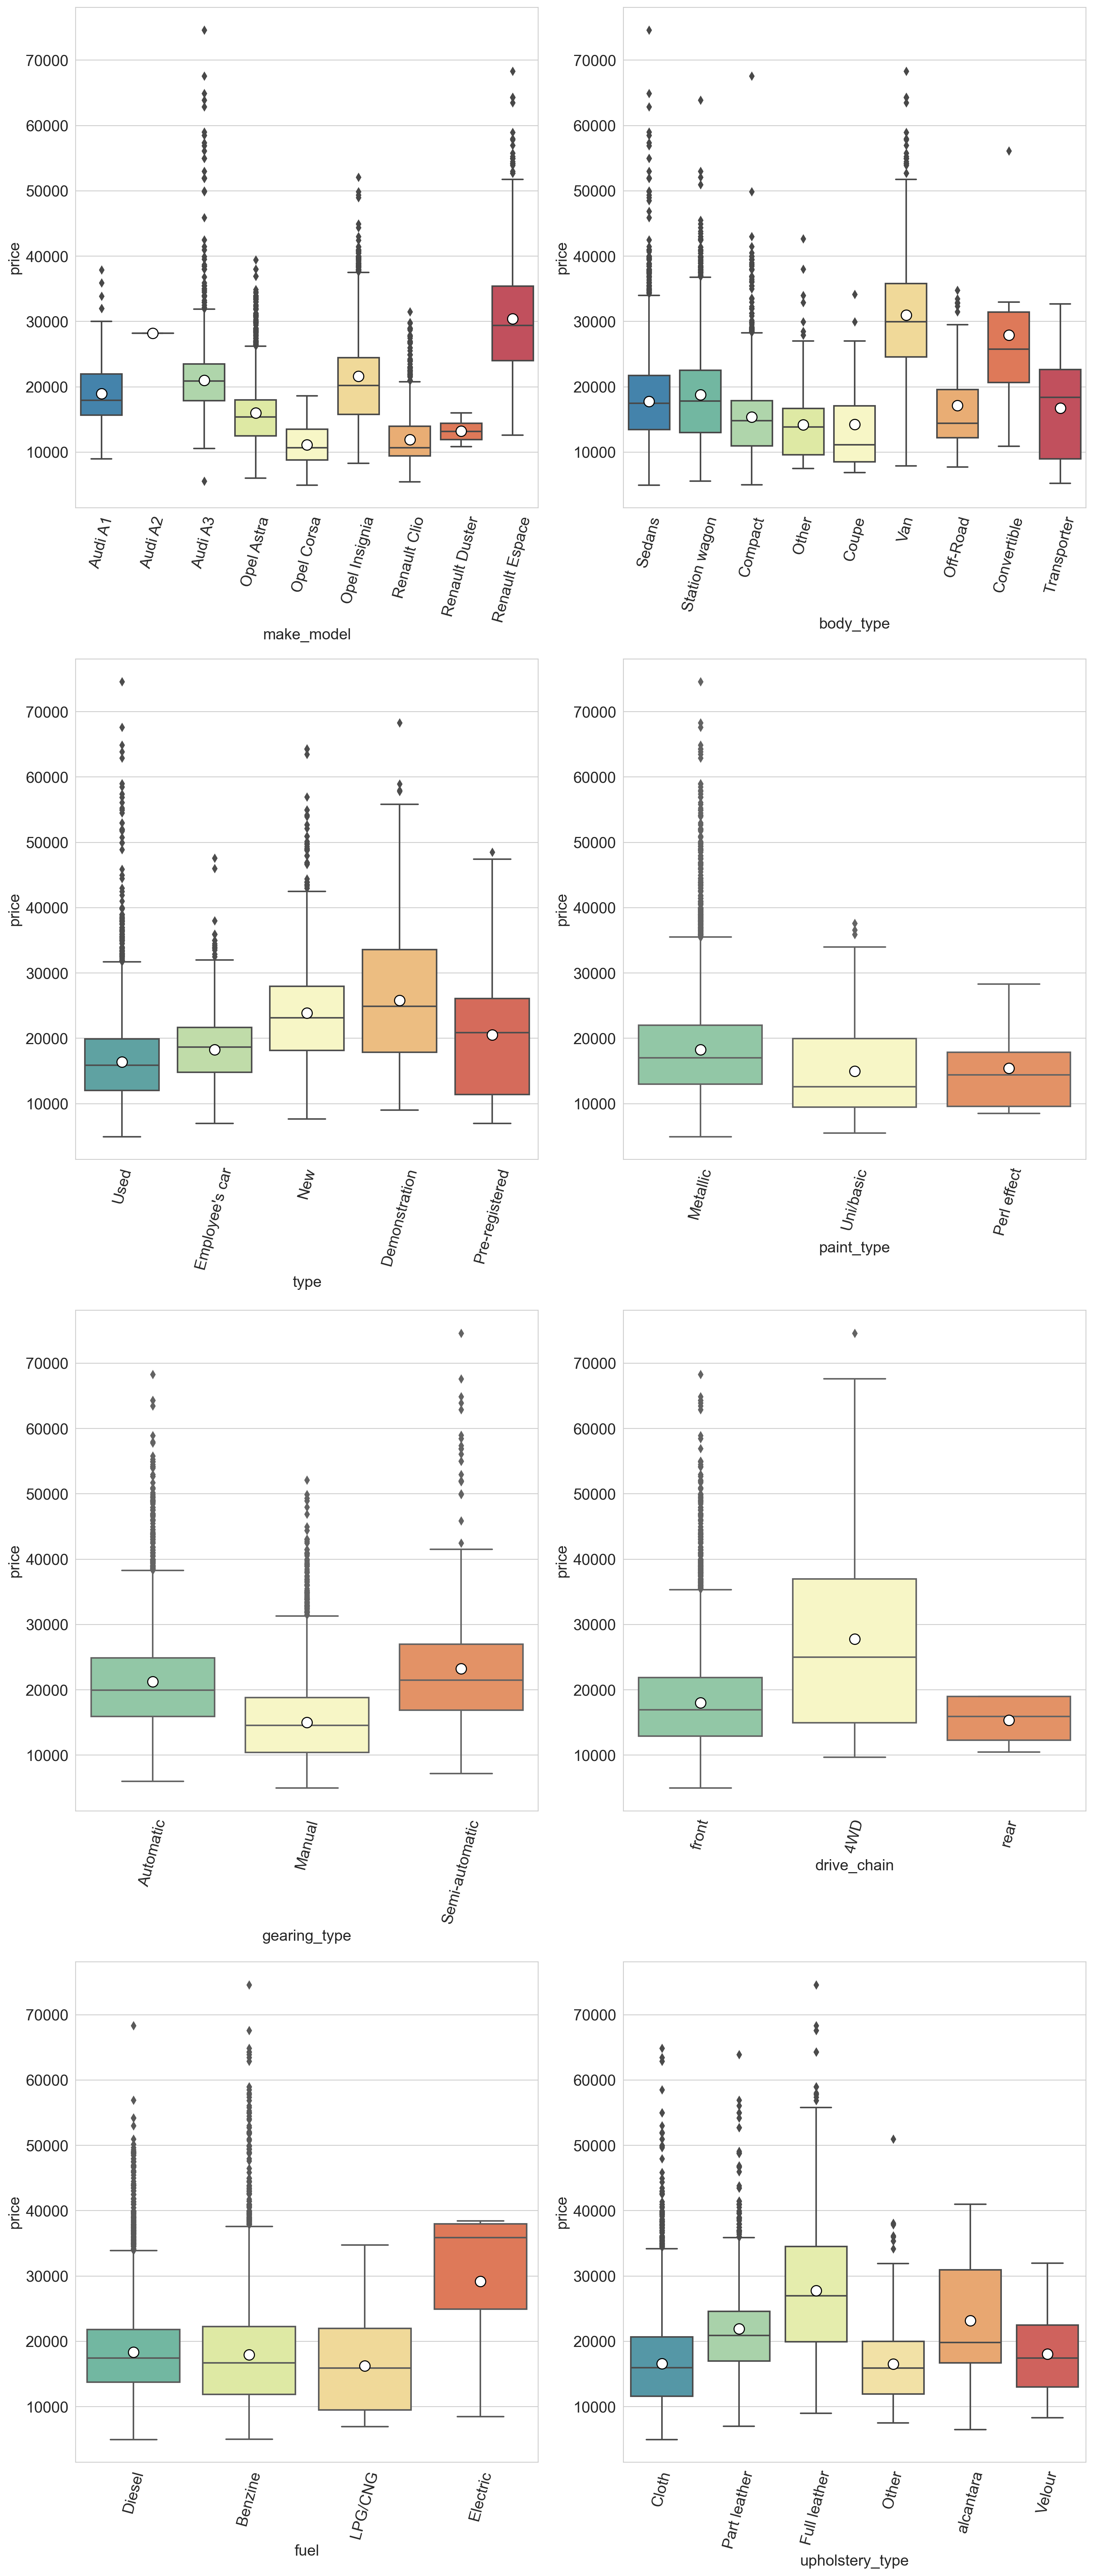

In [1025]:
fig, axes = plt.subplots(
    round(len(df_categoric.columns)/2), 2, figsize=(15, 35), dpi=200)

for i, ax in enumerate(fig.axes):
    # plot the variation of price in each feature
    if i < len(df_categoric.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=75)
        sns.boxplot(x=df_categoric.columns[i], y="price", data=df_categoric, ax=ax, palette="Spectral_r")

fig.tight_layout()

In [1026]:
df.columns

Index(['make_model', 'body_type', 'price', 'km', 'prev_owner', 'type',
       'paint_type', 'nr_of_seats', 'gearing_type', 'displacement_cc',
       'drive_chain', 'fuel', 'co_2_emission', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'gears', 'hp_kw',
       'upholstery_type', 'weight_kg', 'consumption_comb', 'age'],
      dtype='object')

In [1027]:
df.shape

(15038, 23)

# Final Step (Checking final situation of data via graphs)

## Scatter plot for final df numerical features

In [1028]:
df_numeric= df.select_dtypes(exclude=["object"])

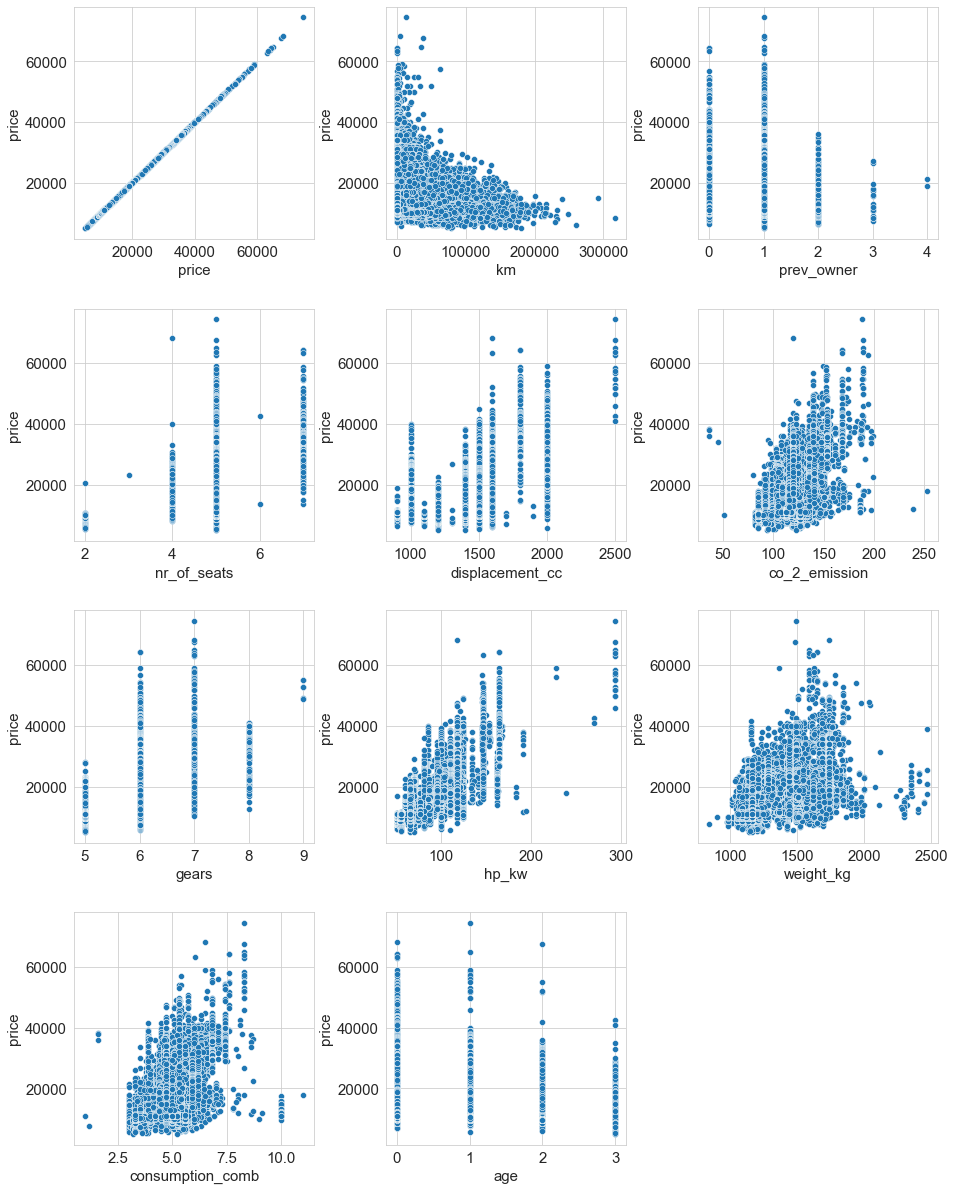

In [1029]:
fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.1,
                    wspace=0.3,
                    hspace=0.3)
for i, col in enumerate(df_numeric.columns):
        plt.subplot(5,3,i+1)
        sns.scatterplot(y= "price", x=col, data=df_numeric)

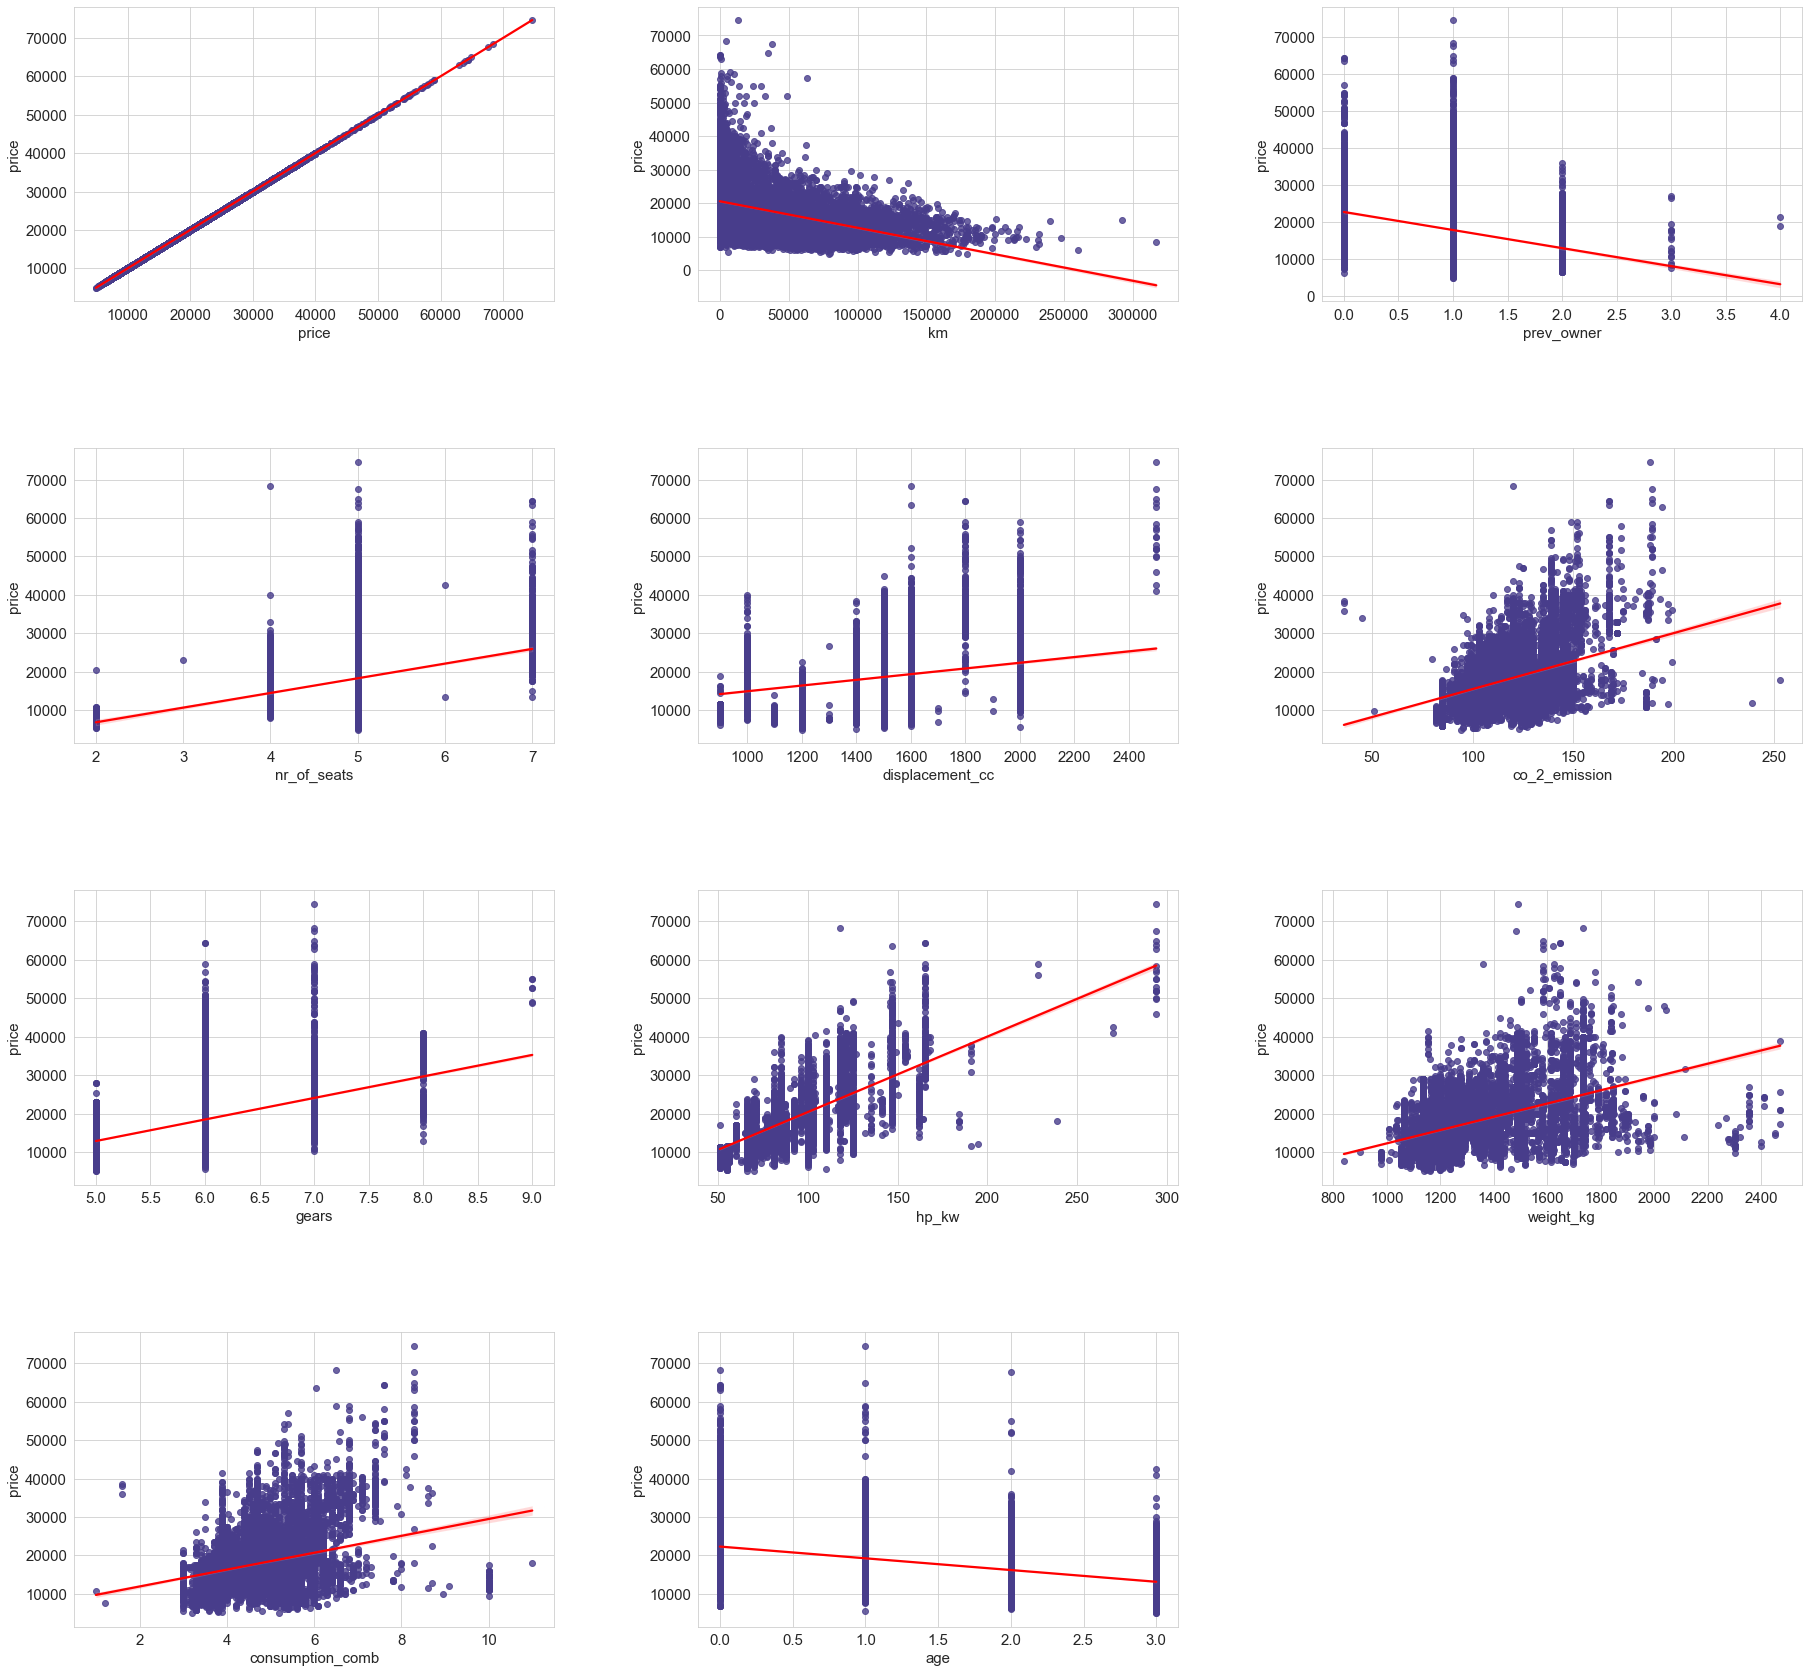

In [1030]:
fig = plt.figure(figsize=(30,50))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.3,
                    hspace=0.5)
for i, col in enumerate(df_numeric.columns):
        plt.subplot(15,3,i+1)
        sns.regplot(x=col, y= "price", data=df_numeric, scatter_kws={"color": "darkslateblue"}, line_kws={"color": "red"})

## Boxplots for final df categorical features

In [1031]:
df_categoric=df.select_dtypes(include="O")
categorical_features = [i for i in df_categoric.columns if df_categoric[i].nunique() < 15]
categorical_features.append("price")
df_categoric = df[categorical_features]
df_categoric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15038 entries, 0 to 15041
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make_model       15038 non-null  object 
 1   body_type        15038 non-null  object 
 2   type             15038 non-null  object 
 3   paint_type       15038 non-null  object 
 4   gearing_type     15038 non-null  object 
 5   drive_chain      15038 non-null  object 
 6   fuel             15038 non-null  object 
 7   upholstery_type  15038 non-null  object 
 8   price            15038 non-null  float64
dtypes: float64(1), object(8)
memory usage: 1.7+ MB


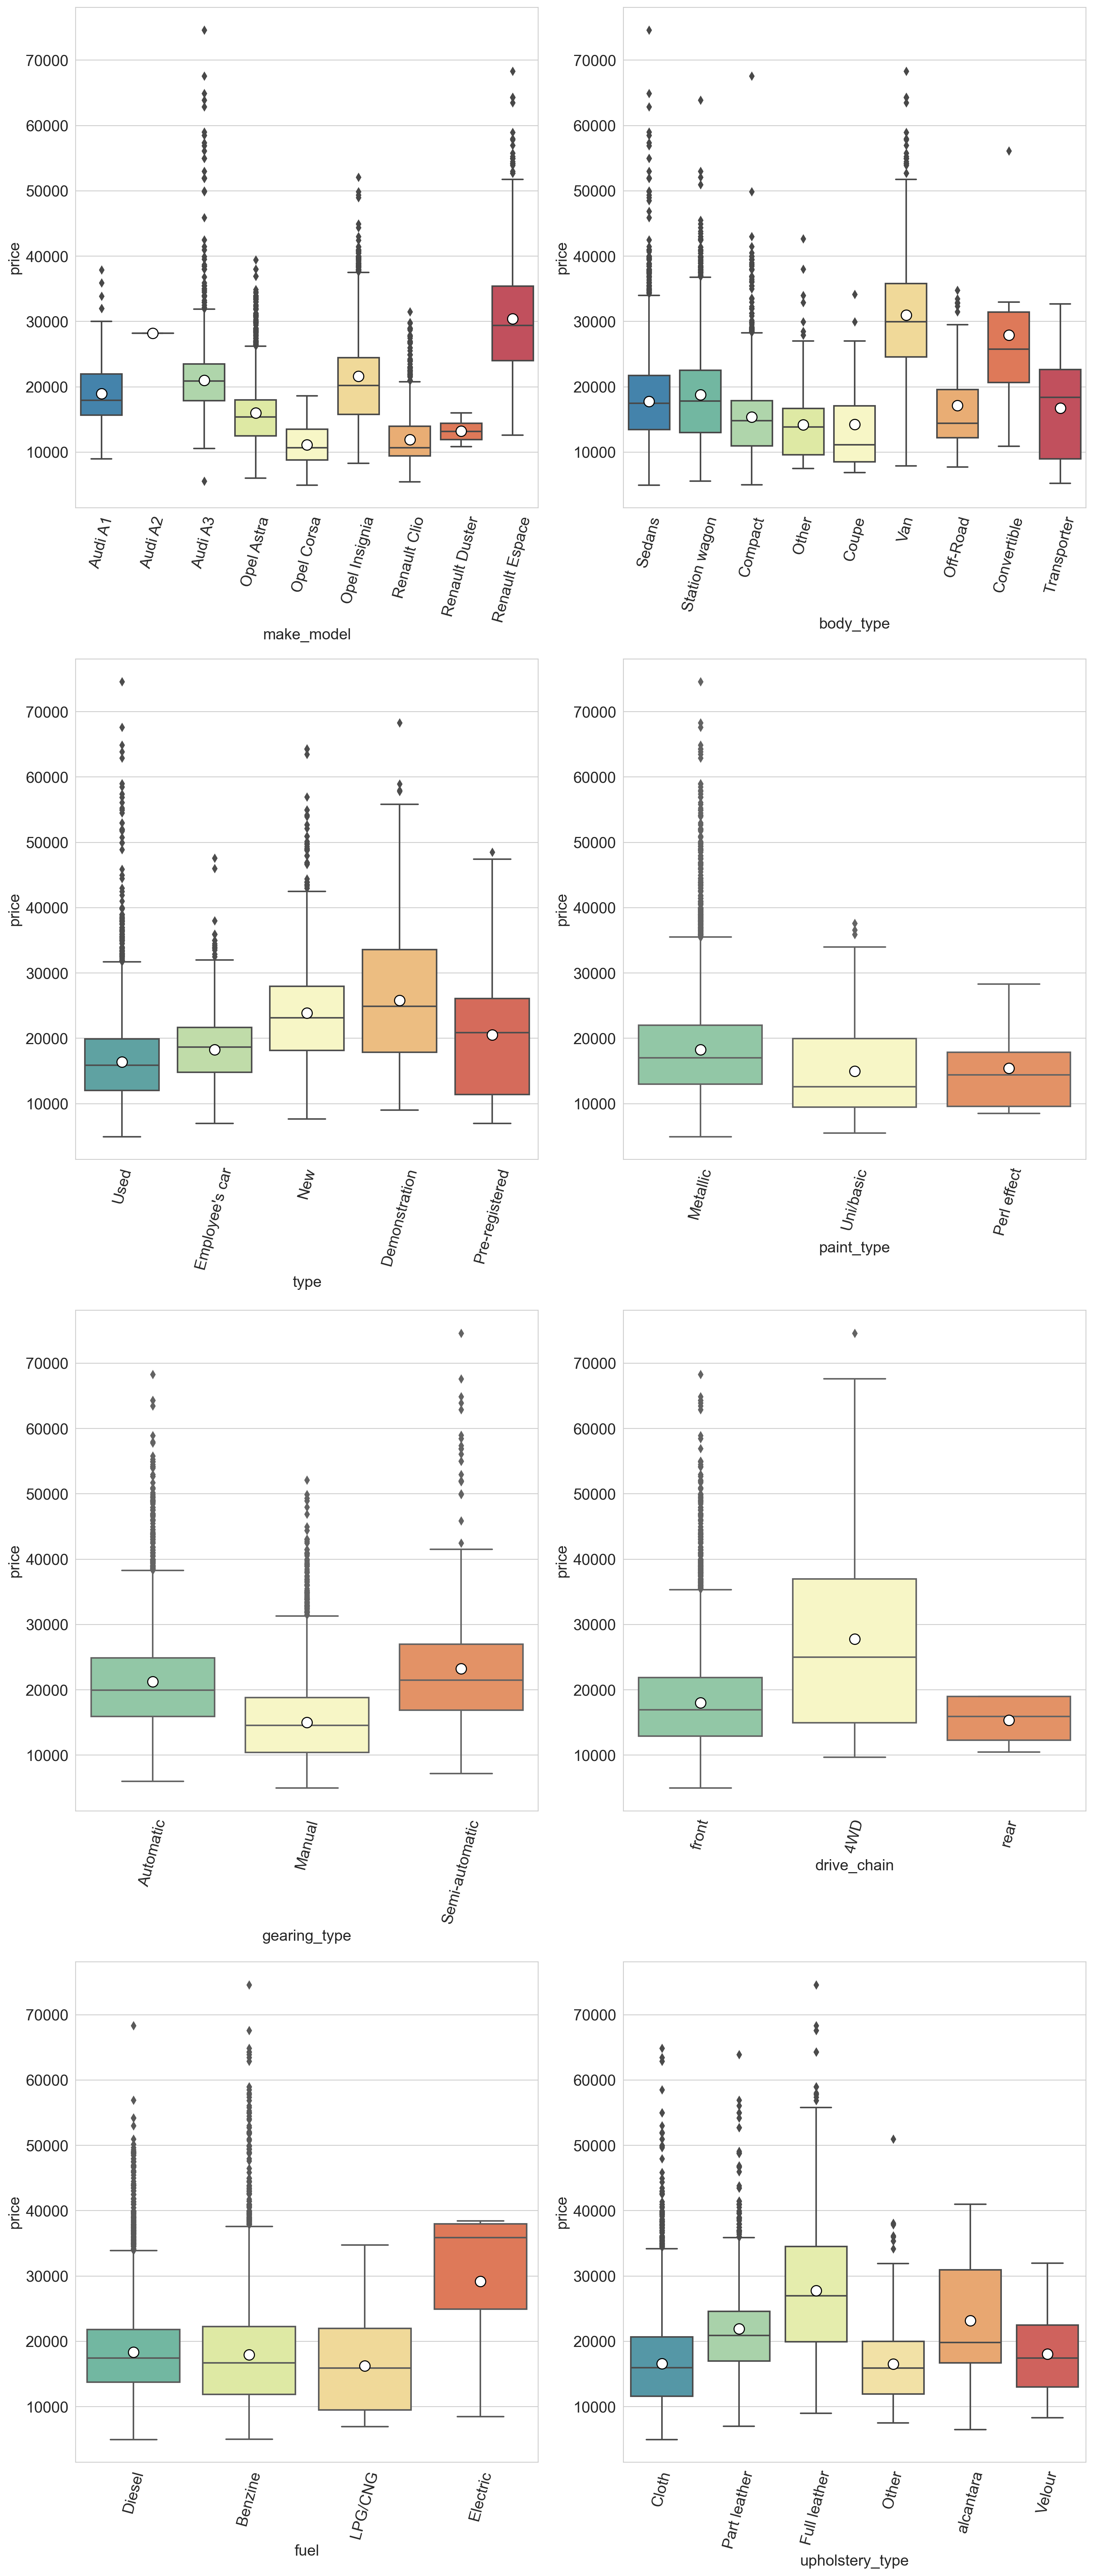

In [1032]:
fig, axes = plt.subplots(
    round(len(df_categoric.columns)/2), 2, figsize=(15, 35), dpi=200)

for i, ax in enumerate(fig.axes):
    # plot the variation of price in each feature
    if i < len(df_categoric.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=75)
        sns.boxplot(x=df_categoric.columns[i], y="price", data=df_categoric, ax=ax, palette="Spectral_r")

fig.tight_layout()

## Export dataframe to csv file (without dummy)

In [1033]:
df.to_csv("final_scout_not_dummy.csv", index=False)

# Dummy Operation

In [1034]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15038 entries, 0 to 15041
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15038 non-null  object 
 1   body_type            15038 non-null  object 
 2   price                15038 non-null  float64
 3   km                   15038 non-null  float64
 4   prev_owner           15038 non-null  float64
 5   type                 15038 non-null  object 
 6   paint_type           15038 non-null  object 
 7   nr_of_seats          15038 non-null  float64
 8   gearing_type         15038 non-null  object 
 9   displacement_cc      15038 non-null  float64
 10  drive_chain          15038 non-null  object 
 11  fuel                 15038 non-null  object 
 12  co_2_emission        15038 non-null  float64
 13  comfort_convenience  15038 non-null  object 
 14  entertainment_media  15038 non-null  object 
 15  extras               15038 non-null 

In [1035]:
df_categoric=df.select_dtypes(include="O")
categorical_features = [i for i in df_categoric.columns if df_categoric[i].nunique() < 15]
df_categoric = df[categorical_features]
df_categoric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15038 entries, 0 to 15041
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   make_model       15038 non-null  object
 1   body_type        15038 non-null  object
 2   type             15038 non-null  object
 3   paint_type       15038 non-null  object
 4   gearing_type     15038 non-null  object
 5   drive_chain      15038 non-null  object
 6   fuel             15038 non-null  object
 7   upholstery_type  15038 non-null  object
dtypes: object(8)
memory usage: 1.5+ MB


In [1036]:
df_dummied = pd.get_dummies(columns=list(df_categoric.columns), data=df, drop_first = True)

In [1037]:
df_dummied.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15038 entries, 0 to 15041
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         15038 non-null  float64
 1   km                            15038 non-null  float64
 2   prev_owner                    15038 non-null  float64
 3   nr_of_seats                   15038 non-null  float64
 4   displacement_cc               15038 non-null  float64
 5   co_2_emission                 15038 non-null  float64
 6   comfort_convenience           15038 non-null  object 
 7   entertainment_media           15038 non-null  object 
 8   extras                        15038 non-null  object 
 9   safety_security               15038 non-null  object 
 10  gears                         15038 non-null  float64
 11  hp_kw                         15038 non-null  float64
 12  weight_kg                     15038 non-null  float64
 13  c

In [1038]:
df_dummied = df_dummied.join(df_dummied['comfort_convenience'].str.get_dummies(sep=',').add_prefix('CC_'))
df_dummied = df_dummied.join(df_dummied['entertainment_media'].str.get_dummies(sep=',').add_prefix('EM_'))
df_dummied = df_dummied.join(df_dummied['extras'].str.get_dummies(sep=',').add_prefix('E_'))
df_dummied = df_dummied.join(df_dummied['safety_security'].str.get_dummies(sep=',').add_prefix('SS_'))

In [1039]:
df_dummied.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15038 entries, 0 to 15041
Columns: 143 entries, price to SS_Xenon headlights
dtypes: float64(11), int64(94), object(4), uint8(34)
memory usage: 13.6+ MB


In [1040]:
df_dummied.drop(columns=["price", "comfort_convenience", "entertainment_media", "extras", "safety_security"], inplace=True)

In [1041]:
df_dummied

km  prev_owner  nr_of_seats  displacement_cc  co_2_emission  \
0     56,013.00        2.00         5.00         1,400.00          99.00   
1     80,000.00        1.00         4.00         1,800.00         129.00   
2     83,450.00        1.00         4.00         1,600.00          99.00   
3     73,000.00        1.00         4.00         1,400.00          99.00   
4     16,200.00        1.00         5.00         1,400.00         109.00   
...         ...         ...          ...              ...            ...   
15037     10.00        0.00         5.00         2,000.00         139.00   
15038  9,900.00        1.00         5.00         1,800.00         168.00   
15039     15.00        1.00         7.00         2,000.00         139.00   
15040     10.00        1.00         7.00         2,000.00         139.00   
15041  2,900.00        1.00         5.00         1,800.00         153.00   

       gears  hp_kw  weight_kg  consumption_comb  age  make_model_Audi A2  \
0       7.00  66.00   1,220.00              3.80 3.00                   0   
1       7.00 141.00   1,255.00              5.60 2.00                   0   
2       7.00  85.00   1,135.00              3.80 3.00                   0   
3       6.00  66.00   1,195.00              3.80 3.00                   0   
4       7.00  66.00   1,135.00              4.10 3.00                   0   
...      ...    ...        ...               ...  ...                 ...   
15037   6.00 147.00   1,758.00              5.30 0.00                   0   
15038   7.00 165.00   1,708.00              7.40 0.00                   0   
15039   6.00 146.00   1,734.00              5.30 0.00                   0   
15040   6.00 147.00   1,758.00              5.30 0.00                   0   
15041   6.00 165.00   1,685.00              6.80 0.00                   0   

       make_model_Audi A3  make_model_Opel Astra  make_model_Opel Corsa  \
0                       0                      0                      0   
1                       0                      0                      0   
2                       0                      0                      0   
3                       0                      0                      0   
4                       0                      0                      0   
...                   ...                    ...                    ...   
15037                   0                      0                      0   
15038                   0                      0                      0   
15039                   0                      0                      0   
15040                   0                      0                      0   
15041                   0                      0                      0   

       make_model_Opel Insignia  make_model_Renault Clio  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   
...                         ...                      ...   
15037                         0                        0   
15038                         0                        0   
15039                         0                        0   
15040                         0                        0   
15041                         0                        0   

       make_model_Renault Duster  make_model_Renault Espace  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   
...                          ...                        ...   
15037                          0                          1   
15038                          0                 

## Export dataframe to csv file (dummy)

In [1042]:
df_dummied.to_csv("final_scout_dummy.csv", index=False)

In [1043]:
pd.read_csv("final_scout_dummy.csv")

km  prev_owner  nr_of_seats  displacement_cc  co_2_emission  \
0     56,013.00        2.00         5.00         1,400.00          99.00   
1     80,000.00        1.00         4.00         1,800.00         129.00   
2     83,450.00        1.00         4.00         1,600.00          99.00   
3     73,000.00        1.00         4.00         1,400.00          99.00   
4     16,200.00        1.00         5.00         1,400.00         109.00   
...         ...         ...          ...              ...            ...   
15033     10.00        0.00         5.00         2,000.00         139.00   
15034  9,900.00        1.00         5.00         1,800.00         168.00   
15035     15.00        1.00         7.00         2,000.00         139.00   
15036     10.00        1.00         7.00         2,000.00         139.00   
15037  2,900.00        1.00         5.00         1,800.00         153.00   

       gears  hp_kw  weight_kg  consumption_comb  age  make_model_Audi A2  \
0       7.00  66.00   1,220.00              3.80 3.00                   0   
1       7.00 141.00   1,255.00              5.60 2.00                   0   
2       7.00  85.00   1,135.00              3.80 3.00                   0   
3       6.00  66.00   1,195.00              3.80 3.00                   0   
4       7.00  66.00   1,135.00              4.10 3.00                   0   
...      ...    ...        ...               ...  ...                 ...   
15033   6.00 147.00   1,758.00              5.30 0.00                   0   
15034   7.00 165.00   1,708.00              7.40 0.00                   0   
15035   6.00 146.00   1,734.00              5.30 0.00                   0   
15036   6.00 147.00   1,758.00              5.30 0.00                   0   
15037   6.00 165.00   1,685.00              6.80 0.00                   0   

       make_model_Audi A3  make_model_Opel Astra  make_model_Opel Corsa  \
0                       0                      0                      0   
1                       0                      0                      0   
2                       0                      0                      0   
3                       0                      0                      0   
4                       0                      0                      0   
...                   ...                    ...                    ...   
15033                   0                      0                      0   
15034                   0                      0                      0   
15035                   0                      0                      0   
15036                   0                      0                      0   
15037                   0                      0                      0   

       make_model_Opel Insignia  make_model_Renault Clio  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   
...                         ...                      ...   
15033                         0                        0   
15034                         0                        0   
15035                         0                        0   
15036                         0                        0   
15037                         0                        0   

       make_model_Renault Duster  make_model_Renault Espace  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   
...                          ...                        ...   
15033                          0                          1   
15034                          0                 